**Description:** We want to use different ML (supervised and unsupervised) approaches to predict churns of subscriptions of the german newspaper “Die Zeit”. Supervised ML methods can be used to predict (classification methods) subscription churns based on the given dataset. Since a large number of features exists, feature selection as part of an extensive EDA is essential. Unsupervised ML methods could be used first to do clustering on the dataset to identify if there are certain “groups of subscribers”, who share certain features. This clustering could be used to investigate subscriber group specific churn mitigation methods (not only writing emails, as given in the dataset description).

**Project Name:** Churn Prediction - Die Zeit

**Team:** Carlotta Ulm, Silas Mederer, Jonas Bechthold

**Date:** 2020-10-26 to 2020-11-27

# Setting up environment and imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math
import itertools
from time import time

# own modules
import eda_methods as eda

# visualization
import seaborn as sns
sns.set(style="white")  
#sns.set_theme()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

# pandas profiling
from pandas_profiling import ProfileReport

# warnings handler
import warnings
warnings.filterwarnings("ignore")

random_state = 100           # Ensures modeling results can be replicated
np.random.seed(42)

# Display Options for pandas
pd.set_option('display.max_columns', None) # Sets maximum columns displayed in tables
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Variables for plot sizes
matplotlib.rc('font', size=20)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=18)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=20)

####################################################
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#geodaten
import geopandas as gpd

# Business Understanding 

Please check the [wiki page: Business understanding (publishing and news)](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/wiki/Business-understanding-(publishing-and-news)).

## Dataset Description

Let's get an idea about the columns and find out what they mean.

In [2]:
# new dataframe 2
df = pd.read_csv('data/f_chtr_churn_traintable_nf_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209043 entries, 0 to 209042
Columns: 171 entries, Unnamed: 0 to date_x
dtypes: float64(32), int64(121), object(18)
memory usage: 272.7+ MB


In [3]:
#df.head()

In [4]:
#df.tail(1)

In [5]:
df.drop(["Unnamed: 0","auftrag_new_id"], axis=1, inplace=True)

In [6]:
eda.describe_plus(df).round(2)

count   mean     std  min    25%  \
lesedauer                              209043.0  32.05  21.56   0.0  14.00   
rechnungsmonat                         209043.0  0.10   0.30    0.0  0.00    
studentenabo                           209043.0  0.11   0.31    0.0  0.00    
metropole                              209043.0  0.29   0.46    0.0  0.00    
shop_kauf                              209043.0  0.54   2.47    0.0  0.00    
unterbrechung                          209043.0  0.10   0.30    0.0  0.00    
avg_churn                              209043.0  0.31   0.15    0.1  0.18    
email_am_kunden                        209031.0  0.94   0.25    0.0  1.00    
zon_che_opt_in                         209043.0  0.00   0.05    0.0  0.00    
zon_sit_opt_in                         209043.0  0.00   0.03    0.0  0.00    
zon_zp_grey                            209043.0  0.17   0.46    0.0  0.00    
zon_premium                            209043.0  0.17   0.47    0.0  0.00    
zon_boa                                209043.0  0.01   0.11    0.0  0.00    
zon_kommentar                          209043.0  0.00   0.07    0.0  0.00    
zon_sonstige                           209043.0  0.05   0.27    0.0  0.00    
zon_zp_red                             209043.0  0.04   0.25    0.0  0.00    
zon_rawr                               209043.0  0.00   0.02    0.0  0.00    
zon_community                          209043.0  0.00   0.01    0.0  0.00    
zon_app_sonstige                       209043.0  0.00   0.06    0.0  0.00    
zon_schach                             209043.0  0.00   0.02    0.0  0.00    
zon_blog_kommentare                    209043.0  0.00   0.03    0.0  0.00    
zon_quiz                               209043.0  0.00   0.02    0.0  0.00    
cnt_abo                                209043.0  7.48   168.92  0.0  0.00    
cnt_abo_diezeit                        209043.0  4.91   97.80   0.0  0.00    
cnt_abo_diezeit_digital                209043.0  0.53   11.28   0.0  0.00    
cnt_abo_magazin                        209043.0  0.60   10.20   0.0  0.00    
cnt_umwandlungsstatus2_dkey            209043.0  2.90   72.65   0.0  0.00    
nl_zeitbrief                           209043.0  1.41   0.85    0.0  1.00    
nl_zeitshop                            209043.0  0.34   0.72    0.0  0.00    
nl_zeitverlag_hamburg                  209043.0  0.12   0.47    0.0  0.00    
nl_fdz_organisch                       209043.0  0.00   0.02    0.0  0.00    
nl_blacklist_sum                       209043.0  0.06   0.47    0.0  0.00    
nl_bounced_sum                         209043.0  0.19   0.72    0.0  0.00    
nl_aktivitaet                          209043.0  6.89   4.54    0.0  4.00    
nl_sperrliste_sum                      209043.0  0.11   1.71    0.0  0.00    
nl_opt_in_sum                          209043.0  0.29   0.66    0.0  0.00    
boa_reg                                209043.0  0.08   0.27    0.0  0.00    
che_reg                                209043.0  0.09   0.29    0.0  0.00    
sit_reg                                209043.0  0.08   0.26    0.0  0.00    
sso_reg                                209043.0  0.71   0.45    0.0  0.00    
received_anzahl_1w                     209043.0  3.34   4.45    0.0  0.00    
received_anzahl_1m                     209043.0  12.80  16.50   0.0  1.00    
received_anzahl_3m                     209043.0  36.71  45.26   0.0  2.00    
received_anzahl_6m                     209043.0  72.56  87.43   0.0  5.00    
opened_anzahl_1w                       209043.0  1.11   2.59    0.0  0.00    
opened_anzahl_1m                       209043.0  4.18   9.24    0.0  0.00    
opened_anzahl_3m                       209043.0  11.66  25.02   0.0  0.00    
openedanzahl_6m                        209043.0  22.61  47.68   0.0  0.00    
clicked_anzahl_1w                      209043.0  0.12   0.50    0.0  0.00    
clicked_anzahl_1m                      209043.0  0.45   1.64    0.0  0.00    
clicked_anzahl_3m                      209043.0  1.20   3.91    

## Get an idea of the column names by sampling

In [7]:
#df.sample(2)

## Dataset Overview with pandas profiling

Profile for new dataframe

In [8]:
# use pandas_profiling to create report
# save html to plots

#profile = ProfileReport(df)
#profile.to_file("plots/pandas_profiling_report_df2.html")

In [9]:
# include pandas profiling report via html
from IPython.display import IFrame
IFrame(src='plots/pandas_profiling_report_df2.html', width=1000, height=700)

# Data Editing

We reduce the number of cnt_abo maximum to 5 (maximum number of abos per customer, digital, print and magazines), see [Business Understanding](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/wiki/Business-understanding-(publishing-and-news)).

In [10]:
df = df[df.cnt_abo < 5]

# Data Cleaning
Purpose: Fix the inconsistencies within the data and handle the missing values

In [11]:
null_rel = round(df.isin([0]).sum() / df.shape[0]*100,2)
null_rel = null_rel.to_frame()
null_rel.rename(columns={0: "zeros %"}, inplace=True)
eda.meta(df).T.join(null_rel).head(5)

nulls percent    dtype   dup nuniques  zeros %
varname                                                                       
kuendigungs_eingangs_datum     128706  69.67   object   True  349      0.00   
ort                            85      0.05    object   True  11260    0.00   
email_am_kunden                12      0.01    float64  True  2        6.63   
liefer_beginn_evt              0       0       object   True  406      0.00   
clicked_anzahl_produktnews_3m  0       0       int64    True  8        97.53

In [12]:
# numeric and categorical features
print(f"shape {df.shape}")
continues = df.select_dtypes(include=['float64','int64'])
print(f"numeric features {len(continues.columns)}")
categorial = df.select_dtypes(include="object")
print(f"object features  {len(categorial.columns)}")

shape (184745, 169)
numeric features 152
object features  17


Now we delete the null/missing values.

In [13]:
df.dropna(subset=['ort','email_am_kunden'], inplace=True)

In [14]:
null_rel = round(df.isin([0]).sum() / df.shape[0]*100,2)
null_rel = null_rel.to_frame()
null_rel.rename(columns={0: "zeros  %"}, inplace=True)
eda.meta(df).T.join(null_rel).head(5)

nulls percent    dtype   dup nuniques  \
varname                                                                 
kuendigungs_eingangs_datum     128680  69.68   object   True  349       
liefer_beginn_evt              0       0       object   True  406       
clickrate_produktnews_1w       0       0       float64  True  7         
clicked_anzahl_produktnews_1m  0       0       int64    True  6         
clicked_anzahl_produktnews_3m  0       0       int64    True  8         

                               zeros  %  
varname                                  
kuendigungs_eingangs_datum     0.00      
liefer_beginn_evt              0.00      
clickrate_produktnews_1w       99.68     
clicked_anzahl_produktnews_1m  98.81     
clicked_anzahl_produktnews_3m  97.53

## Conclusion

**Dataframe in general**
- The data set is complete and contains 161,760 entries and 169 features. There are some features that we will not be able to use. For example the label "churn" or the feature "date_x", "kuendigungs_eingangs_datum" or "avg_churn" which probably contains the values from the current churn-prediction-model.

**Missings**
- There are only two features with missing values. The feature "kuendigungs_eingangs_datum" is null if there is no notice of termination, so these nulls are correct. The missing values of ort and email_am_kunden have been dropped.

**Dublicates**
- The feature "auftrag_new_id" is the only one with no dublicates. We will drop this, cause all these entries are unique given by the stakeholder to manage the contracts.

**Data types**
- There are 151 numeric features, a lot of them will be categorial. Also we have 18 object types.

**Zero Values**
- As you can see a lot of the features contain high percentage of "0" values. "zon_community" for example is 100.00% altought it has 3 nunique values. This is an example of how little elements have the nunique characteristic.

# Data Exploration - EDA


In [15]:
def crosstab_evaluation(feature_column,target_column,relative=True):
    '''function to cross evaluate two features by a pandas cross table
    Inputs:
    feature_column: pandas Series of feature
    target_column: pandas Series of target (y-axis value)
    relative: False -> returns absolute values, True -> gives percentages
    
    Return:
    crosstable
    '''
    crosstable = pd.crosstab(feature_column,target_column)
    if relative:
        crosstable = crosstable.div(crosstable.sum(1),axis=0)
    
    return crosstable

def crosstab_barplot(crosstable,labellist,figsize_x=10,figsize_y=7,xlabelname='Default'):
    '''
    Function to plot a pandas crosstable. 
    
    Inputs:
    crosstable: a pandas crosstable
    labellist: a list with the labels of the data
    xlabelname: Name of the x axis feature
    '''
    crosstable.plot(kind='bar', stacked=True,figsize=(figsize_x,figsize_y))
    plt.xlabel(xlabelname)
    plt.ylabel('Frequency')
    
    #plt.title('Title');
    #plt.xticks(np.arange(2), ('60 months', '36 months',), fontsize=20)
    
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

## Describe

In [16]:
eda.describe_plus(df).head()

count   mean    std  min   25%   50%   75%    max   skew  \
lesedauer       184660.0  33.06  21.76  0.0  14.0  28.0  48.0  88.0   0.62    
rechnungsmonat  184660.0  0.10   0.30   0.0  0.0   0.0   0.0   1.0    2.69    
studentenabo    184660.0  0.11   0.31   0.0  0.0   0.0   0.0   1.0    2.48    
metropole       184660.0  0.29   0.46   0.0  0.0   0.0   1.0   1.0    0.91    
shop_kauf       184660.0  0.47   2.15   0.0  0.0   0.0   0.0   152.0  13.24   

                kurtosis  variance  
lesedauer      -0.67      473.47    
rechnungsmonat  5.24      0.09      
studentenabo    4.15      0.10      
metropole      -1.18      0.21      
shop_kauf       424.71    4.60

## Customer/Personal Features

The following feature are considered as personal information and shortly described:
- anrede: Mr, Mrs
- titel: academic title
- plz_1: first letter of zip code
- plz_2: first two letters of zip code
- plz_3: first three letters of zip code
- ort: city
- metropole: is the city a metropolitan city
- land_iso_code: DE, A, CH (Germany, Austria, Switzerland)

### Anrede

In [17]:
legendlist = ['churn','no churn']

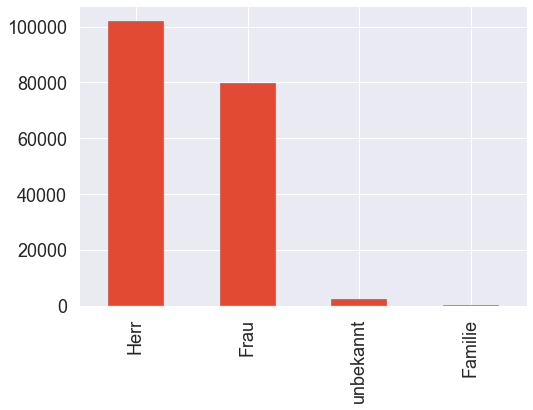

In [18]:
df.anrede.value_counts().plot(kind='bar');

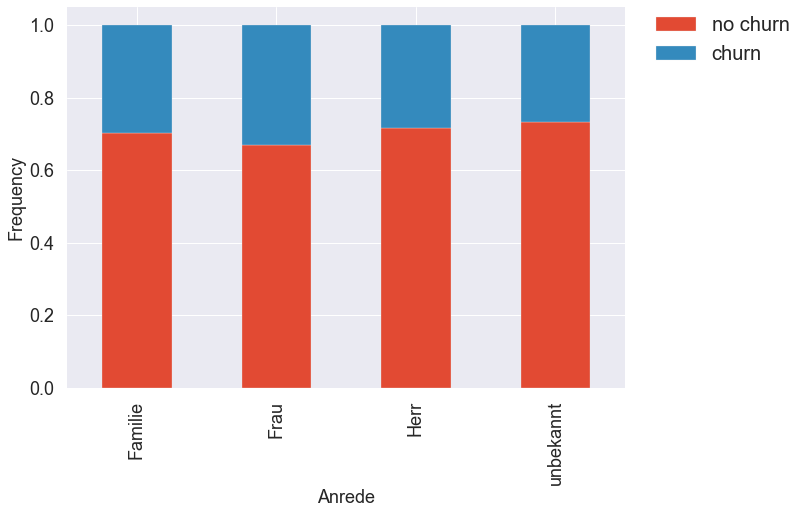

In [19]:
anrede_churn = crosstab_evaluation(df.anrede,df.churn)
crosstab_barplot(anrede_churn,['no churn','churn'],xlabelname='Anrede')

We can observe just small differences in the anrede, unknown and male customers seem to have a slightly higher churn probability. 

### Titel

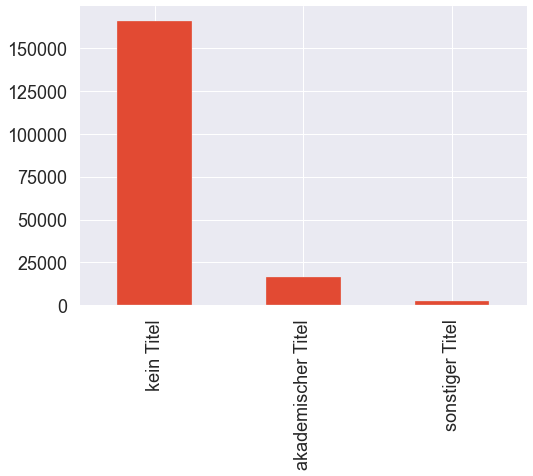

In [20]:
df.titel.value_counts().plot(kind='bar');

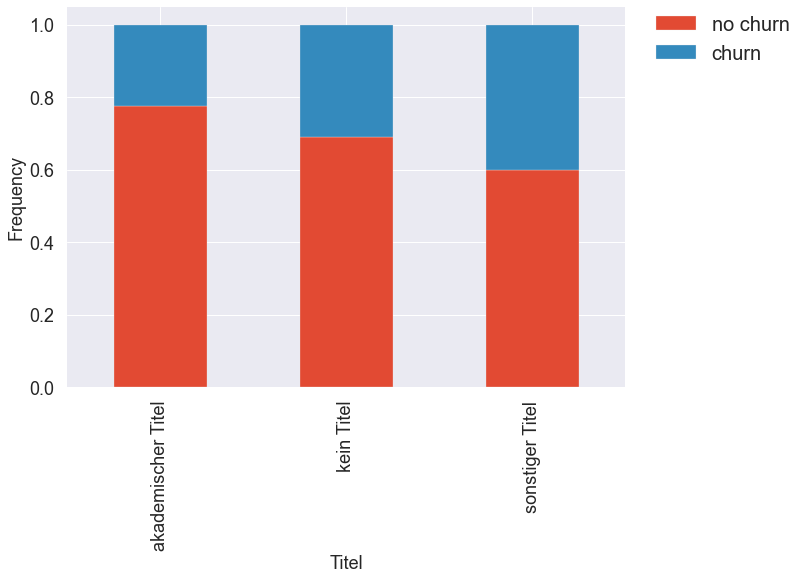

In [21]:
titel_churn = crosstab_evaluation(df.titel,df.churn)
crosstab_barplot(titel_churn,['no churn','churn'],xlabelname='Titel')

We can observer a smaller churn rate for academic titles compared to no title. The column other title (sonstiger Titel) is quite useless because we don't know hat kind of titles are included in there.

### PLZ 1 

Find the missing number of zip codes:

In [22]:
df_zip_xx = df[df.plz_1 == 'xx']
print('Number of missing zip codes entries:',df_zip_xx.shape[0])
print('Percentage of missing zip codes in total:',df_zip_xx.shape[0]/df.shape[0])

Number of missing zip codes entries: 23427
Percentage of missing zip codes in total: 0.1268655908155529


There are 19788 entries with no zip code, which is about 12 percent. 

In [23]:
df_zip_xx.ort.value_counts().nlargest(10)

Wien          4725
Zürich        1687
Graz          708 
Basel         694 
Innsbruck     526 
Salzburg      438 
Bern          419 
Linz          388 
Winterthur    188 
Luzern        153 
Name: ort, dtype: int64

The xx zip codes are all non german cities (e.g. Switzerland), so we could divide the dataset into germany and out of germany areas.

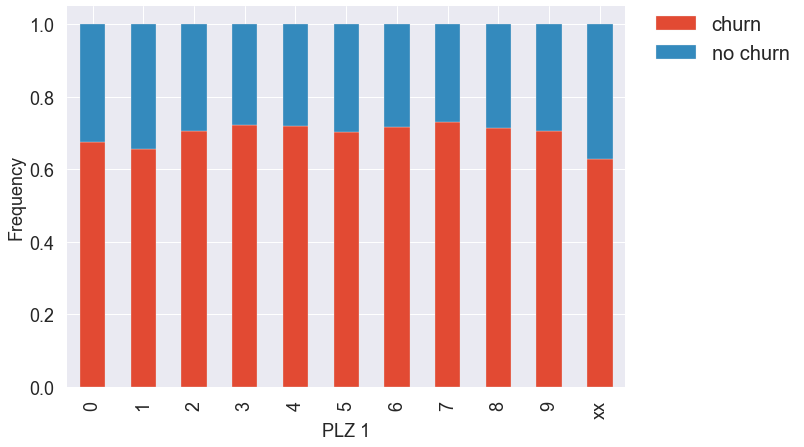

In [24]:
plz1_churn = crosstab_evaluation(df.plz_1,df.churn)
crosstab_barplot(plz1_churn,['churn','no churn'],xlabelname='PLZ 1')

Simplified geographic features, here the first digit of the zip code are quite uselfull indicators for determine regions with higher churn rate. 

### PLZ 2

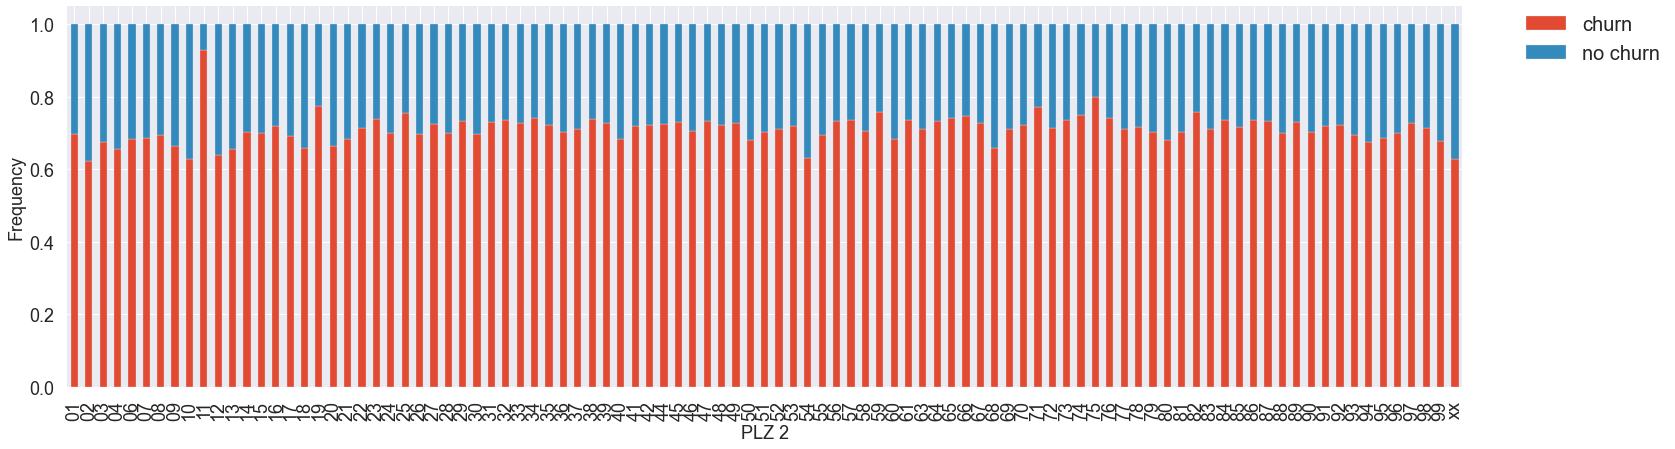

In [25]:
plz2_churn = crosstab_evaluation(df.plz_2,df.churn)
crosstab_barplot(plz2_churn,['churn','no churn'],xlabelname='PLZ 2',figsize_x=25)

Compated to plz_1 we can see more details by this geographic information, the smearing of geographical data is less with two digits and we can have nice insights in the geographical distribution of our churns.

### PLZ 3

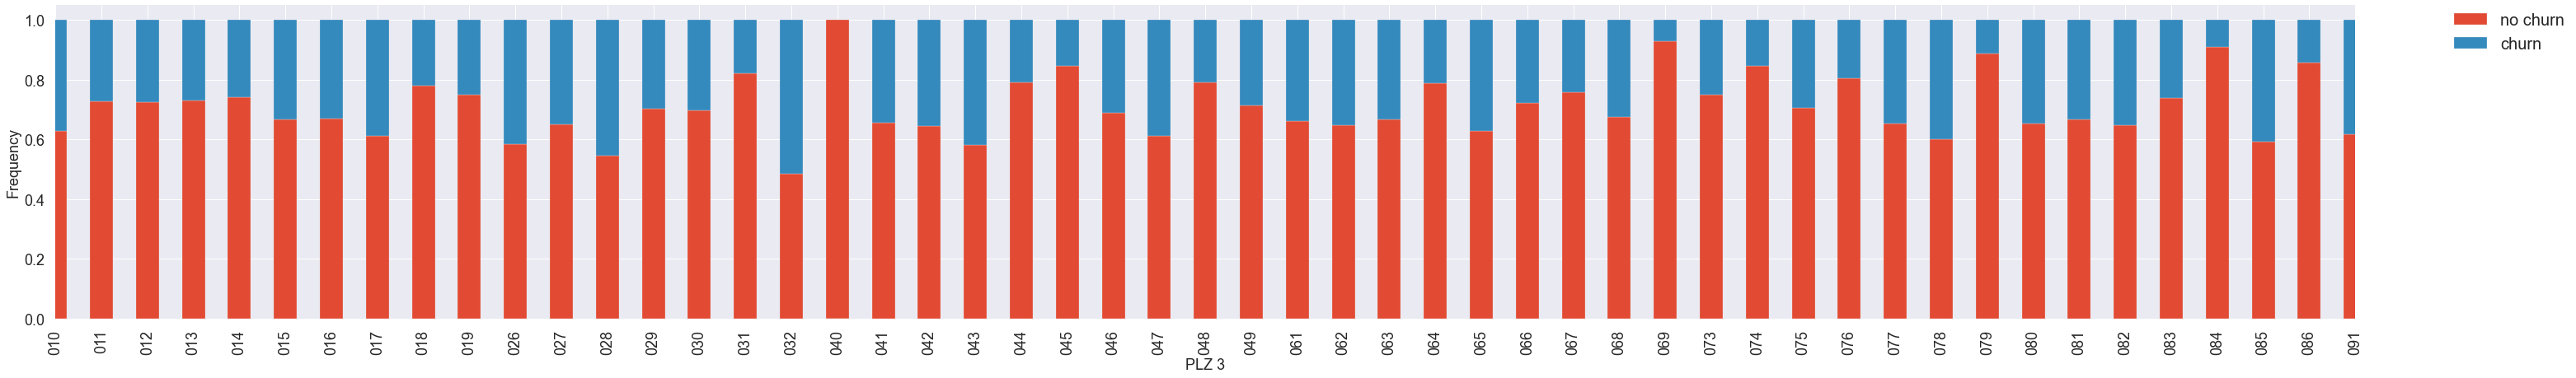

In [26]:
plz3_churn = crosstab_evaluation(df.plz_3,df.churn)
crosstab_barplot(plz3_churn,['no churn','churn'],xlabelname='PLZ 3',figsize_x=50)
plt.xlim(0,50);

By using the 3 digit PLZ we can observe much higher variations in the churn rate. We should definitely include this feature in our model.

Since this feature has a lot of entries, it is usefull to use a nice geographical visualization with geopandas. The link to geopandas for germany can be found here: https://juanitorduz.github.io/germany_plots/

In [27]:
# geodata
plz_shape_df = gpd.read_file('data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       8706 non-null   object  
 1   note      8706 non-null   object  
 2   geometry  8706 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 204.2+ KB


In [28]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

In [29]:
plz_region_df = pd.read_csv(
    'data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

ort    plz           bundesland
0  Aach    78267  Baden-Württemberg  
1  Aach    54298  Rheinland-Pfalz    
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

In [30]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

Mapping Functions to map churn probabilities for each subset of plz digits into a dataframe. 

In [31]:
def convert_plz_1_to_prob(plz):
    index = str(plz)[0]
    #print(index)
    value = plz1_churn.iloc[int(index),1]
    return value

def convert_plz_2_to_prob(plz):
    index = str(plz)[0:2]
    #print(index)
    value = plz2_churn[plz2_churn.index == index].iloc[0,1]
    #print(value)
    return value

def convert_plz_3_to_prob(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_churn[plz3_churn.index == index].iloc[0,1]
    #print(value)
    return value

In [32]:
germany_df['churn_plz_1'] = germany_df.plz.apply(lambda x: convert_plz_1_to_prob(x))

In [33]:
germany_df['churn_plz_2'] = germany_df.plz.apply(lambda x: convert_plz_2_to_prob(x))

In [34]:
germany_df['churn_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_prob(x))

Include the number of inhabitants in the dataframe:

In [35]:
plz_einwohner_df = pd.read_csv(
    'data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

plz  einwohner
0  01067  11957    
1  01069  25491    
2  01097  14811    
3  01099  28021    
4  01108  5876

In [36]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

#germany_df.head()

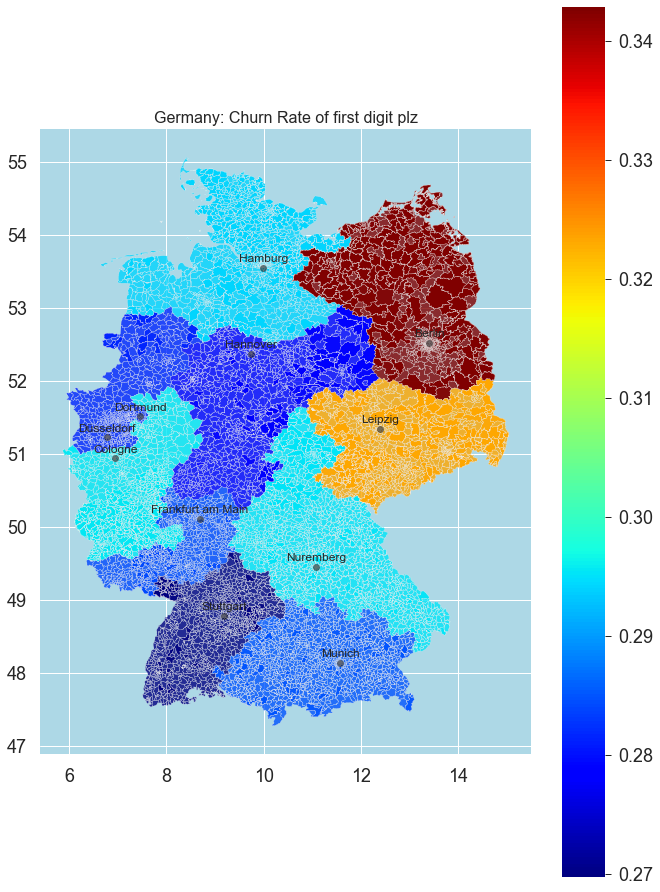

In [37]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_1', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)

We can now visually see the higher churn rate in the eastern part of Germany. 

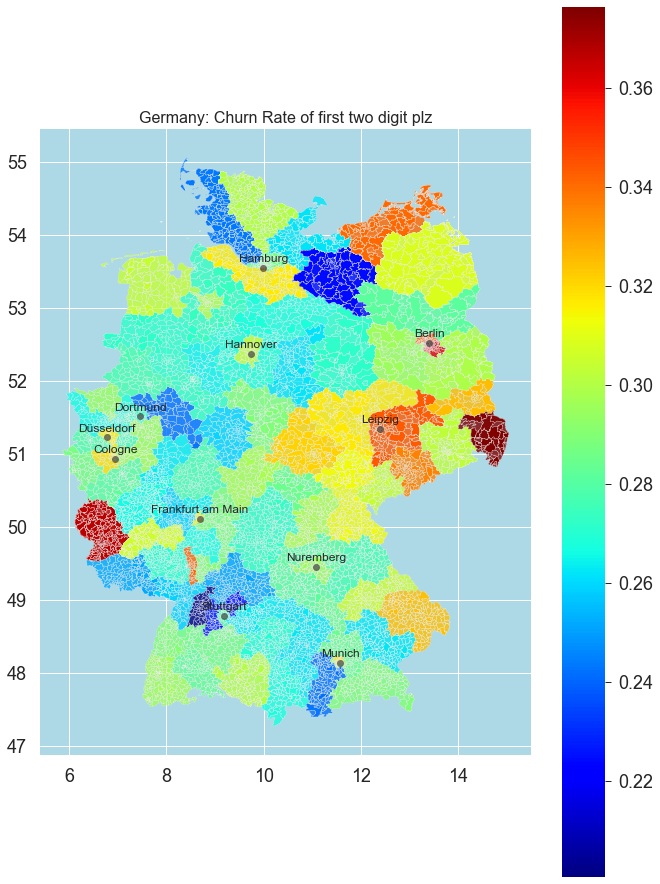

In [38]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_2', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first two digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_2_digit.png',dpi=300)

Now we can more clearly see some smaller regions with much lower and much higher churn rates.

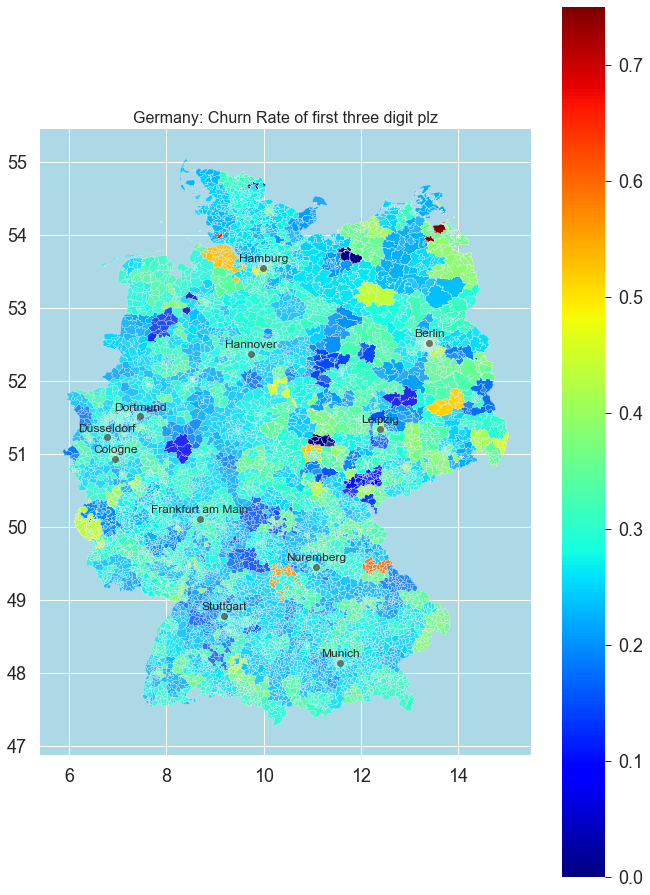

In [39]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_3_digit.png',dpi=300)

This gives us a very detailled overview of the geographical distribution of the churn rate, with much less flattening of the data. We can observe areas with almost zero churn rate and regions with more than 60 percent churn rate.  

### Metropole

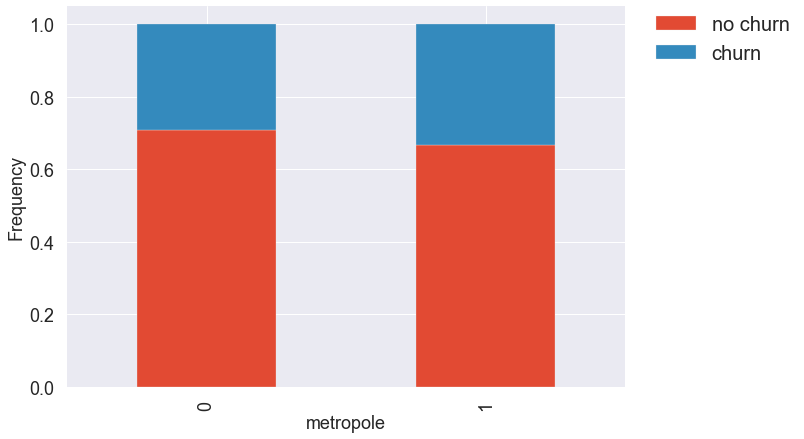

In [40]:
metropole_churn = crosstab_evaluation(df.metropole,df.churn)
crosstab_barplot(metropole_churn,['no churn','churn'],xlabelname='metropole')

No significant influence if either a metropolitan city or not is found. 

### Land iso code

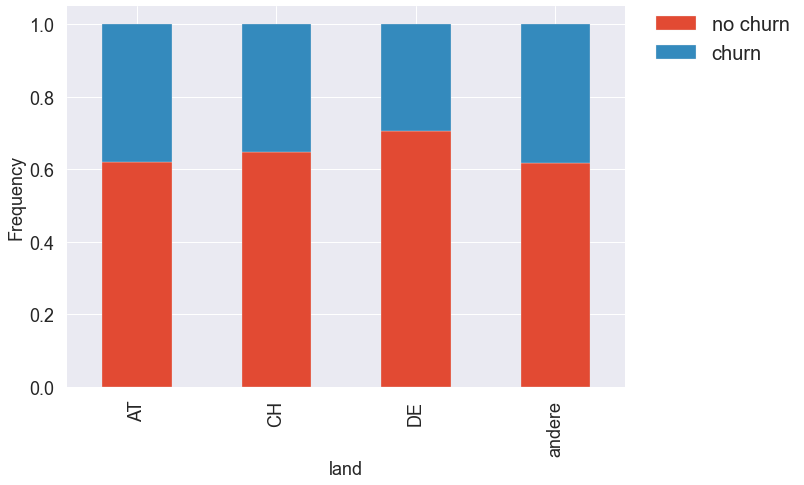

In [41]:
land_iso_churn = crosstab_evaluation(df.land_iso_code,df.churn)
crosstab_barplot(land_iso_churn,['no churn','churn'],xlabelname='land')

Germany has the highest churn rate, people from abroad (Austria (AT), Switzerland (CH) and other countries abroad) tend to churn with a lower probability. People from abroad who are subscribers tend to be more commited to their subscription. 

### Ort/City

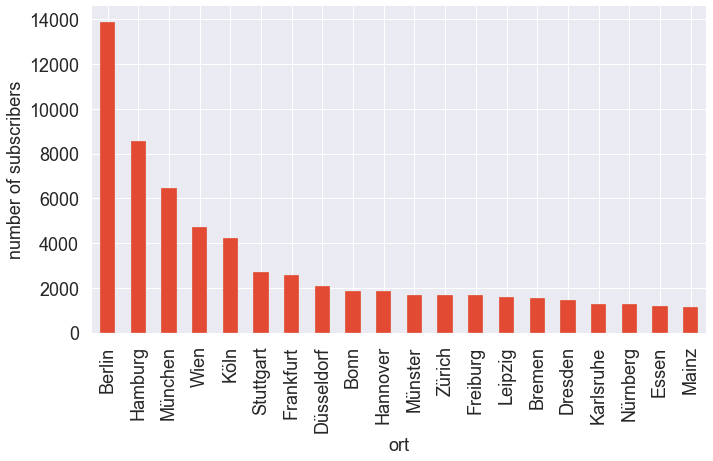

In [42]:
a = df.groupby('ort').size().nlargest(20)
a.plot(kind='bar',ylabel='number of subscribers',figsize=(11,6));

The Zeit Top City is Berlin, followed by Hamburg and Munich. Vienna surpsisingly has a quite high number of subscribers of about 4000.

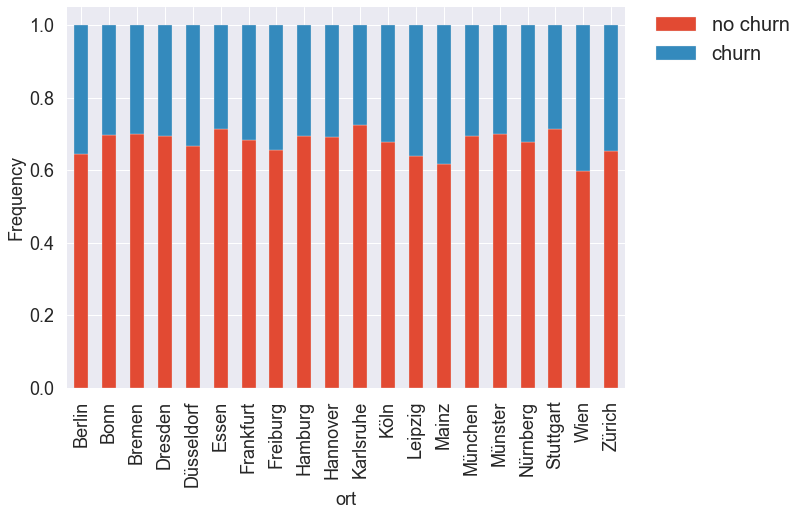

In [43]:
b = list(a.index)
df_top_cities = df[df['ort'].apply((lambda x: x in b))]

ort_churn = crosstab_evaluation(df_top_cities.ort,df_top_cities.churn)
crosstab_barplot(ort_churn,['no churn','churn'],xlabelname='ort')

The churn rate varies over the twenty largest cities. 

### Summary Customer Related Features

To sum up, the following was found about the customer related features:

- **anrede**: Small differences: keep feature.
- **titel**: Smaller churn rate for academic titles compared to no title: keep feature
- **plz_1, plz_2, plz_3**: The plz code gives us a very detailled overview of the geographical distribution of the churn rate: keep feature  
- **ort:** Geographic information, but similar to plz: should be dropped
- **metropole:** Just slight difference in churn rate: keep feature
- **land_iso_code:** There is a country influence on the churn rate: keep feature

## Subscription Features

The following features are related to the subscription kind and shortly described:

- kanal
- objekt_name 
- aboform_name
- zahlung_rhythmus_name
- rechnungsmonat
- zahlung_weg_name 
- studentenabo
- unterbrechung

### Kanal

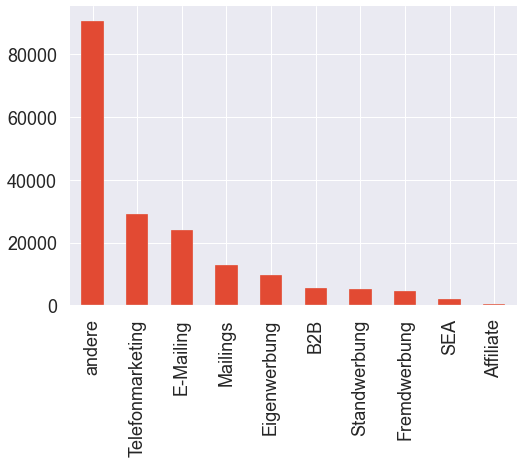

In [44]:
df.kanal.value_counts().plot(kind='bar');

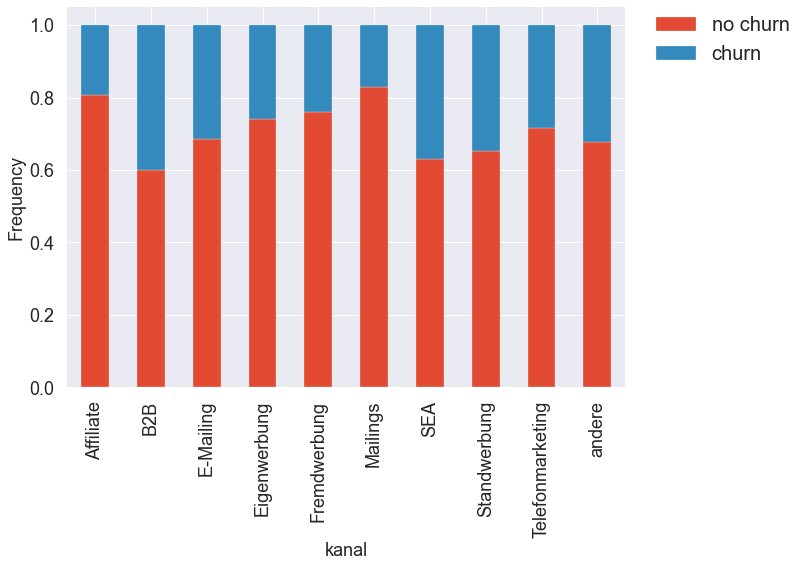

In [45]:
kanal_churn = crosstab_evaluation(df.kanal,df.churn)
# sort crosstable by churn probability
#kanal_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(kanal_churn,['no churn','churn'],xlabelname='kanal')

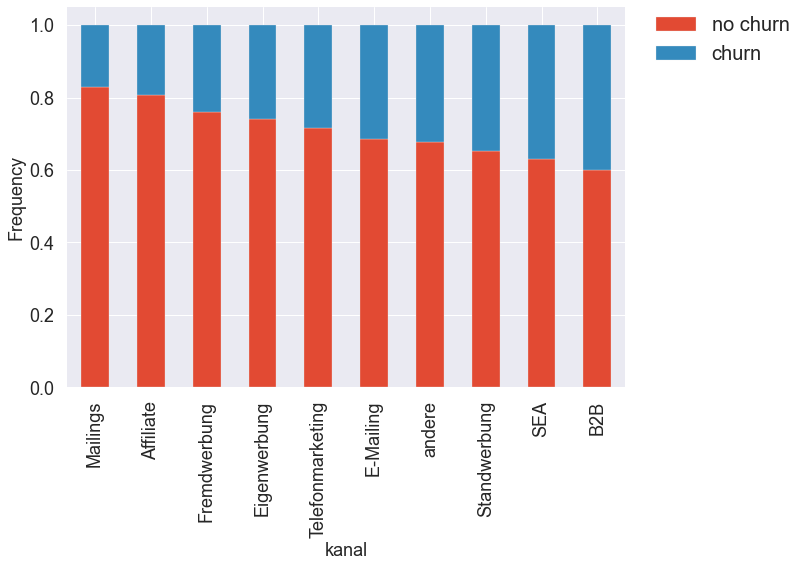

In [46]:
kanal_churn = crosstab_evaluation(df.kanal,df.churn)
# sort crosstable by churn probability
kanal_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(kanal_churn,['no churn','churn'],xlabelname='kanal')

The channel of the subrscitpion is an important feature for churn. The churn rate increases from less than 20 percent for mailings to almost 40 percent for SEA (Search Engine Advertising).  

### cnt_abo

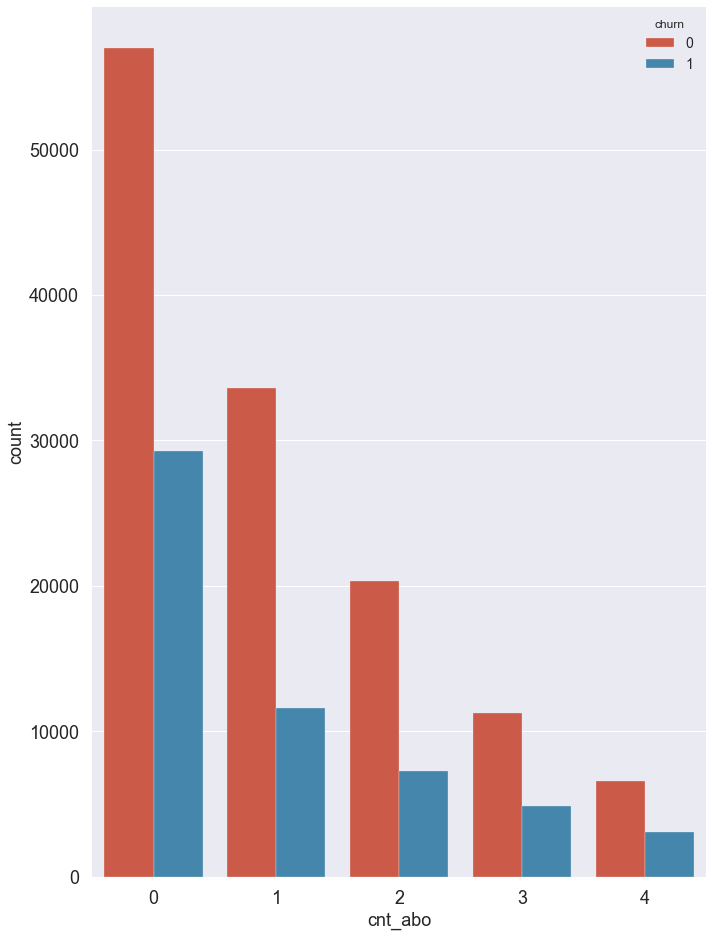

In [47]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="cnt_abo", hue='churn',data=df)
#ax.set_xlim(0,10)

### objekt_name

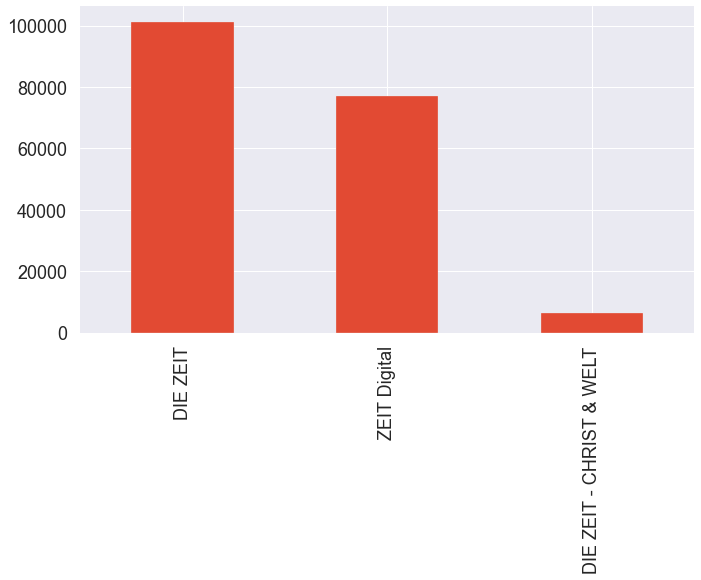

In [48]:
df.objekt_name.value_counts().plot(kind='bar',figsize=(11,6));

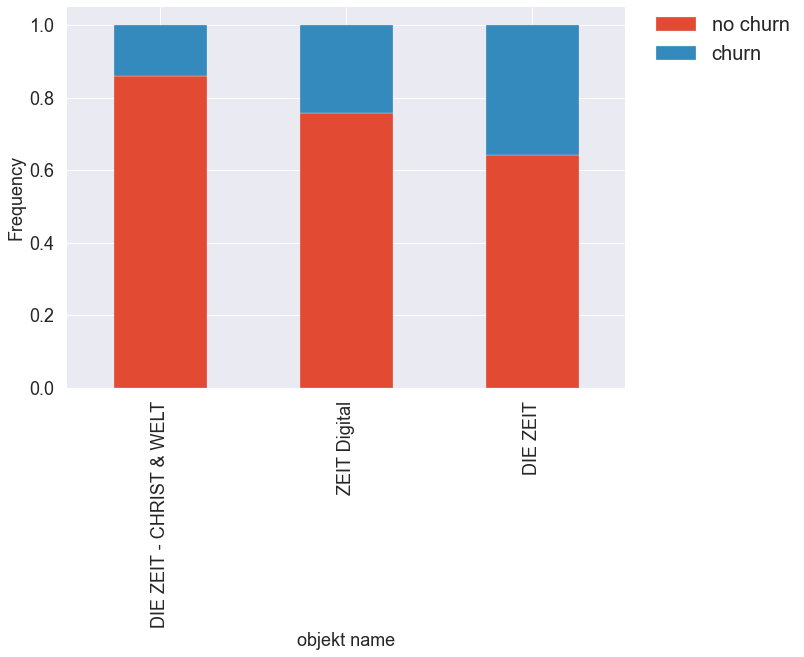

In [49]:
objekt_churn = crosstab_evaluation(df.objekt_name,df.churn)
objekt_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(objekt_churn,['no churn','churn'],xlabelname='objekt name')

Combined subscription of Die Zeit with Christ & Welt has a remarkably smaller churn rate than Zeit Digital and Die Zeit print. 

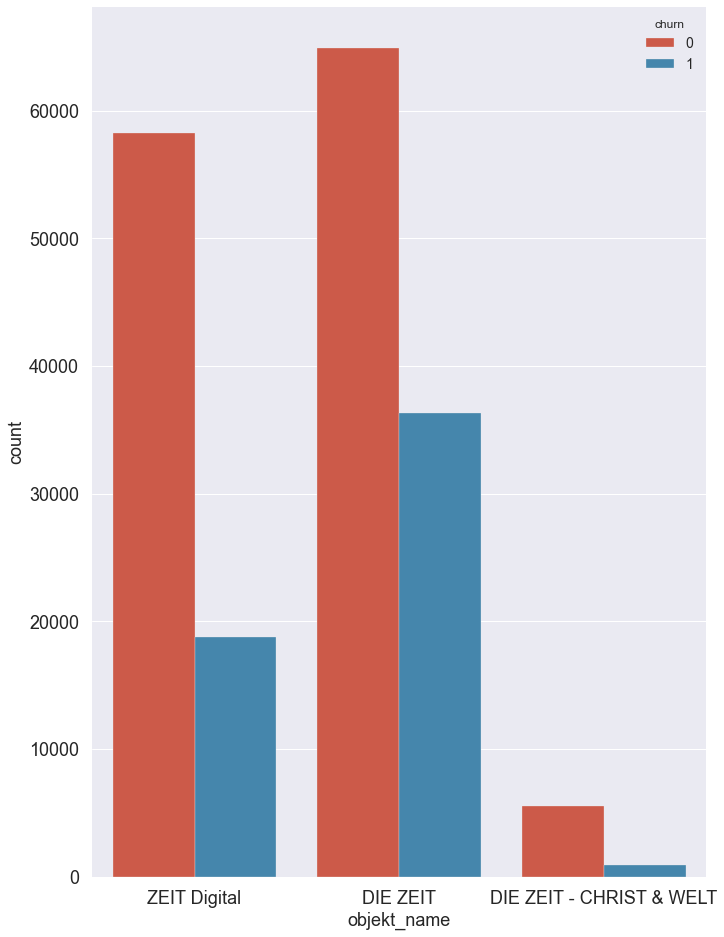

In [50]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="objekt_name", hue='churn',data=df)

### aboform_name

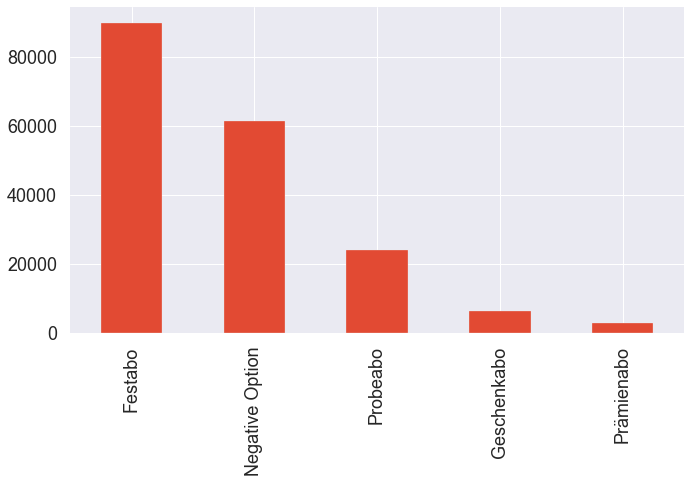

In [51]:
df.aboform_name.value_counts().plot(kind='bar',figsize=(11,6));

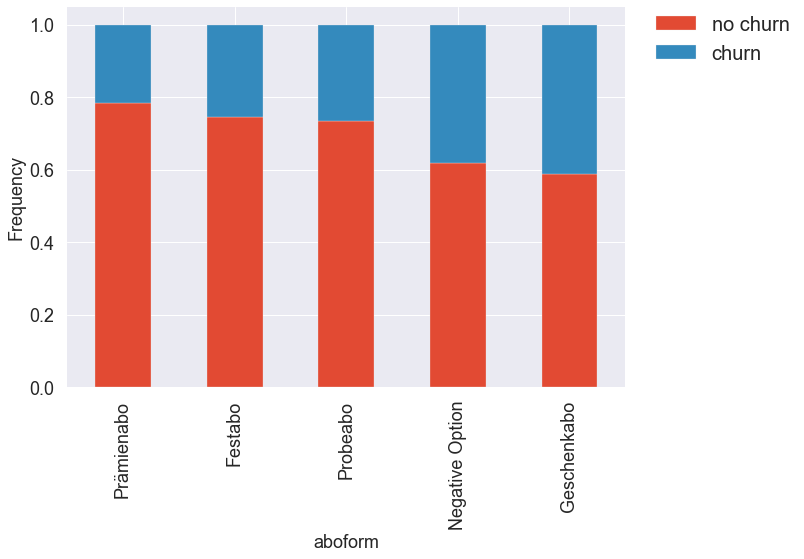

In [52]:
aboform_churn = crosstab_evaluation(df.aboform_name,df.churn)
aboform_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(aboform_churn,['no churn','churn'],xlabelname='aboform')

Also here, we can see that Prämienabo has a much smaller churn rate than others, in particular Geschenkabo and Negative Option. 

### zahlung_rhythmus_name

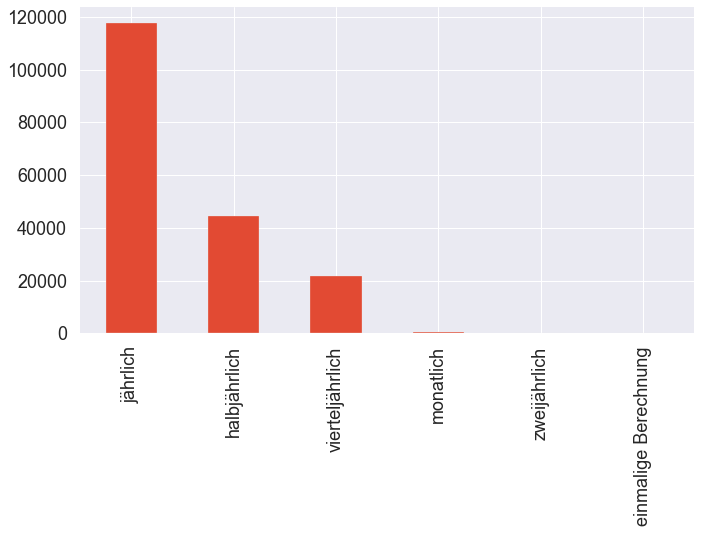

In [53]:
df.zahlung_rhythmus_name.value_counts().plot(kind='bar',figsize=(11,6));

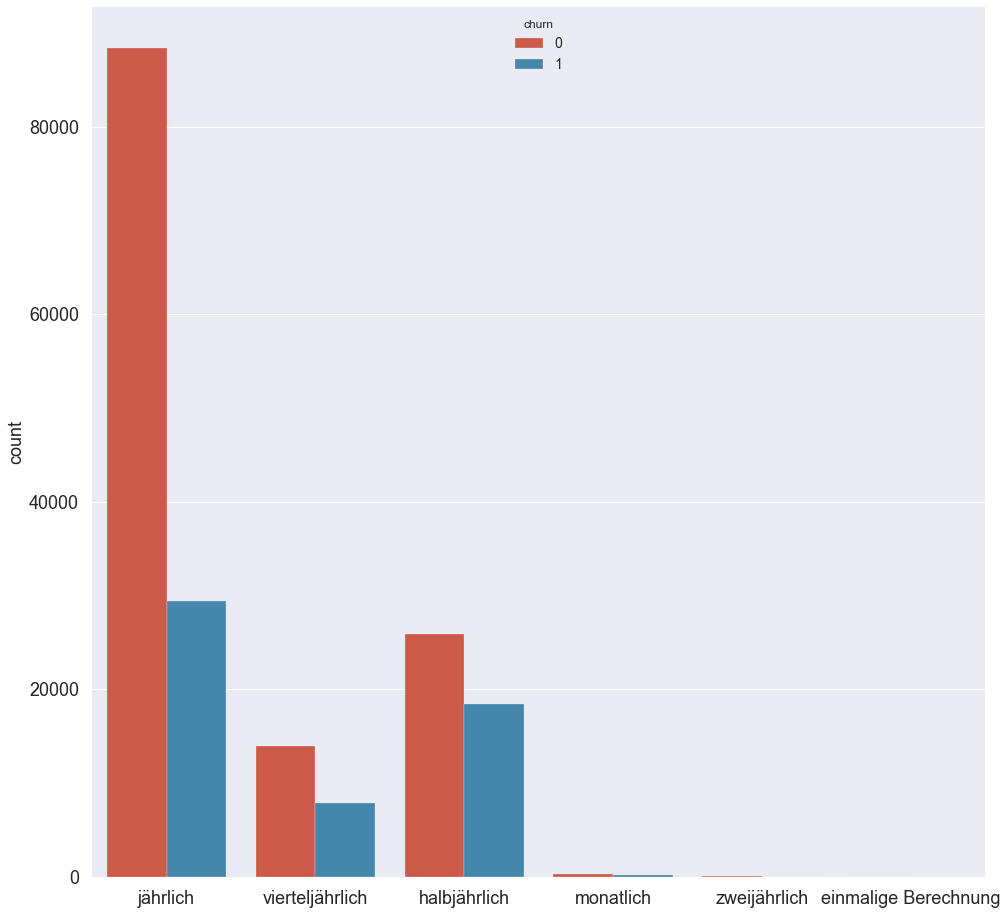

In [54]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.countplot(x='zahlung_rhythmus_name',data=df,hue='churn')
ax.set_xlabel('');

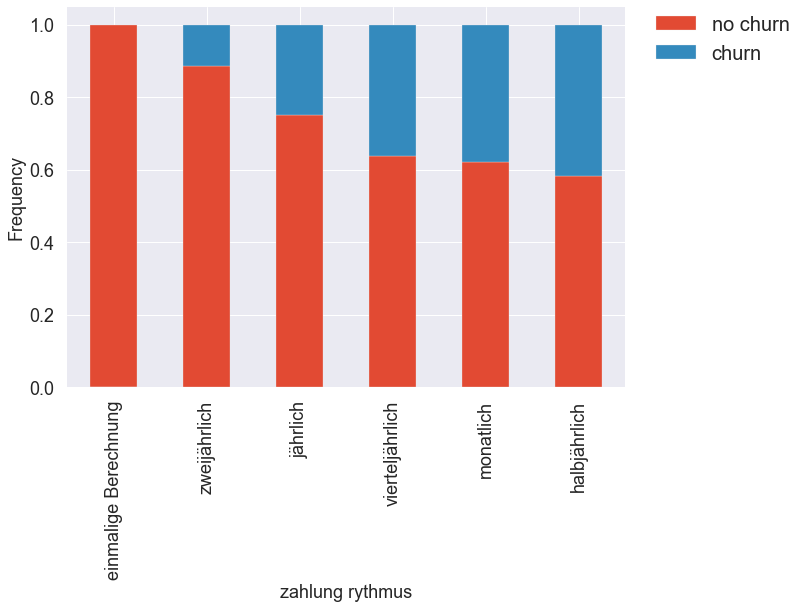

In [55]:
zahlung_rythmus_churn = crosstab_evaluation(df.zahlung_rhythmus_name,df.churn)
zahlung_rythmus_churn.sort_values(by=1,inplace=True,ascending=True)
crosstab_barplot(zahlung_rythmus_churn,['no churn','churn'],xlabelname='zahlung rythmus')

We can observe a strong dependence of the payment period on the churn rate. Payments with less than one year period tend to have higher churn rates.

### rechnungsmonat

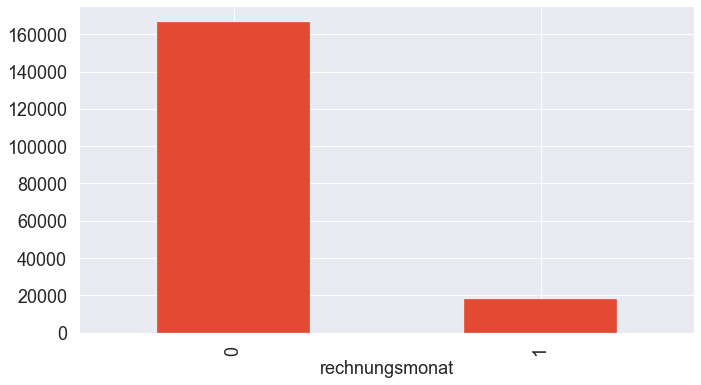

In [56]:
df.rechnungsmonat.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('rechnungsmonat');

Rechnungsmonat? What is the meaning?

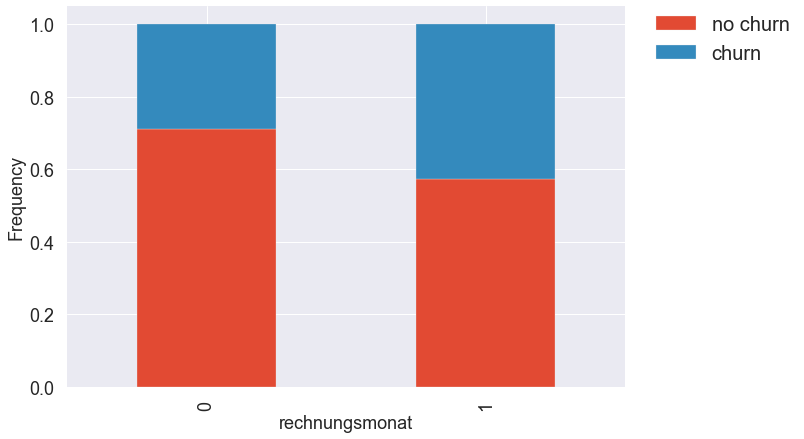

In [57]:
rechnungsmonat_churn = crosstab_evaluation(df.rechnungsmonat,df.churn)
crosstab_barplot(rechnungsmonat_churn,['no churn','churn'],xlabelname='rechnungsmonat')

If there is a billing months, a subscriber has a higher tendency to churn the subscription than without a billing month. 

### zahlung_weg_name

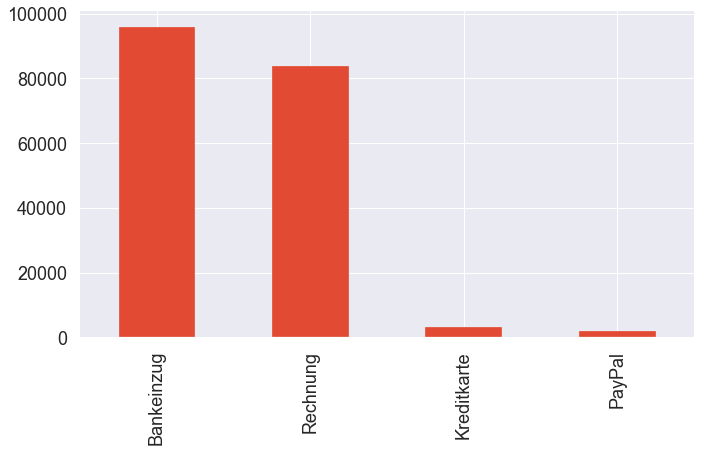

In [58]:
df.zahlung_weg_name.value_counts().plot(kind='bar',figsize=(11,6));

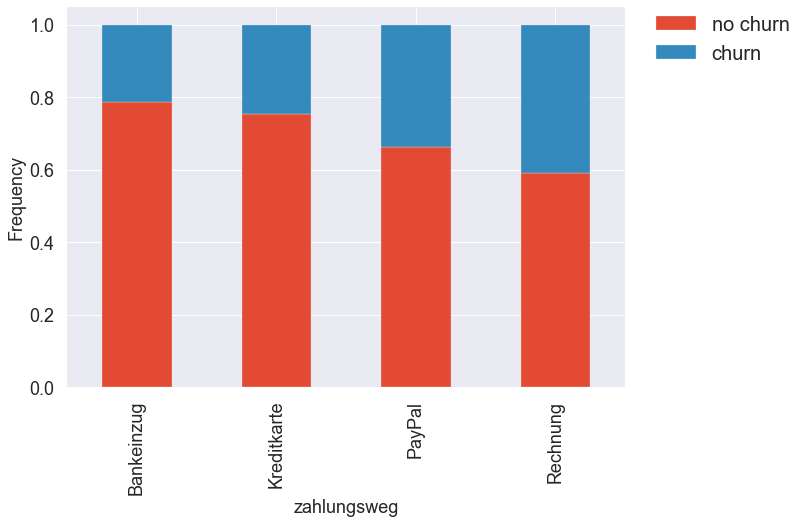

In [59]:
zahlungsweg_churn = crosstab_evaluation(df.zahlung_weg_name,df.churn)
crosstab_barplot(zahlungsweg_churn,['no churn','churn'],xlabelname='zahlungsweg')

If the payment is made by direct debit (Bankeinzug), the churn rate is much lower than if the payment is made by invoice. Credit Cards and Paypal are in between.

### studentenabo

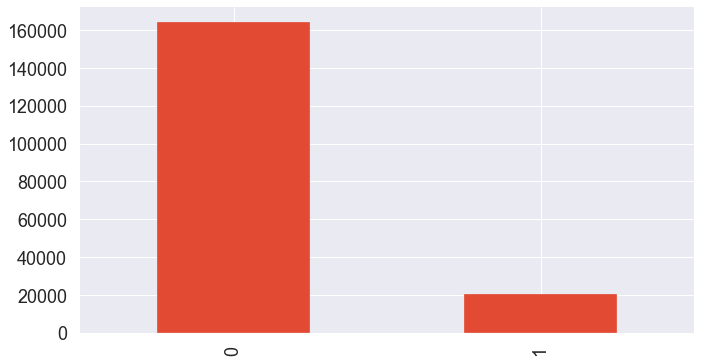

In [60]:
df.studentenabo.value_counts().plot(kind='bar',figsize=(11,6));

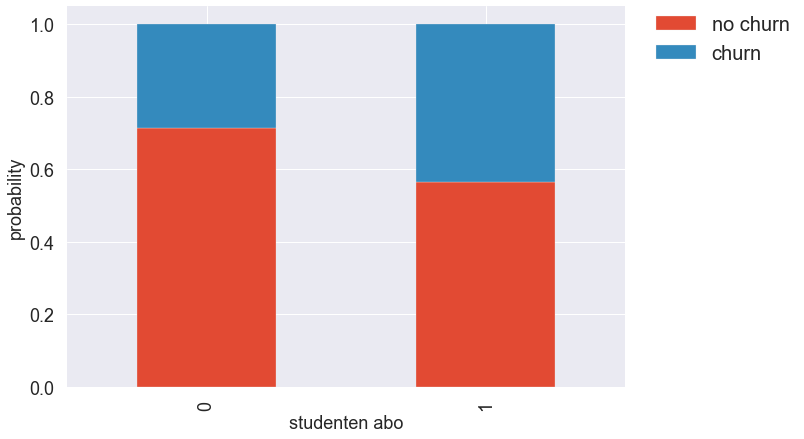

In [61]:
studentenabo_churn = crosstab_evaluation(df.studentenabo,df.churn)
crosstab_barplot(studentenabo_churn,['no churn','churn'],xlabelname='studenten abo')
plt.ylabel('probability');

The students tend to churn more frequently.

#### Studentenmap

In [62]:
plz3_students = crosstab_evaluation(df.plz_3,df.studentenabo)
#crosstab_barplot(plz3_students,['no student abo','student abo']ticklabelname='PLZ 3',figsize_x=50)

In [63]:
def convert_plz_3_to_student(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_students[plz3_students.index == index].iloc[0,1]
    #print(value)
    return value

In [64]:
germany_df['studenten_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_student(x))

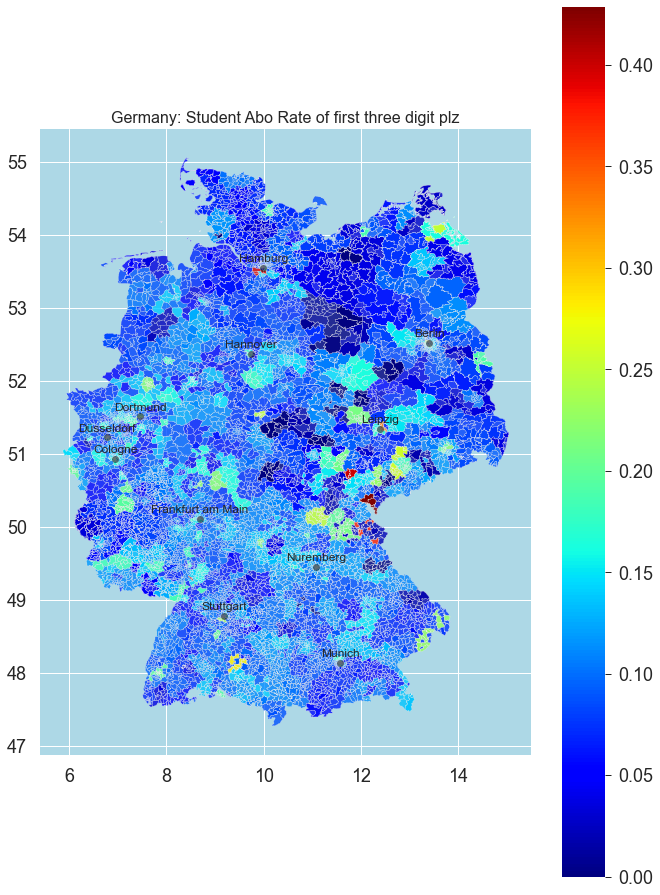

In [65]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='studenten_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Student Abo Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/student_abo_rate.png',dpi=300)

Here we can see where the student churn rate is the highest and where it is the lowest.

### unterbrechung

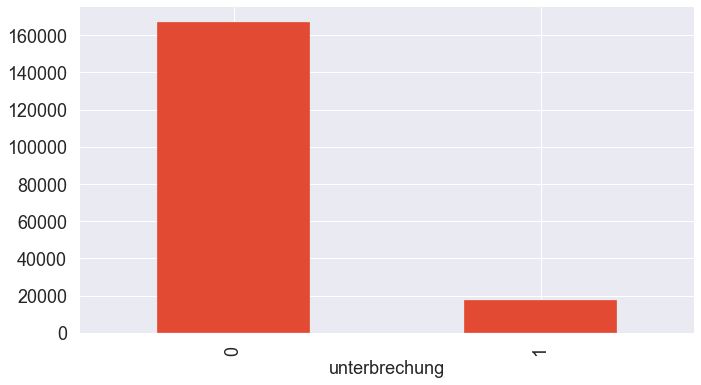

In [66]:
df.unterbrechung.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('unterbrechung');

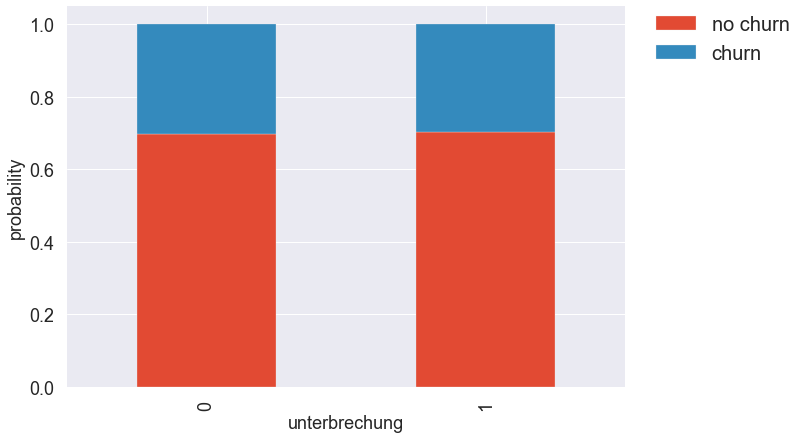

In [67]:
unterbrechung_churn = crosstab_evaluation(df.unterbrechung,df.churn)
crosstab_barplot(unterbrechung_churn,['no churn','churn'],xlabelname='unterbrechung')
plt.ylabel('probability');

The churn rate for interruptions of the subscription seems to be the same.  

### Summary Subscription Data

To sum up, the following was found about the subscription related features:

- **kanal:** An important feature for churn (20 to almost 40 percent churn rate for different channels: keep feature  
- **objekt_name:** Combined subscription have much less churn than digital and print subscriptions: keep feature  
- **aboform_name:** Churn rate is dependent on the form of subscription: keep feature 
- **zahlung_rhythmus_name:** Dependence of the payment period on the churn rate: keep feature
- **rechnungsmonat:** If there is a billing months, a subscriber has a higher tendency to churn: keep feature
- **zahlung_weg_name:** Direct debit (Bankeinzug) churn rate is much lower than if the payment is made by invoice: keep feature 
- **studentenabo:** Students tend to churn more frequently: keep feature
- **unterbrechung:** The churn rate for interruptions of the subscription seems to be the same: could be kept!

## Time/Temporal Features

The following features are related to time subscription kind and shortly described: 
- lesedauer
- liefer_beginn_evt
- abo_registrierung_min
- nl_registrierung_min
- date_x
- kuendigungs_eingangs_datum


### lesedauer

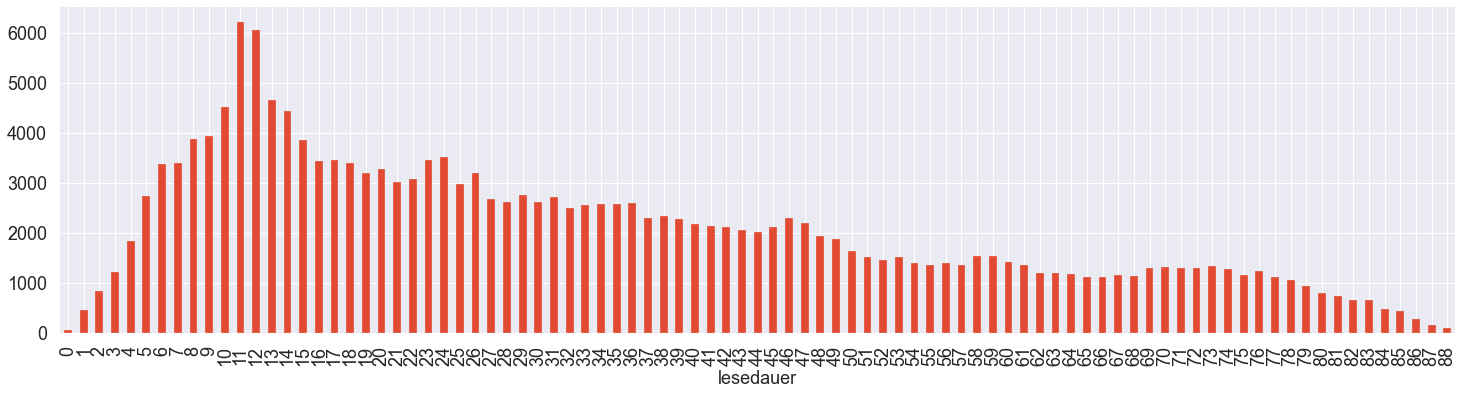

In [68]:
df.lesedauer.value_counts().sort_index().plot(kind='bar',figsize=(25,6));
#df.lesedauer.value_counts().sort_values('lesedauer').plot(kind='bar',figsize=(25,6));
plt.xlabel('lesedauer');

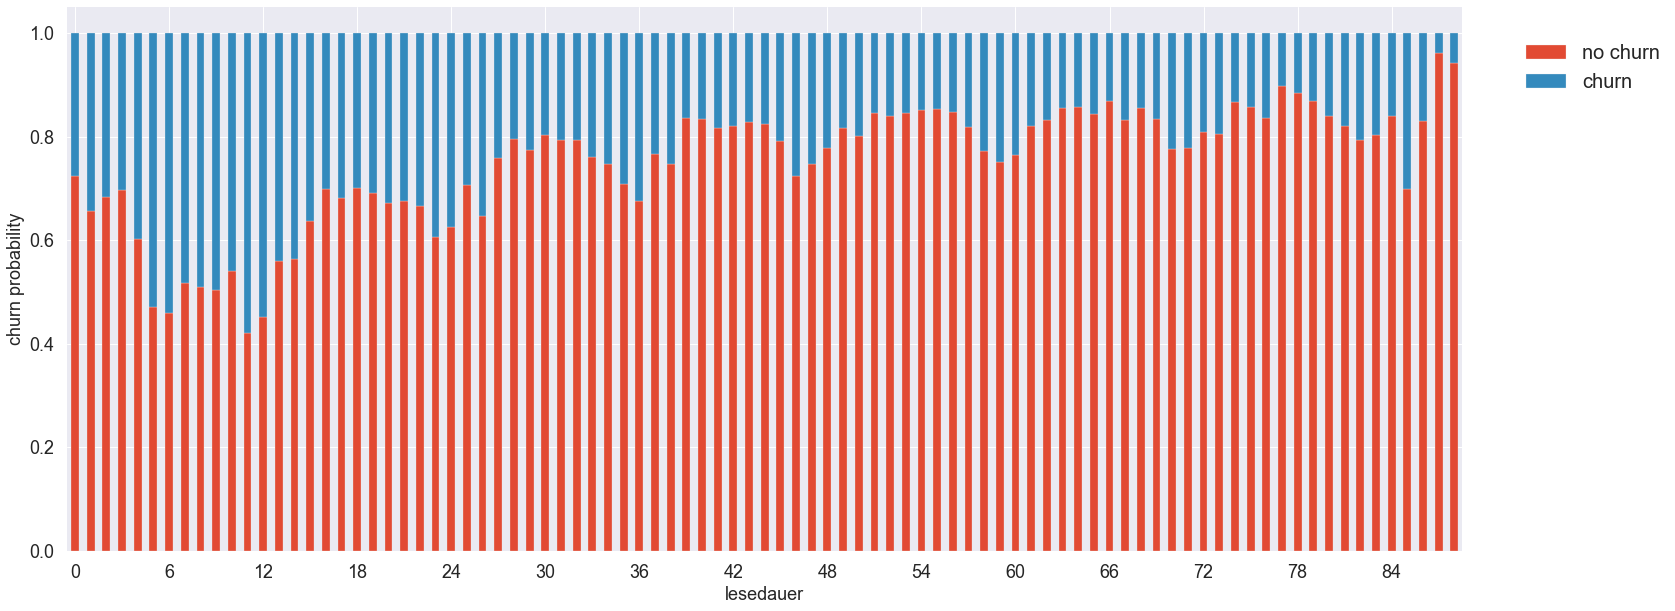

In [69]:
lesedauer_churn = crosstab_evaluation(df.lesedauer,df.churn)
crosstab_barplot(lesedauer_churn,['no churn','churn'],xlabelname='lesedauer',figsize_x=25,figsize_y=10)
plt.ylabel('churn probability');
plt.xticks(np.arange(0, 88, 6.0),rotation=0);

The lesedauer is an important measure for the churn probability. With fewer months of lesedauer, the churn rate decreases, and then after 12 months there is a wave pattern with a period of 12 months (24, 36, 38, 60 months and so on) in which the churn rate increases.

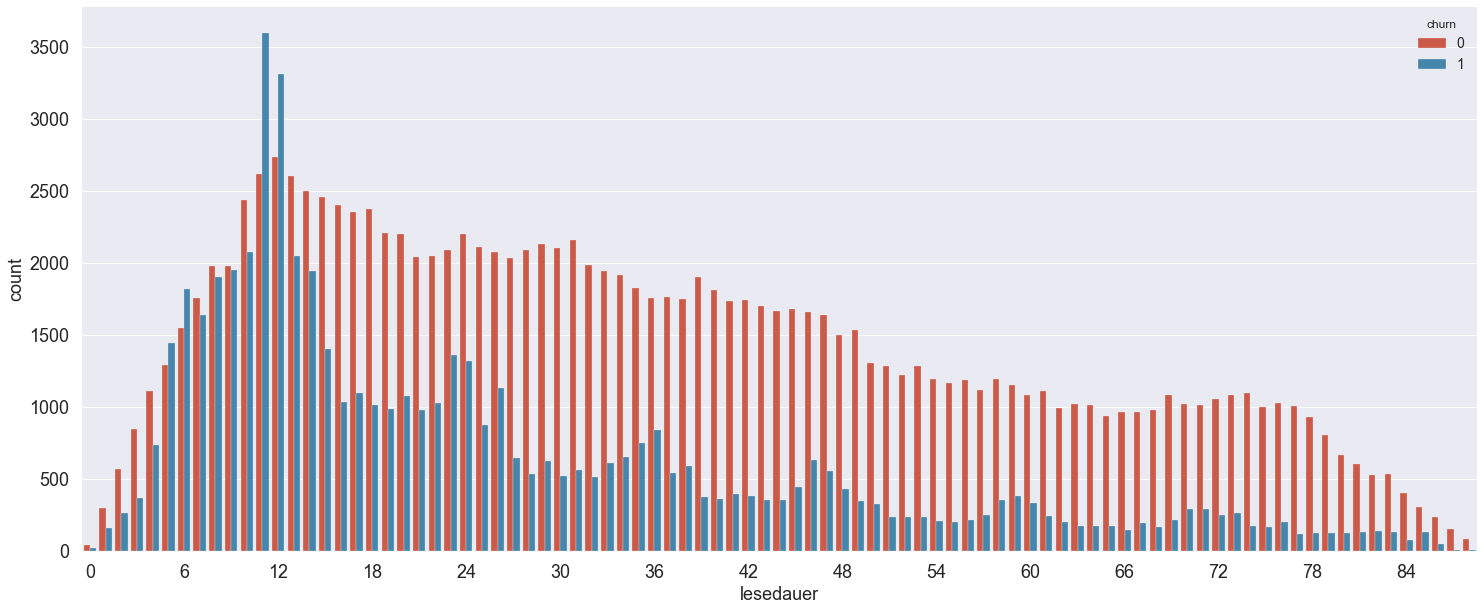

In [70]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x='lesedauer',data=df,hue='churn')
ax.set_xlabel('');
plt.xticks(np.arange(0, 88, 6.0));
plt.xlabel('lesedauer');

### liefer_beginn_evt

In [71]:
df.liefer_beginn_evt.isna().sum()

0

In [72]:
# convert liefer beginn to datetime
df.liefer_beginn_evt.head()

0    2013-10-02
1    2013-10-02
2    2013-10-02
3    2013-10-17
4    2013-09-12
Name: liefer_beginn_evt, dtype: object

In [73]:
df['liefer_beginn_evt'] = pd.to_datetime(df['liefer_beginn_evt'])
#df['liefer_beginn_evt'] = df['liefer_beginn_evt'].dt.date
df.liefer_beginn_evt.describe()

count     184660             
unique    406                
top       2019-01-10 00:00:00
freq      1389               
first     2013-01-03 00:00:00
last      2019-05-23 00:00:00
Name: liefer_beginn_evt, dtype: object

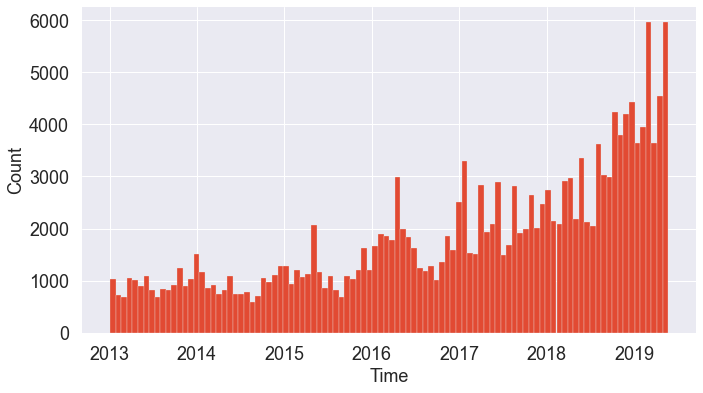

In [74]:
df.liefer_beginn_evt.hist(bins=100,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

This feature can be kept, since all users have this feature included. 

In [75]:
#plt.subplots(figsize=(15,6))
#ax = sns.countplot(x='liefer_beginn_evt', data=df)
#ax.set(xlabel='liefer_beginn_evt', ylabel='Frequency')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### abo_registrierung_min

In [76]:
df.abo_registrierung_min.isna().sum()

0

In [77]:
# convert abo registrierung to datetime
df['abo_registrierung_min'] = pd.to_datetime(df['abo_registrierung_min'])
#df['abo_registrierung_min'] = df['abo_registrierung_min'].dt.date
df.abo_registrierung_min.describe()

count     184660             
unique    109890             
top       1900-01-01 00:00:00
freq      23630              
first     1900-01-01 00:00:00
last      2019-05-21 03:44:07
Name: abo_registrierung_min, dtype: object

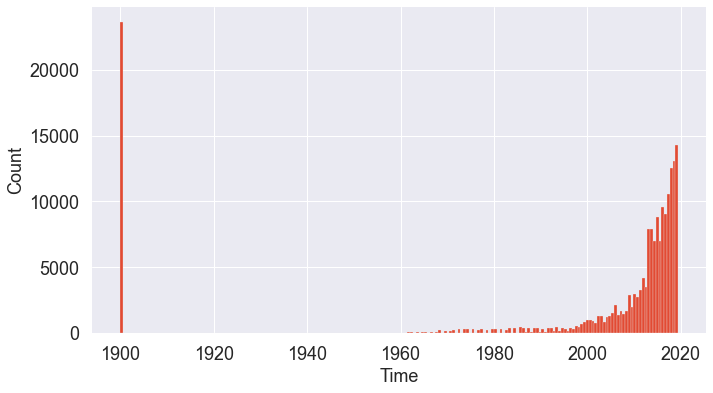

In [78]:
df.abo_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

Due to the huge amount of unknown time stamps, which are set to 1900-01-01, this feature can not be used for the model. Therefore it should be dropped.

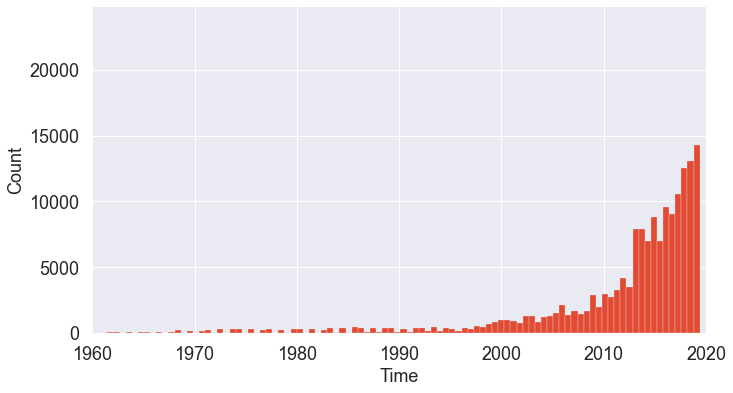

In [79]:
df.abo_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');
plt.xlim('1960-01-01','2020-01-01');

### nl_registrierung_min

In [80]:
df.nl_registrierung_min.isna().sum()

0

In [81]:
# convert nl_registrierung to datetime
df['nl_registrierung_min'] = pd.to_datetime(df['nl_registrierung_min'], format='%Y-%m-%d')
#df['nl_registrierung_min'] = df['nl_registrierung_min'].dt.date
df.nl_registrierung_min.describe()

count     184660             
unique    111660             
top       1900-01-01 00:00:00
freq      12243              
first     1900-01-01 00:00:00
last      2020-07-21 08:30:49
Name: nl_registrierung_min, dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184660 entries, 0 to 209041
Columns: 169 entries, liefer_beginn_evt to date_x
dtypes: datetime64[ns](3), float64(32), int64(120), object(14)
memory usage: 244.5+ MB


In [83]:
df.nl_registrierung_min.head(2)

0   2005-09-30
1   2005-09-30
Name: nl_registrierung_min, dtype: datetime64[ns]

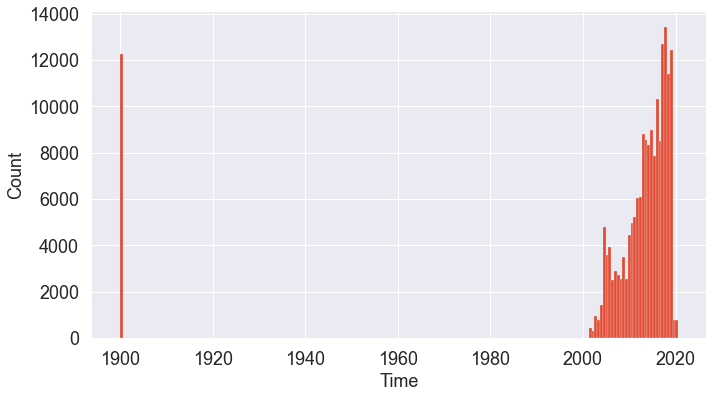

In [84]:
df.nl_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

We can observe a large number of unknown data which is set to 1900-01-01. This feature can therefore not be used in the model.

(10957.0, 18262.0)

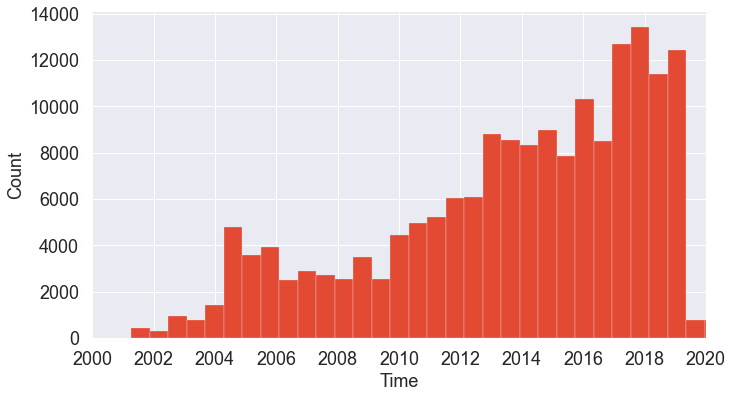

In [85]:
df.nl_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');
plt.xlim('2000-01-01','2020-01-01')

In [86]:
df.nl_registrierung_min.head(2)

0   2005-09-30
1   2005-09-30
Name: nl_registrierung_min, dtype: datetime64[ns]

### date_x

In [87]:
df.date_x.isna().sum()

0

In [88]:
# convert date_x to datetime
df['date_x'] = pd.to_datetime(df['date_x'], format='%Y-%m-%d')
df['date_x'] = df['date_x'].dt.date
df.date_x.describe()

count     184660    
unique    367       
top       2020-01-29
freq      747       
Name: date_x, dtype: object

In [89]:
df.date_x.head(2)

0    2019-06-18
1    2019-06-18
Name: date_x, dtype: object

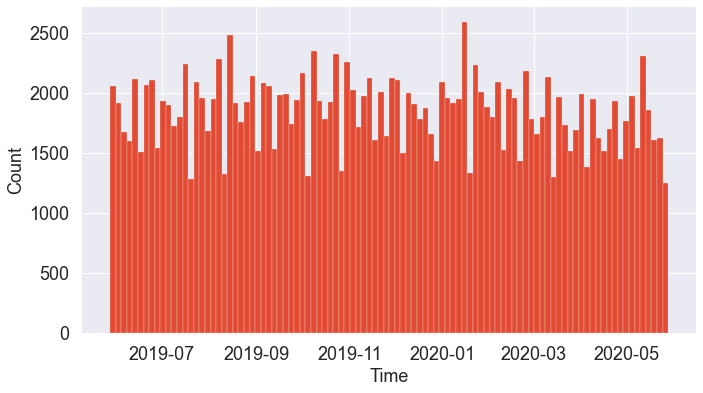

In [90]:
df.date_x.hist(bins=100,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

### kuendigungs_eingangs_datum

In [91]:
df.kuendigungs_eingangs_datum.isna().sum()

128680

In [92]:
df.kuendigungs_eingangs_datum.fillna(value='1900-01-01 00:00:00',inplace=True);

In [93]:
# convert date_x to datetime
df['kuendigungs_eingangs_datum'] = pd.to_datetime(df['kuendigungs_eingangs_datum'],errors='coerce',format='%Y-%m-%d')
#df['kuendigungs_eingangs_datum'] = df['kuendigungs_eingangs_datum'].dt.date
df.kuendigungs_eingangs_datum.describe()

count     184660             
unique    350                
top       1900-01-01 00:00:00
freq      128680             
first     1900-01-01 00:00:00
last      2020-05-28 00:00:00
Name: kuendigungs_eingangs_datum, dtype: object

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184660 entries, 0 to 209041
Columns: 169 entries, liefer_beginn_evt to date_x
dtypes: datetime64[ns](4), float64(32), int64(120), object(13)
memory usage: 244.5+ MB


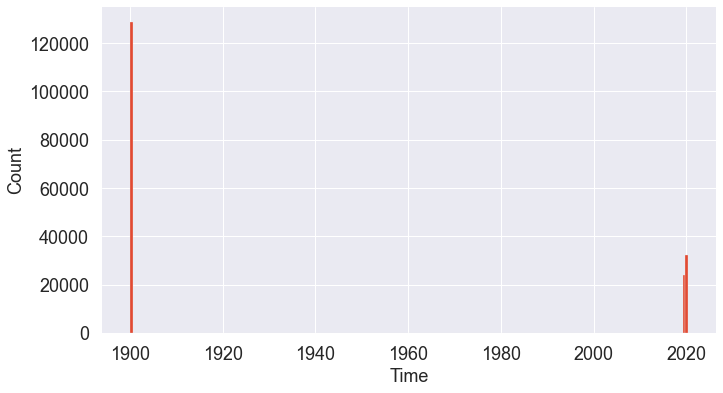

In [95]:
df.kuendigungs_eingangs_datum.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

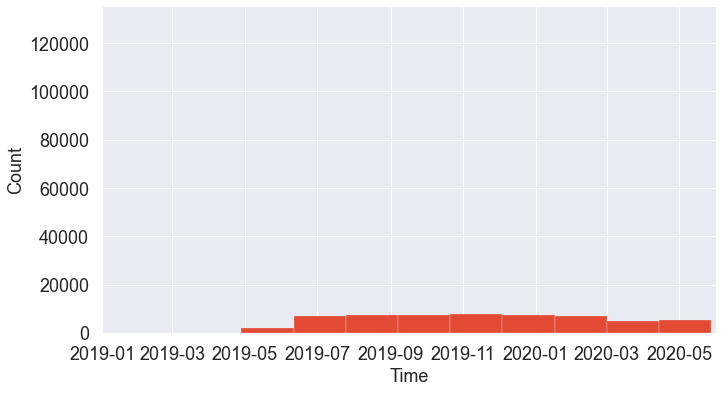

In [96]:
df.kuendigungs_eingangs_datum.hist(bins=1000,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');
plt.xlim('2019-01-01','2020-06-01');
#plt.ylim(0,10000)

#### Kündigungen 2020

In [97]:
kuendigungen_2020 = df[df['kuendigungs_eingangs_datum'] > '2020-01-01']
kuendigungen_2020.shape

(20644, 169)

In [98]:
df['kuendigungs_eingangs_datum'][0]

Timestamp('1900-01-01 00:00:00')

In [99]:
kuendigungen_2020.kuendigungs_eingangs_datum.max()

Timestamp('2020-05-28 00:00:00')

In [100]:
kuendigungen_2020.kuendigungs_eingangs_datum.head()

34    2020-01-08
76    2020-05-16
97    2020-02-18
98    2020-02-21
123   2020-05-01
Name: kuendigungs_eingangs_datum, dtype: datetime64[ns]

In [101]:
kuendigungen_2020 = kuendigungen_2020.sort_values(by="kuendigungs_eingangs_datum",ascending=True)

In [102]:
#kuendigungen_2020.head(2)

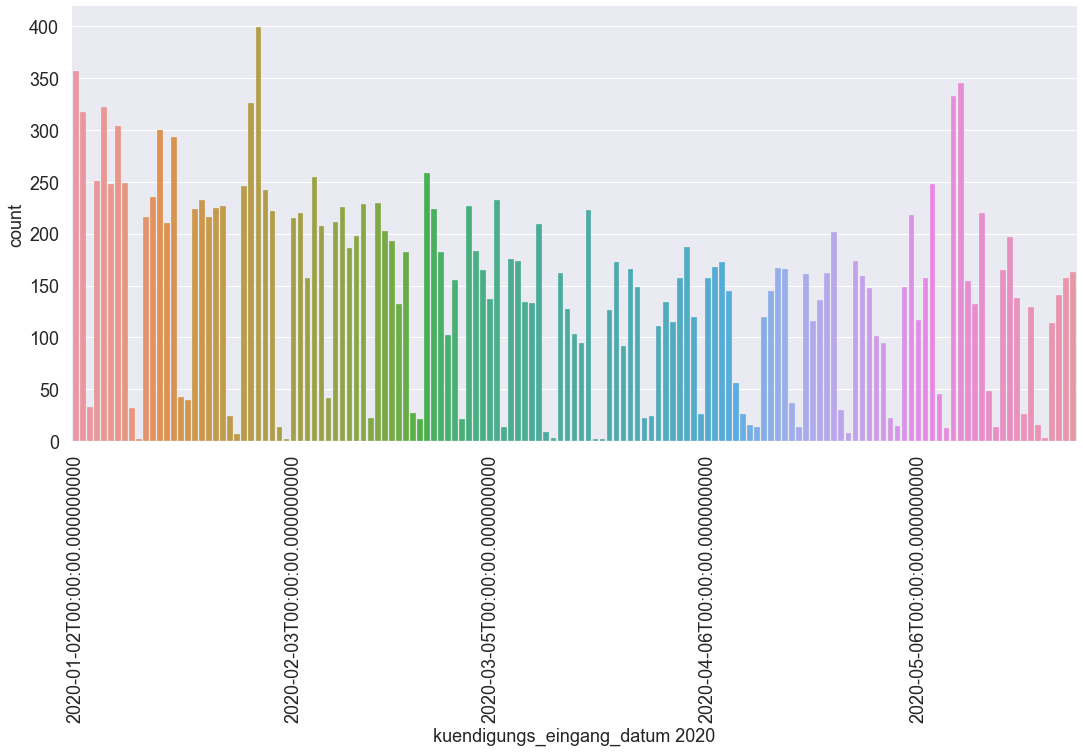

In [103]:
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(18,8))

sns.countplot(kuendigungen_2020['kuendigungs_eingangs_datum']);
plt.xticks(rotation=90);
plt.xlabel('kuendigungs_eingang_datum 2020')

months = MonthLocator()
monthsFmt = DateFormatter("%b")

years = YearLocator()
yearsFmt = DateFormatter("%y")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsFmt)

#### Kündigungen 2019

In [104]:
kuendigungen_2019 = df[(df['kuendigungs_eingangs_datum'] < '2020-01-01') & (df['kuendigungs_eingangs_datum'] > '2019-01-01')]
kuendigungen_2019.shape

(35336, 169)

In [105]:
kuendigungen_2019.kuendigungs_eingangs_datum.min()

Timestamp('2019-05-28 00:00:00')

In [106]:
kuendigungen_2019.kuendigungs_eingangs_datum.head()

37   2019-10-17
46   2019-09-27
51   2019-11-13
52   2019-11-13
62   2019-12-30
Name: kuendigungs_eingangs_datum, dtype: datetime64[ns]

In [107]:
kuendigungen_2019 = kuendigungen_2019.sort_values(by="kuendigungs_eingangs_datum",ascending=True)

In [108]:
#kuendigungen_2019.head(2)

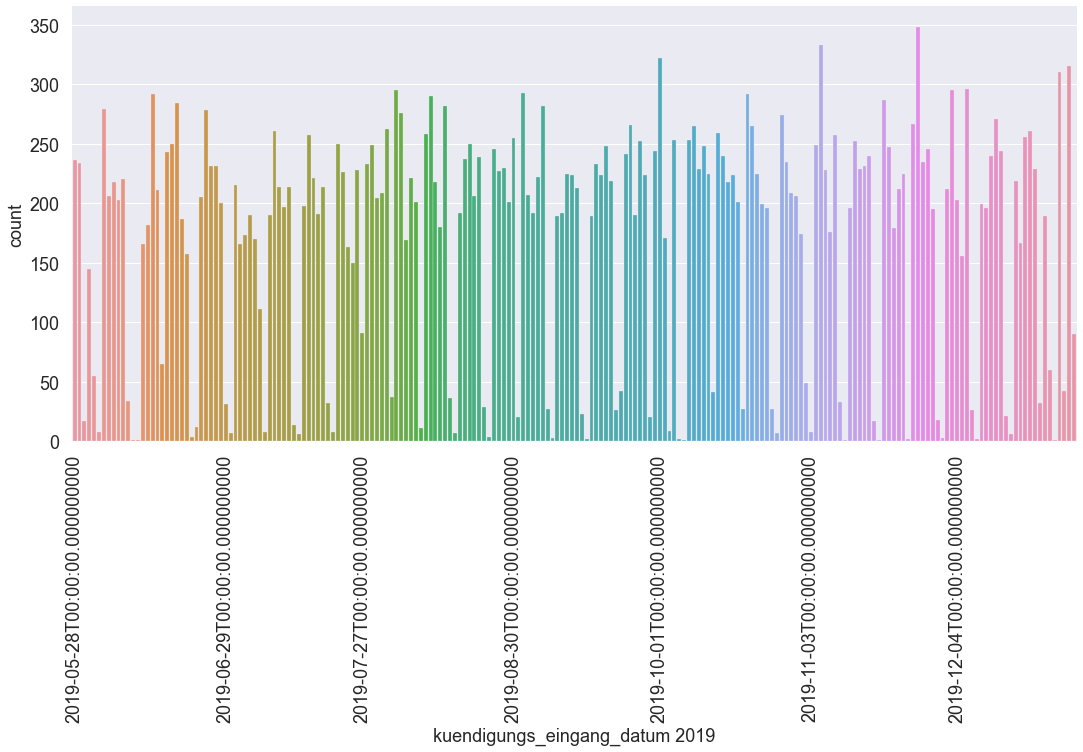

In [109]:
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(18,8))

ax = sns.countplot(kuendigungen_2019['kuendigungs_eingangs_datum']);
plt.xticks(rotation=90);
plt.xlabel('kuendigungs_eingang_datum 2019')

months = MonthLocator()
monthsFmt = DateFormatter("%m-%d")

years = YearLocator()
yearsFmt = DateFormatter("%y")

#ax.xaxis.set_major_formatter(monthsFmt)
#ax.xaxis.set_major_locator(months)

date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#ax.set_xlim(pd.datetime.strptime(startDate,'%Y-%m-%d'),pd.datetime.strptime(stopDate,'%Y-%m-%d'))

### Time relation between kuendigungs_eingangs_datum und lieferstart

In [110]:
df_churn = df.query('churn == 1')

In [111]:
df_churn['delivery_to_churn'] = df_churn['kuendigungs_eingangs_datum'] - df_churn['liefer_beginn_evt']

In [112]:
#df_churn.head(2)

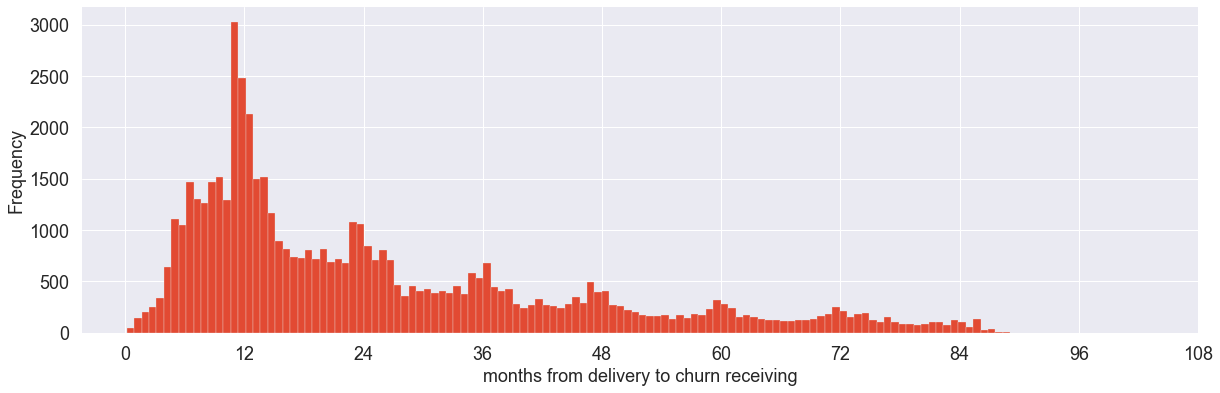

In [113]:
df_churn['delivery_to_churn'].astype('timedelta64[s]').div(2592000).plot.hist(bins=120,figsize=(20,6));
plt.xlabel('months from delivery to churn receiving');
plt.xticks(np.arange(0,120,12));

In [114]:
df_churn['delivery_to_churn'].astype('timedelta64[s]').div(2592000).max()

89.83333333333333

In [115]:
df_churn['delivery_to_churn'] = df_churn['delivery_to_churn'].astype('timedelta64[s]').div(2592000)

In [116]:
df_churn['delivery_to_churn'].head(2)

34    67.4
37    62.3
Name: delivery_to_churn, dtype: float64

In [117]:
months_bins = np.arange(0, 90.5, 0.5)

In [118]:
months_bin_series = pd.cut(df_churn['delivery_to_churn'], bins=months_bins, labels=months_bins[:-1])
months_bin_series.name = 'months_bins_2m'
df_churn['months_bins_2m'] = months_bin_series

In [119]:
#df_churn.head(2)

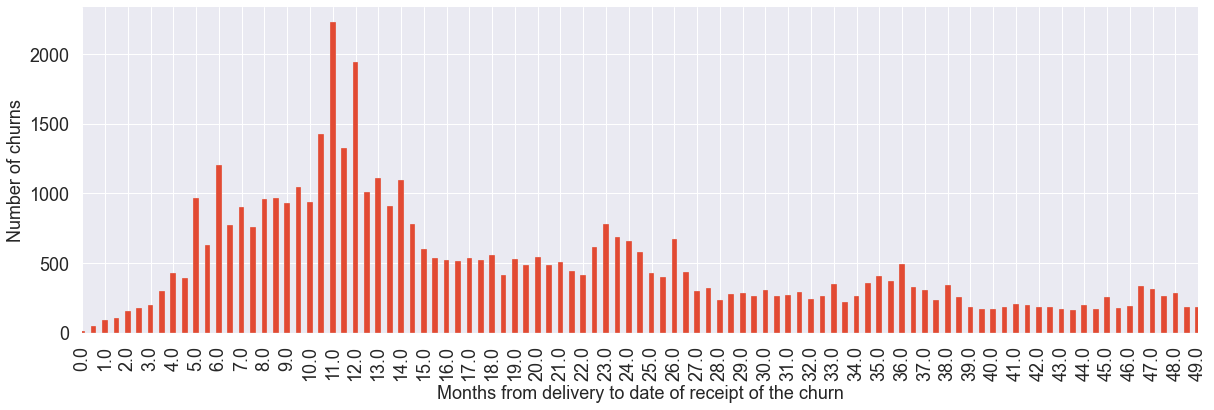

In [120]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(11,16))
df_churn.groupby('months_bins_2m').count()['churn'].plot(kind='bar',figsize=(20,6))
x_ticks = np.arange(0, 120, 2);
plt.xticks(x_ticks);
plt.xlim(0,98);
plt.ylabel('Number of churns');
plt.xlabel('Months from delivery to date of receipt of the churn');

#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

### Time Relation between kuendigungs_eingangs_datum and nl_registrierung_min

In [121]:
df_churn['nl_start_to_churn'] = df_churn['kuendigungs_eingangs_datum'] - df_churn['nl_registrierung_min']

In [122]:
#df_churn.head(2)

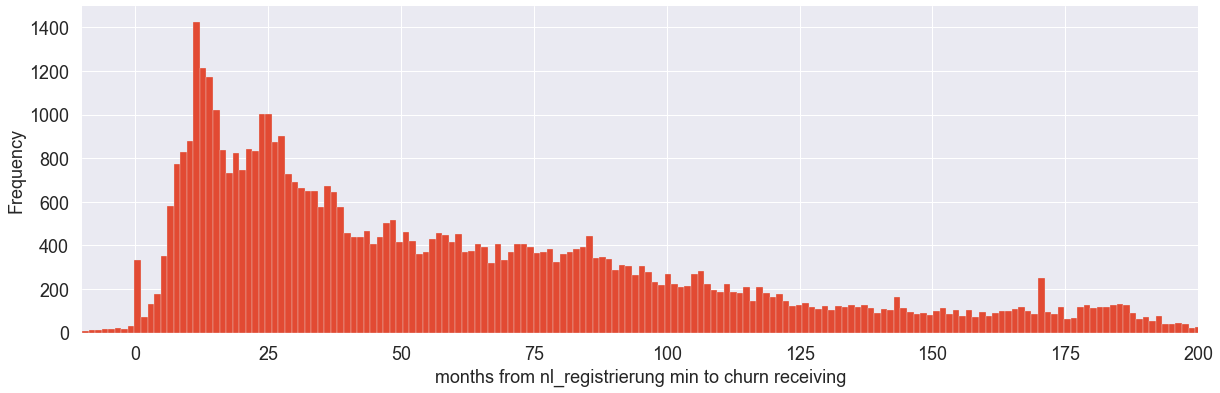

In [123]:
df_churn['nl_start_to_churn'].astype('timedelta64[s]').div(2592000).plot.hist(bins=1200,figsize=(20,6));
plt.xlabel('months from nl_registrierung min to churn receiving');
plt.xlim(-10,200);

In [124]:
df_churn['nl_start_to_churn'] = df_churn['nl_start_to_churn'].astype('timedelta64[s]').div(2592000)

In [125]:
df_churn['nl_start_to_churn'].head(2)

34    181.320883
37    63.374726 
Name: nl_start_to_churn, dtype: float64

In [126]:
months_bins = np.arange(0, 90.5, 0.5)

In [127]:
nl_min_bins_series = pd.cut(df_churn['nl_start_to_churn'], bins=months_bins, labels=months_bins[:-1])
nl_min_bins_series.name = 'nl_min_bins_05m'
df_churn['nl_start_to_churn_bins_05m'] = nl_min_bins_series

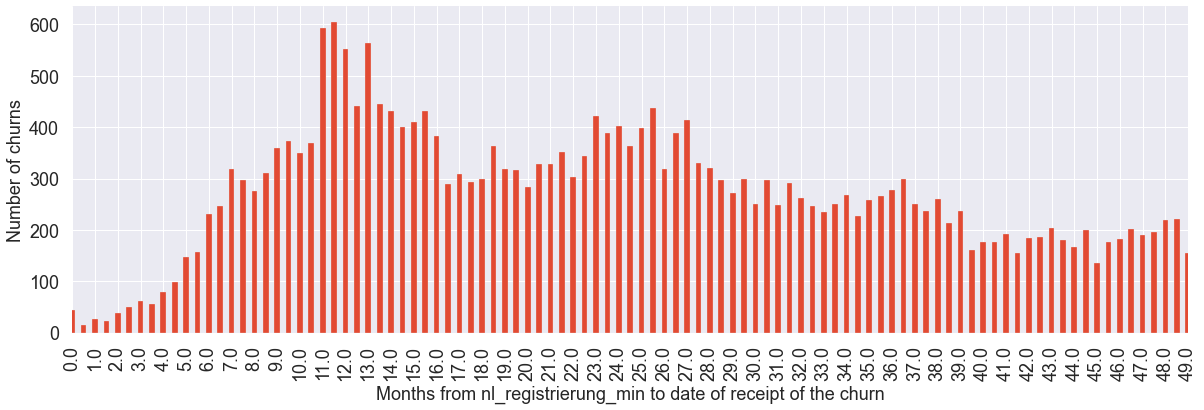

In [128]:
fig, ax = plt.subplots(figsize=(11,16))
df_churn.groupby('nl_start_to_churn_bins_05m').count()['churn'].plot(kind='bar',figsize=(20,6))
x_ticks = np.arange(0, 120, 2);
plt.xticks(x_ticks);
plt.xlim(0,98);
plt.ylabel('Number of churns');
plt.xlabel('Months from nl_registrierung_min to date of receipt of the churn');

### Summary Time/Temporal Features

To sum up the EDA on the temporal features, the following was found:

- **lesedauer:** The lesedauer is an important measure for the churn probability: keep feature
- **liefer_beginn_evt:** This feature can be kept, since all users have this feature included: keep feature
- **abo_registrierung_min:** Due to the huge amount of unknown time stamps, which are set to 1900-01-01, this feature can not be used: drop feature
- **nl_registrierung_min:** Large number of unknown data: drop feature
- **date_x:** Is a random date or the kuendigungs_eingangs_datum, since we have to drop the kuendigungs_eingangs_datum, since it is directly related to the churn. 
- **kuendigungs_eingangs_datum:** must be dropped, since it is directly related to the churn date. 

## Activity features

These features were we can see interactions and communicate with the customers.

- newsletter
- clickrates
- openrates
- community

In [129]:
index=0
for elem in df.columns:   
    print(f"{index} {elem}")
    index+=1

0 liefer_beginn_evt
1 kanal
2 objekt_name
3 aboform_name
4 zahlung_rhythmus_name
5 lesedauer
6 rechnungsmonat
7 zahlung_weg_name
8 studentenabo
9 plz_1
10 plz_2
11 plz_3
12 ort
13 metropole
14 land_iso_code
15 shop_kauf
16 unterbrechung
17 anrede
18 titel
19 avg_churn
20 email_am_kunden
21 zon_che_opt_in
22 zon_sit_opt_in
23 zon_zp_grey
24 zon_premium
25 zon_boa
26 zon_kommentar
27 zon_sonstige
28 zon_zp_red
29 zon_rawr
30 zon_community
31 zon_app_sonstige
32 zon_schach
33 zon_blog_kommentare
34 zon_quiz
35 cnt_abo
36 cnt_abo_diezeit
37 cnt_abo_diezeit_digital
38 cnt_abo_magazin
39 cnt_umwandlungsstatus2_dkey
40 abo_registrierung_min
41 nl_zeitbrief
42 nl_zeitshop
43 nl_zeitverlag_hamburg
44 nl_fdz_organisch
45 nl_blacklist_sum
46 nl_bounced_sum
47 nl_aktivitaet
48 nl_registrierung_min
49 nl_sperrliste_sum
50 nl_opt_in_sum
51 boa_reg
52 che_reg
53 sit_reg
54 sso_reg
55 received_anzahl_1w
56 received_anzahl_1m
57 received_anzahl_3m
58 received_anzahl_6m
59 opened_anzahl_1w
60 opened_anz

Create dataframes for differen activity features to plot and describe them one by one.

In [130]:
df_zon = df.iloc[::, 21:35]                # zones are special areas that need registration
df_cnt = df.iloc[::, 35:40]                # cnt is the number of subscribtions the contract holds (families, libaries etc.)
df_nl = df.iloc[::, 41:51]                 # newsletter drop technical details
df_nl.drop(["nl_blacklist_sum", "nl_bounced_sum", "nl_sperrliste_sum", "nl_opt_in_sum", "nl_fdz_organisch", "nl_registrierung_min"], axis=1, inplace=True)
df_reg = df.iloc[::, 51:55]                # registration needed (for accses to these services)
df_nl_interact = df.iloc[::, 55:77]        # newsletter interactions
df_nl_bestandskunden = df.iloc[::, 77:99]  # newsletter existing customers
df_nl_produktnews = df.iloc[::, 99:121]    # productnews (kind of newsletter but more commercial)
df_nl_hamburg = df.iloc[::, 121:143]       # newsletter region hamburg
df_zb = df.iloc[::, 143:165]               # zb = zeitbrief kind of letter

### zon features

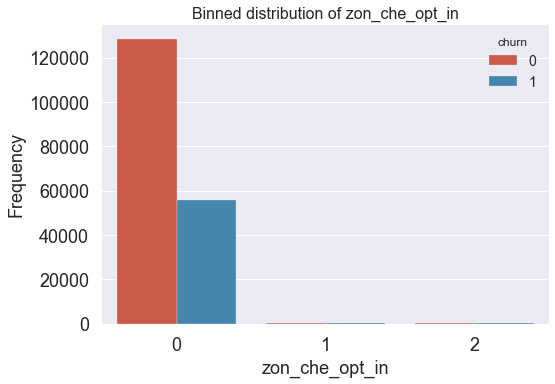

                   count  mean  std  min  25%  50%  75%  max
zon_che_opt_in  184660.0  0.0   0.1  0.0  0.0  0.0  0.0  2.0




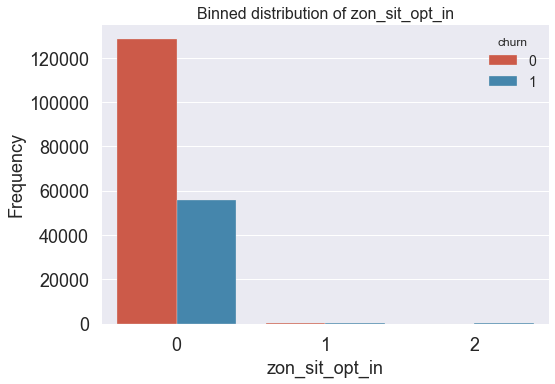

                   count  mean  std  min  25%  50%  75%  max
zon_sit_opt_in  184660.0  0.0   0.0  0.0  0.0  0.0  0.0  2.0




In [131]:
for elem in df_zon.columns[:2]:
    describe_frame = pd.DataFrame(round(df[elem].describe(),1))
    ax = sns.countplot(x=elem, data=df, hue="churn")
    ax.set(xlabel=elem, ylabel="Frequency", xlim=[-0.5, 2.5])
    plt.title(f"Binned distribution of {elem}")
    plt.show()
    print(describe_frame.T)
    print("\n")

zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  zon_premium  \
zon_che_opt_in       1.00           -0.00           -0.01        -0.00          
zon_sit_opt_in      -0.00            1.00           -0.00        -0.01          
zon_zp_grey         -0.01           -0.00            1.00        -0.10          
zon_premium         -0.00           -0.01           -0.10         1.00          
zon_boa             -0.00           -0.00           -0.02        -0.02          
zon_kommentar       -0.00           -0.00           -0.01        -0.01          
zon_sonstige        -0.00           -0.00           -0.05        -0.05          
zon_zp_red          -0.01           -0.00           -0.05        -0.05          
zon_rawr            -0.00           -0.00           -0.01        -0.01          
zon_community       -0.00           -0.00           -0.00        -0.00          
zon_app_sonstige    -0.00           -0.00           -0.01        -0.01          
zon_schach          -0.00           -0.00           -0.00        -0.01          
zon_blog_kommentare -0.00           -0.00           -0.00        -0.01          
zon_quiz            -0.00           -0.00           -0.00        -0.00          

                     zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  \
zon_che_opt_in      -0.00    -0.00          -0.00         -0.01         
zon_sit_opt_in      -0.00    -0.00          -0.00         -0.00         
zon_zp_grey         -0.02    -0.01          -0.05         -0.05         
zon_premium         -0.02    -0.01          -0.05         -0.05         
zon_boa              1.00    -0.00          -0.01         -0.01         
zon_kommentar       -0.00     1.00          -0.01         -0.00         
zon_sonstige        -0.01    -0.01           1.00         -0.03         
zon_zp_red          -0.01    -0.00          -0.03          1.00         
zon_rawr            -0.00    -0.00          -0.00         -0.00         
zon_community       -0.00    -0.00          -0.00         -0.00         
zon_app_sonstige    -0.00    -0.00          -0.00         -0.01         
zon_schach          -0.00    -0.00          -0.00         -0.00         
zon_blog_kommentare  0.00    -0.00          -0.00         -0.00         
zon_quiz            -0.00    -0.00          -0.00         -0.00         

                     zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
zon_che_opt_in      -0.00     -0.0           -0.00             -0.00         
zon_sit_opt_in      -0.00     -0.0           -0.00             -0.00         
zon_zp_grey         -0.01     -0.0           -0.01             -0.00         
zon_premium         -0.01     -0.0           -0.01             -0.01         
zon_boa             -0.00     -0.0           -0.00             -0.00         
zon_kommentar       -0.00     -0.0           -0.00             -0.00         
zon_sonstige        -0.00     -0.0           -0.00             -0.00         
zon_zp_red          -0.00     -0.0           -0.01             -0.00         
zon_rawr             1.00     -0.0           -0.00             -0.00         
zon_community       -0.00      1.0           -0.00             -0.00         
zon_app_sonstige    -0.00     -0.0            1.00             -0.00         
zon_schach          -0.00     -0.0           -0.00              1.00         
zon_blog_kommentare -0.00     -0.0           -0.00             -0.00         
zon_quiz            -0.00     -0.0           -0.00             -0.00         

                     zon_blog_kommentare  zon_quiz  
zon_che_opt_in      -0.00                -0.0       
zon_sit_opt_in      -0.00                -0.0       
zon_zp_grey         -0.00                -0.0       
zon_premium         -0.01                -0.0       
zon_boa              0.00                -0.0       
zon_kommentar       -0.00                -0.0       
zon_sonstige        -0.00                -0.0       
zon_zp_red          -0.00                -0.0       
zon_rawr            -0.00                -0.0       
zon_comm

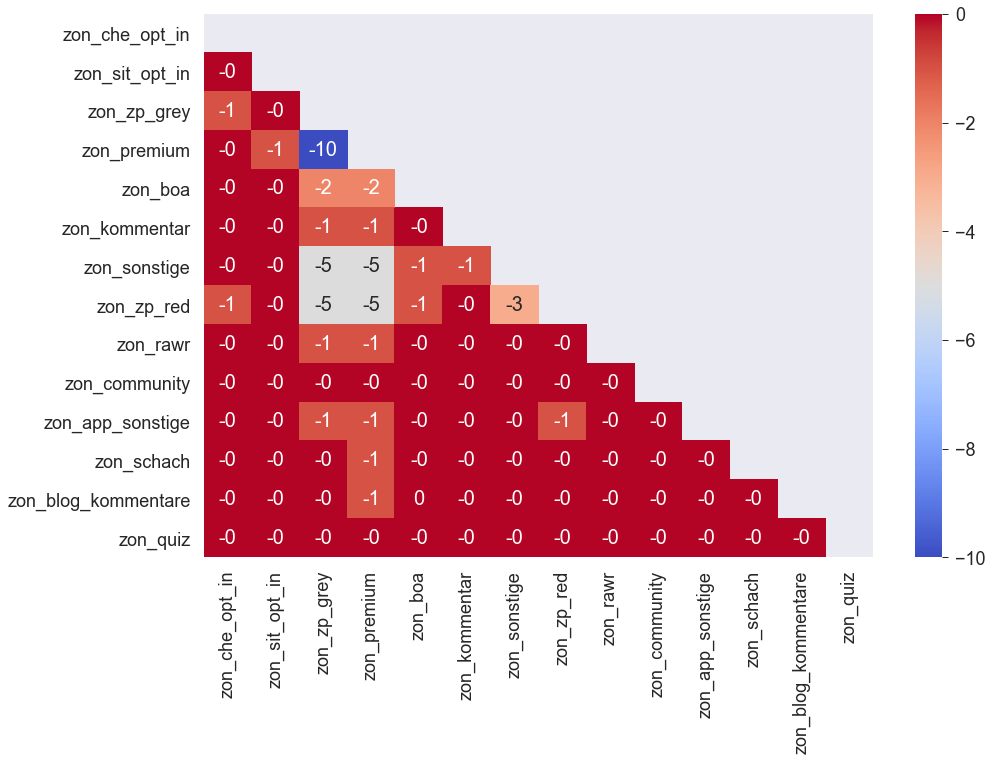

In [132]:
eda.correlogram(df_zon)

**Observation:** All the features in the list have a range between 0 and 2. 0 is a code for no interactions, 1 describes "registration startetd", 2 is "registration completetd". As you can see in the plots before these comments, the rates of customers to even register or complet register is very low. The correlogram(df_zon) showed no mentionable correlations (rounded values -1 or 0).

### cnt features

In [133]:
df_cnt.sample(5)

cnt_abo  cnt_abo_diezeit  cnt_abo_diezeit_digital  cnt_abo_magazin  \
1438    0        0                0                        0                 
16878   0        0                0                        0                 
154552  1        1                0                        0                 
88917   1        1                0                        0                 
54444   0        0                0                        0                 

        cnt_umwandlungsstatus2_dkey  
1438    0                            
16878   0                            
154552  1                            
88917   1                            
54444   0

cnt_abo  cnt_abo_diezeit  \
cnt_abo                      1.00     0.88              
cnt_abo_diezeit              0.88     1.00              
cnt_abo_diezeit_digital      0.35     0.06              
cnt_abo_magazin              0.49     0.18              
cnt_umwandlungsstatus2_dkey  0.68     0.52              

                             cnt_abo_diezeit_digital  cnt_abo_magazin  \
cnt_abo                      0.35                     0.49              
cnt_abo_diezeit              0.06                     0.18              
cnt_abo_diezeit_digital      1.00                     0.02              
cnt_abo_magazin              0.02                     1.00              
cnt_umwandlungsstatus2_dkey  0.26                     0.48              

                             cnt_umwandlungsstatus2_dkey  
cnt_abo                      0.68                         
cnt_abo_diezeit              0.52                         
cnt_abo_diezeit_digital      0.26                         
cnt_abo_magazin              0.48                         
cnt_umwandlungsstatus2_dkey  1.00

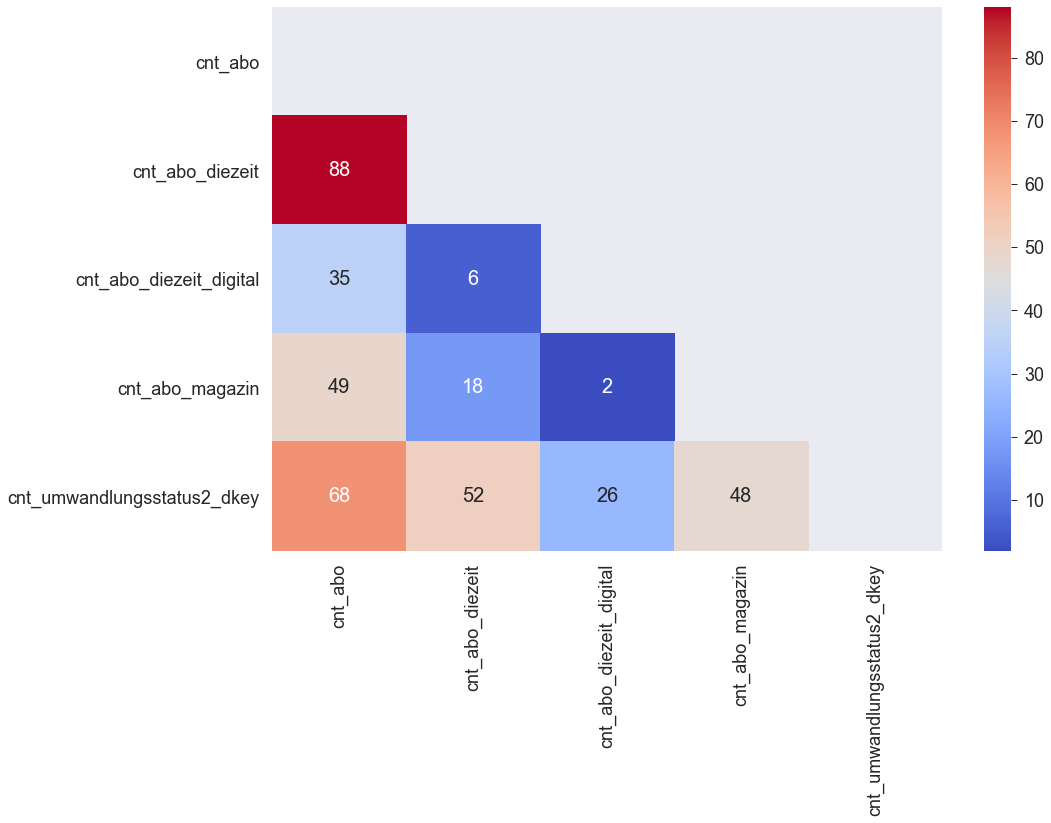

In [134]:
eda.correlogram(df_cnt)

**Observation:** The cnt features contain information of how many and which subscribtion types are held by the "auftrag_new_id". As we can see above, the column "cnt_abo" holds the sum of the other columns. The last colomn is holds information about how many of these are "conversion" by trial subscription. When we had a look at the correlogram(df_cnt) there were strong correlation. This is surprising cause the cnt_abo features are these that count the sum of abos a customers keeps. For example if one person has more than one newspaper, or a newspaper and a magazin, or newspaper print and digital. For more information about the subscription types check the [wiki: Business understanding](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/wiki/Business-understanding-(publishing-and-news)).


### reg features

In [135]:
df_reg.boa_reg.value_counts()

0    170395
1    14265 
Name: boa_reg, dtype: int64

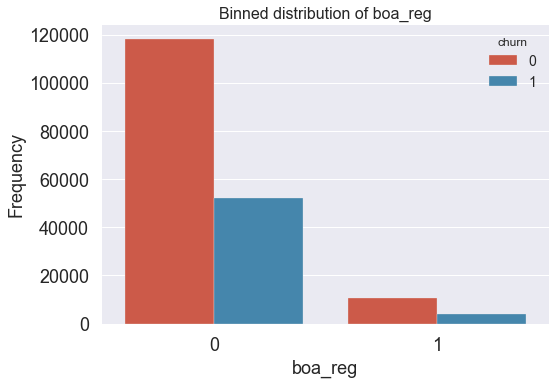

            count  mean  std  min  25%  50%  75%  max
boa_reg  184660.0  0.1   0.3  0.0  0.0  0.0  0.0  1.0




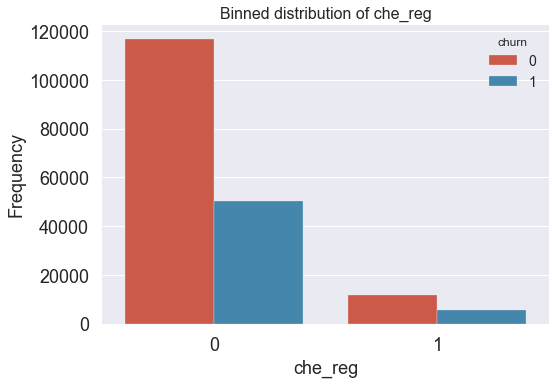

            count  mean  std  min  25%  50%  75%  max
che_reg  184660.0  0.1   0.3  0.0  0.0  0.0  0.0  1.0




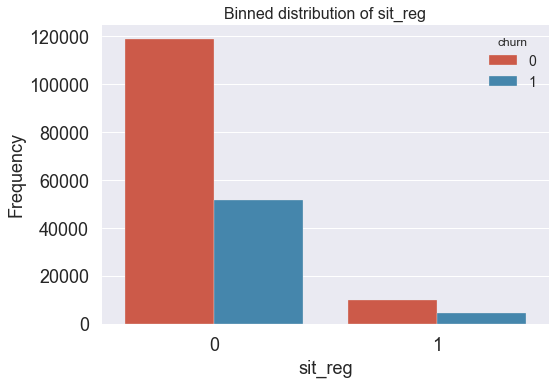

            count  mean  std  min  25%  50%  75%  max
sit_reg  184660.0  0.1   0.3  0.0  0.0  0.0  0.0  1.0




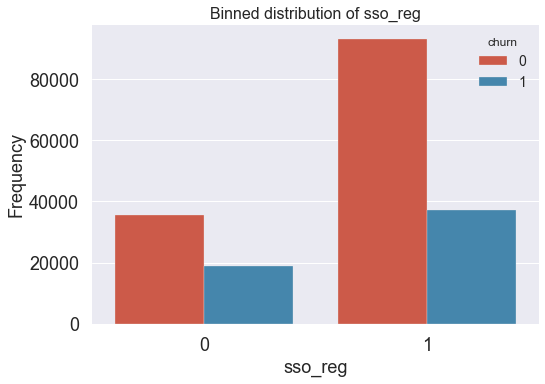

            count  mean  std  min  25%  50%  75%  max
sso_reg  184660.0  0.7   0.5  0.0  0.0  1.0  1.0  1.0




In [136]:
for elem in df_reg.columns:
    describe_frame = pd.DataFrame(round(df[elem].describe(),1))
    ax = sns.countplot(x=elem, data=df, hue="churn")
    ax.set(xlabel=elem, ylabel="Frequency", xlim=[-0.5, 1.5])
    plt.title(f"Binned distribution of {elem}")
    plt.show()
    print(describe_frame.T)
    print("\n")

boa_reg  che_reg  sit_reg  sso_reg
boa_reg  1.00     0.15     0.27     0.19   
che_reg  0.15     1.00     0.26     0.21   
sit_reg  0.27     0.26     1.00     0.19   
sso_reg  0.19     0.21     0.19     1.00

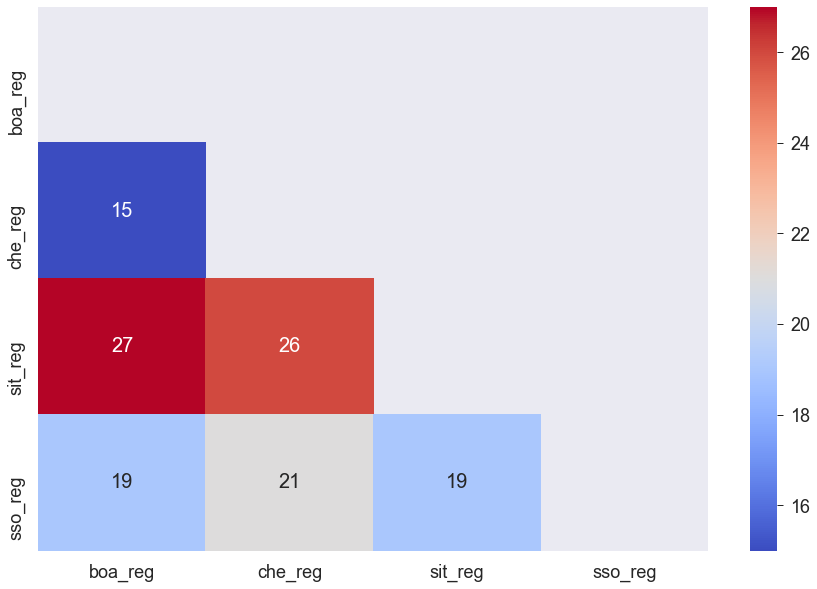

In [137]:
eda.correlogram(df_reg)

**Observations:** These features contain information, if clients have registred for special areas of the homepage. If it is 1 they have if not it is 0. As you can see most users, are not interessted in these areas and services. The restrictad hp areas (registration needed) show correlations between each other between 15 and 27.

### Customer Email
The feature email_am_kunden is a feature which shows if the email of an subscriber is known to the publisher.
* 0:not known
* 1:known

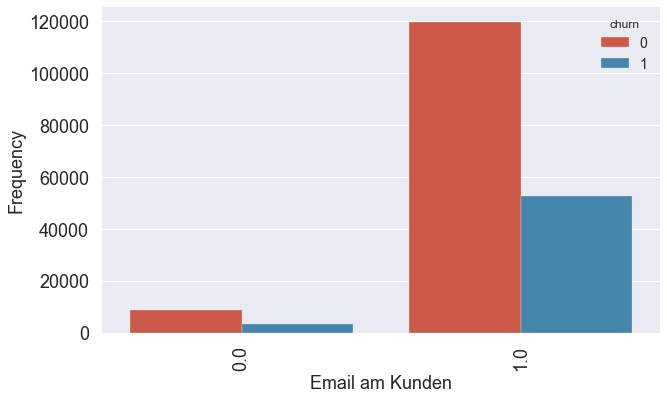

In [138]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='email_am_kunden', hue='churn', data=df)
ax.set(xlabel='Email am Kunden', ylabel='Frequency')
ax.set(ylim=(0, None))


ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

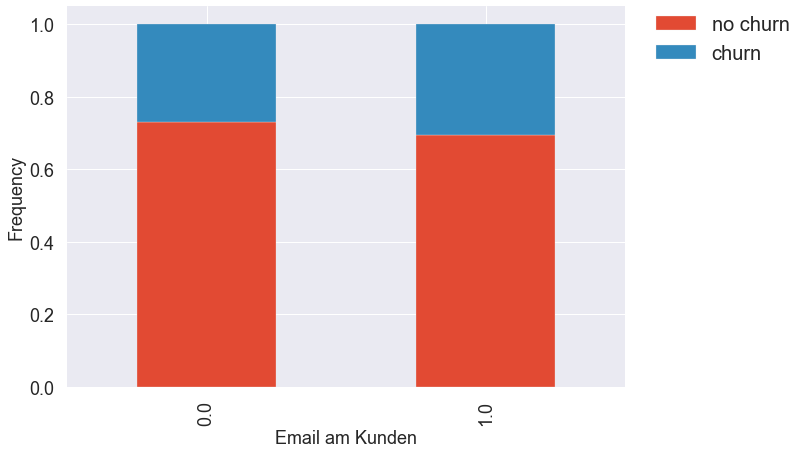

In [139]:
email_am_kunden_churn = crosstab_evaluation(df.email_am_kunden,df.churn)
crosstab_barplot(email_am_kunden_churn,['no churn','churn'],xlabelname='Email am Kunden')

In [140]:
df['email_am_kunden'].value_counts()/df.shape[0]

1.0    0.933705
0.0    0.066295
Name: email_am_kunden, dtype: float64

__Observations:__ 
* Only 6.4% of the mail adresses of all subscribers are unknown
* The relative churn rate is a little bit higher for subscibers with known email adresses, but not a big difference is visible

### Newsletter features

received_anzahl_1w  received_anzahl_1m  \
received_anzahl_1w      1.00                0.97                 
received_anzahl_1m      0.97                1.00                 
received_anzahl_3m      0.95                0.98                 
received_anzahl_6m      0.94                0.97                 
opened_anzahl_1w        0.58                0.57                 
opened_anzahl_1m        0.60                0.62                 
opened_anzahl_3m        0.59                0.61                 
openedanzahl_6m         0.58                0.60                 
clicked_anzahl_1w       0.26                0.25                 
clicked_anzahl_1m       0.32                0.33                 
clicked_anzahl_3m       0.33                0.33                 
clicked_anzahl_6m       0.32                0.33                 
unsubscribed_anzahl_1w -0.00                0.02                 
unsubscribed_anzahl_1m -0.00                0.02                 
unsubscribed_anzahl_3m -0.02               -0.01                 
unsubscribed_anzahl_6m -0.04               -0.04                 
openrate_1w             0.17                0.18                 
clickrate_1w            0.11                0.10                 
openrate_1m             0.18                0.18                 
clickrate_1m            0.09                0.10                 
openrate_3m             0.15                0.15                 
clickrate_3m            0.07                0.07                 

                        received_anzahl_3m  received_anzahl_6m  \
received_anzahl_1w      0.95                0.94                 
received_anzahl_1m      0.98                0.97                 
received_anzahl_3m      1.00                0.99                 
received_anzahl_6m      0.99                1.00                 
opened_anzahl_1w        0.56                0.55                 
opened_anzahl_1m        0.61                0.60                 
opened_anzahl_3m        0.62                0.61                 
openedanzahl_6m         0.62                0.62                 
clicked_anzahl_1w       0.24                0.23                 
clicked_anzahl_1m       0.32                0.31                 
clicked_anzahl_3m       0.33                0.33                 
clicked_anzahl_6m       0.33                0.33                 
unsubscribed_anzahl_1w  0.03                0.03                 
unsubscribed_anzahl_1m  0.03                0.03                 
unsubscribed_anzahl_3m  0.01                0.03                 
unsubscribed_anzahl_6m -0.02                0.01                 
openrate_1w             0.18                0.17                 
clickrate_1w            0.10                0.10                 
openrate_1m             0.18                0.18                 
clickrate_1m            0.09                0.09                 
openrate_3m             0.15                0.15                 
clickrate_3m            0.07                0.07                 

                        opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  \
received_anzahl_1w      0.58              0.60              0.59               
received_anzahl_1m      0.57              0.62              0.61               
received_anzahl_3m      0.56              0.61              0.62               
received_anzahl_6m      0.55              0.60              0.61               
opened_anzahl_1w        1.00              0.91              0.88               
opened_anzahl_1m        0.91              1.00              0.97               
opened_anzahl_3m        0.88              0.97              1.00               
openedanzahl_6m         0.86              0.94              0.98               
clicked_anzahl_1w       0.42              0.39              0.37               
clicked_anzahl_1m       0.47              0.50              0.48               
clicked_anzahl_3m       0.46              0.50              0.51               
clicked_anzahl_6m       0.

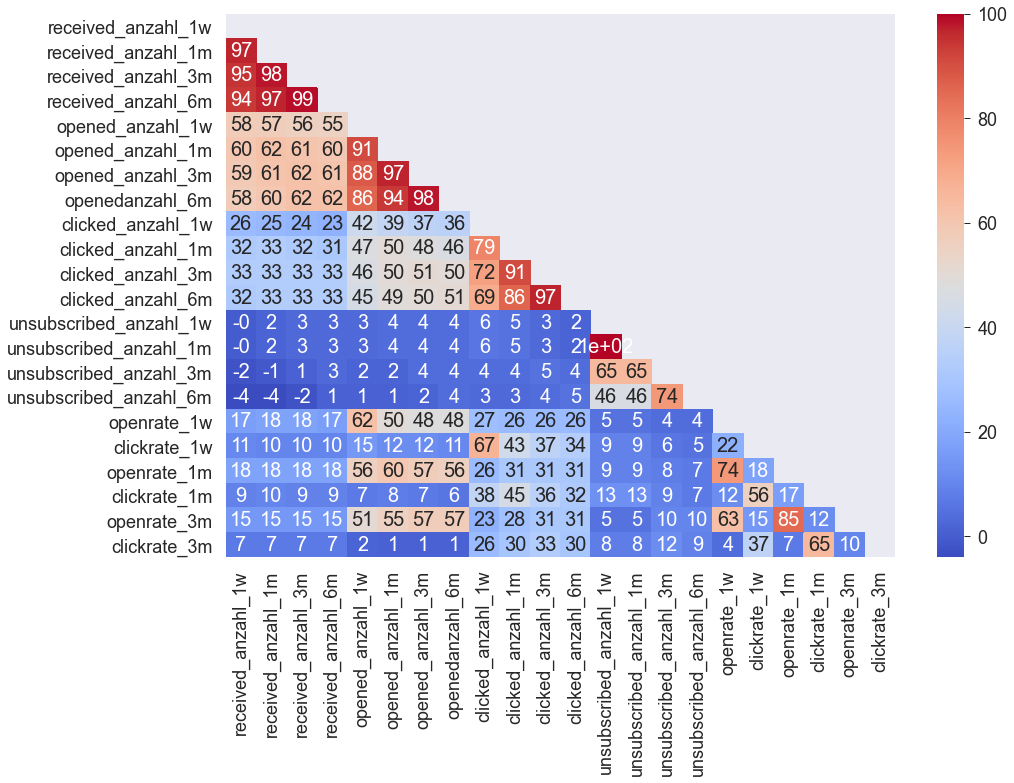

In [141]:
eda.correlogram(df_nl_interact)

**Observations:** df_nl the holds the four feature "nl_zeitbrief", "nl_zeitshop", "nl_zeitvrlag_hamburg" and "nl_aktivitaet". The only correlation is between "nl_aktivitaet" and "nl_zeitbrief". Altought this is not surprising, cause the feature "nl_aktivitaet" is an aggregation of user activity on the newsletters.

### Shop Kauf

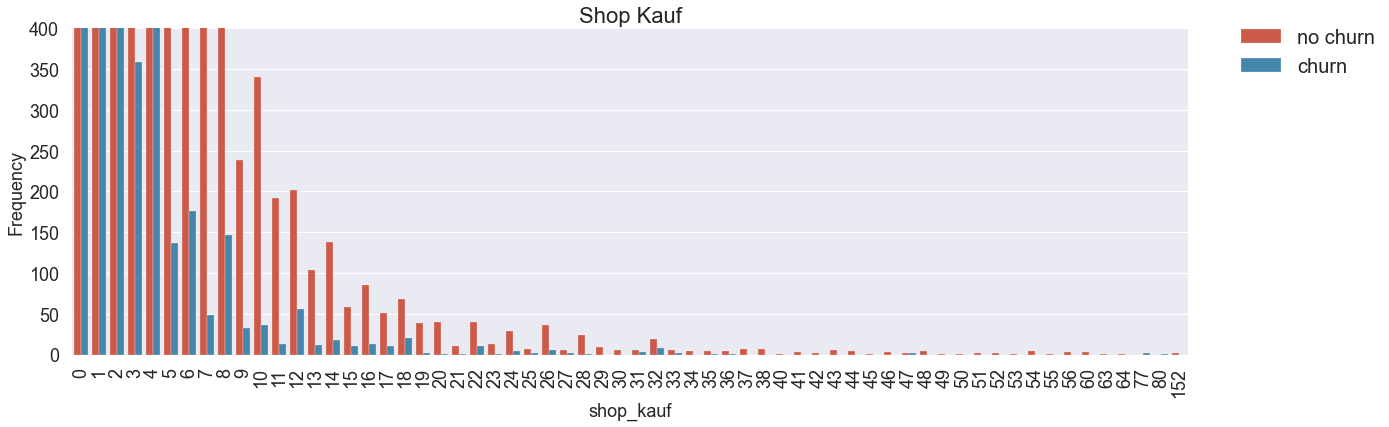

In [142]:
labellist = ['no churn','churn']

plt.subplots(figsize=(20,6))
ax = sns.countplot(x='shop_kauf', hue='churn', data=df)
ax.set(ylabel='Frequency')
ax.set(ylim=(0, 400))
plt.title('Shop Kauf', fontsize=22)
L=plt.legend(fontsize=20,loc=(1.04,0.83))
L.get_texts()[0].set_text(labellist[0])
L.get_texts()[1].set_text(labellist[1])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


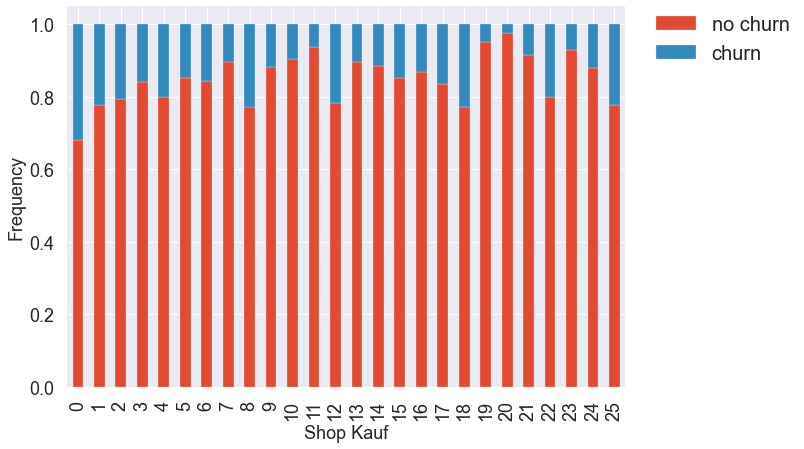

In [143]:
shop_churn = crosstab_evaluation(df.shop_kauf,df.churn)
crosstab_barplot(shop_churn,['no churn','churn'],xlabelname='Shop Kauf')
plt.xlim(-0.5,25.5);

### Newsletter
__Email-Newsletter:__ <br>
with: 0:not available, 1: unsubscribed, 2: active
* nl_zeitbrief 
* nl_zeitshop
* nl_zeitverlag_hamburg
* nl_fdz_organisch: on organic recipient list Loyaltyprogram fdZ
</p>
* Blacklist: Number of blacklist entries
* Bounced: Number of Bounces
* Aktivität: Number on how many newsletters in the house
* Sperrliste
</p>
* nl_opt_in_sum: Number of Optins

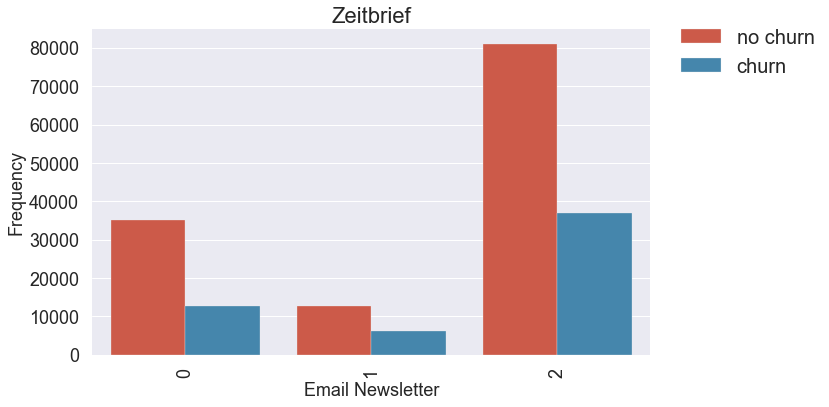

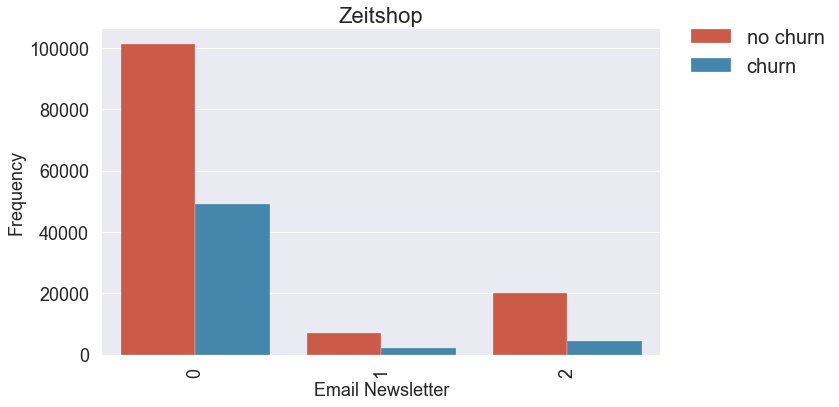

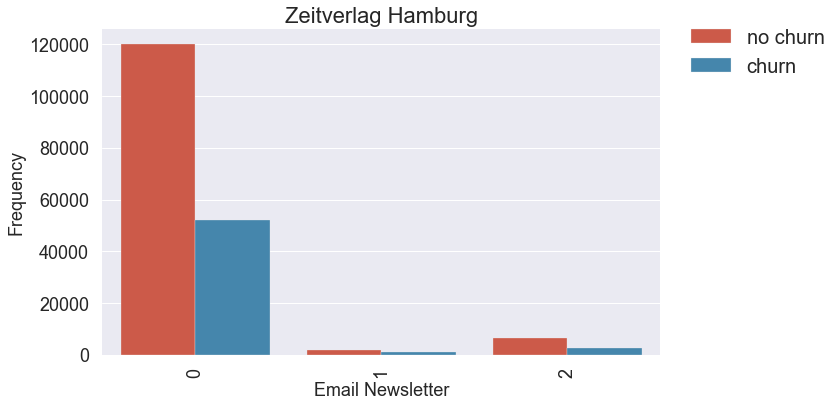

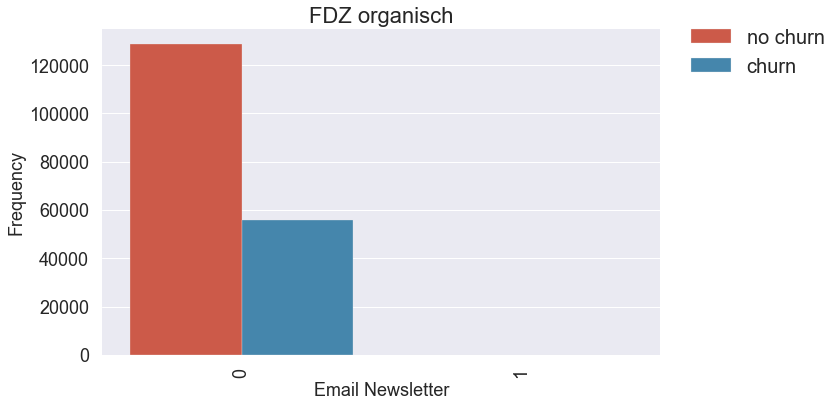

In [144]:
title = ['Zeitbrief', 'Zeitshop', "Zeitverlag Hamburg", 'FDZ organisch']
labellist = ['no churn','churn']

for i, nl in enumerate(['nl_zeitbrief', 'nl_zeitshop', 'nl_zeitverlag_hamburg', 'nl_fdz_organisch']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Email Newsletter', ylabel='Frequency')
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

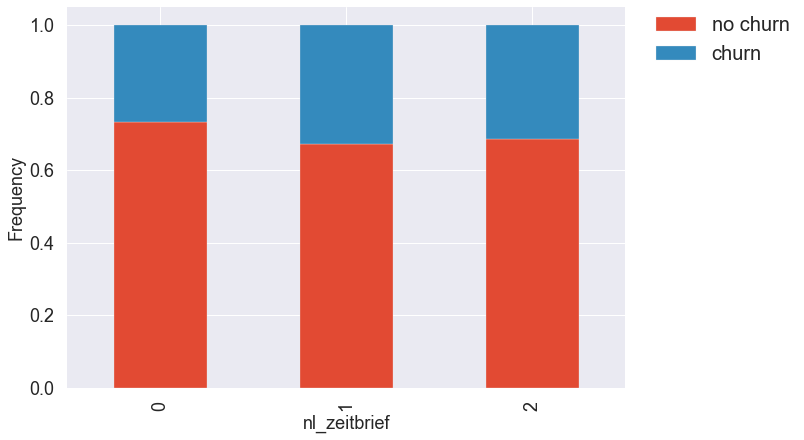

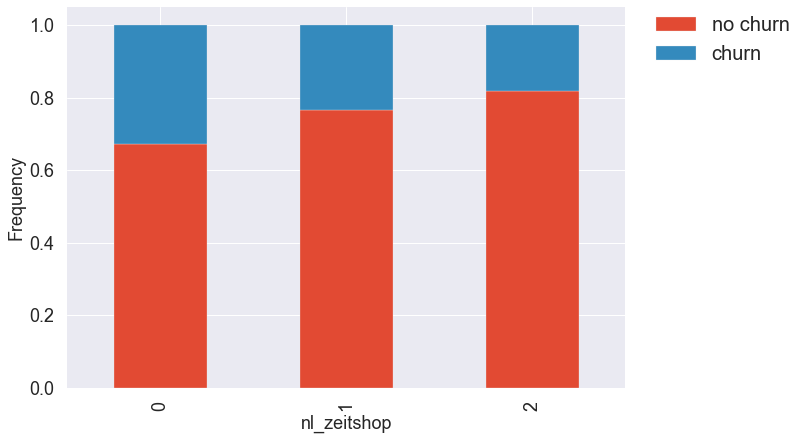

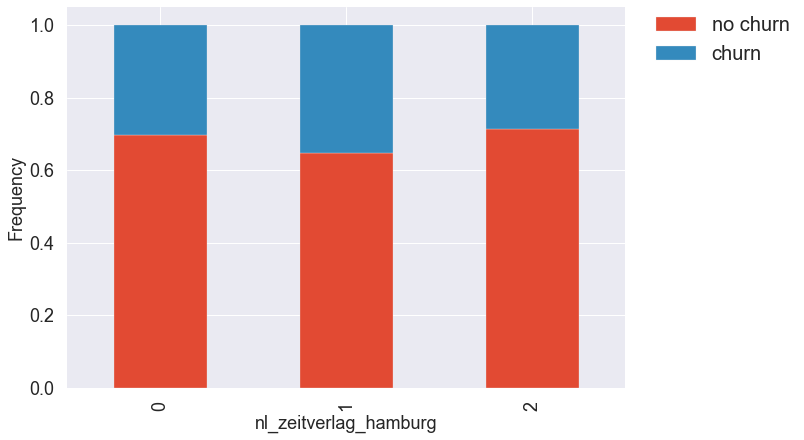

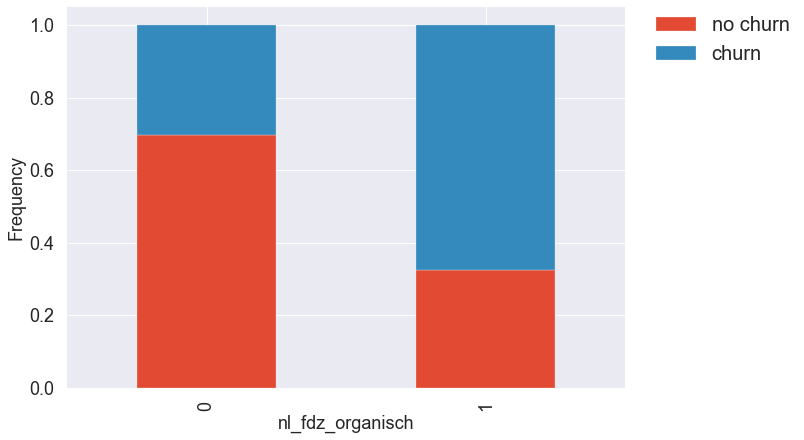

In [145]:
for i in ['nl_zeitbrief', 'nl_zeitshop', 'nl_zeitverlag_hamburg', 'nl_fdz_organisch']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

__Absolute Blacklist and Bounced__

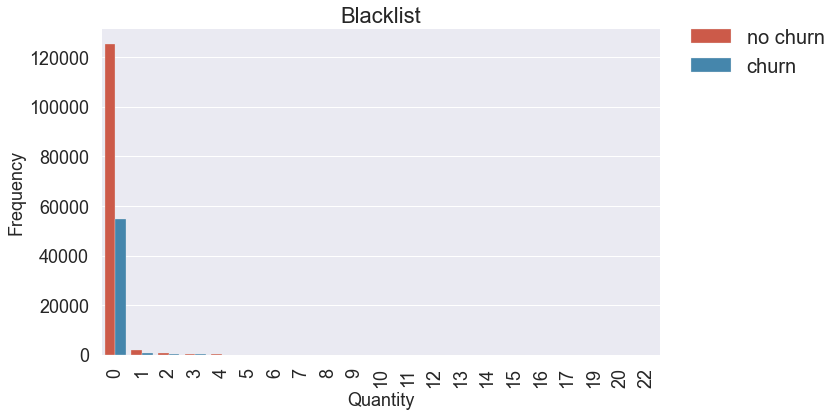

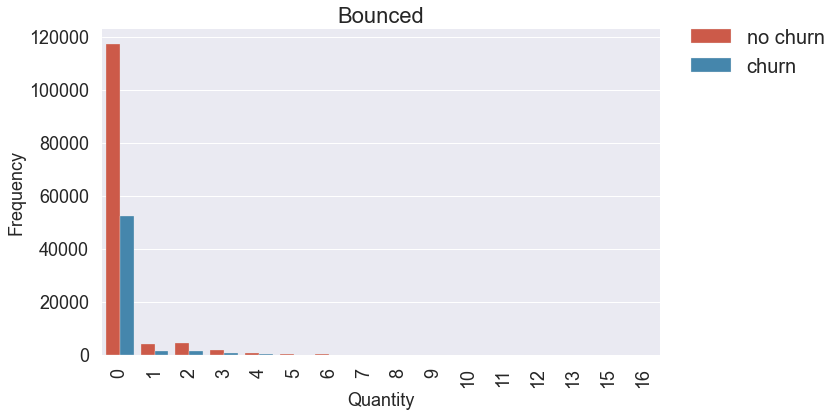

In [146]:
title = ['Blacklist', 'Bounced']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['nl_blacklist_sum', 'nl_bounced_sum']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

__Relative Blacklist and Bounced__

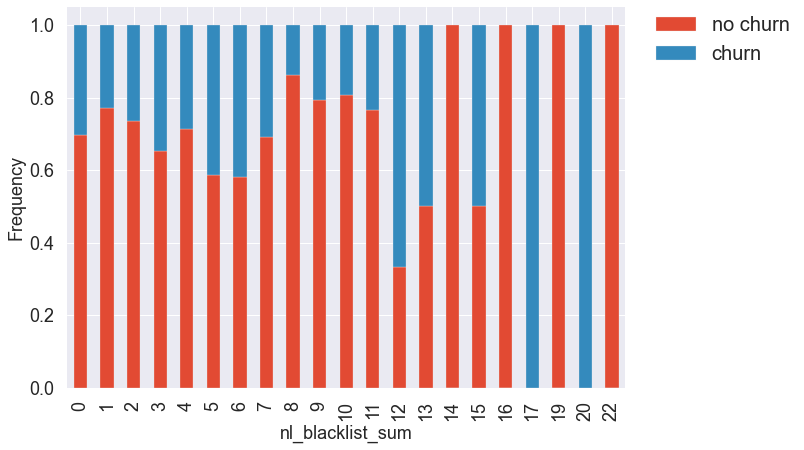

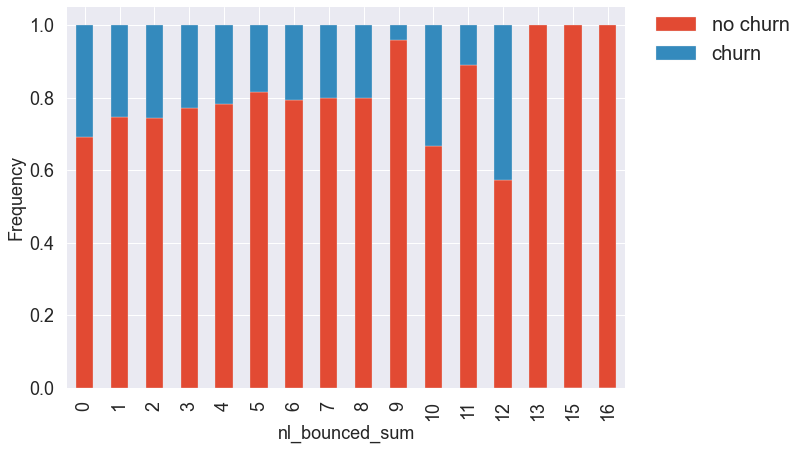

In [147]:
for i in ['nl_blacklist_sum', 'nl_bounced_sum']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

__Absolute NL Aktivitaet and Sperrliste__

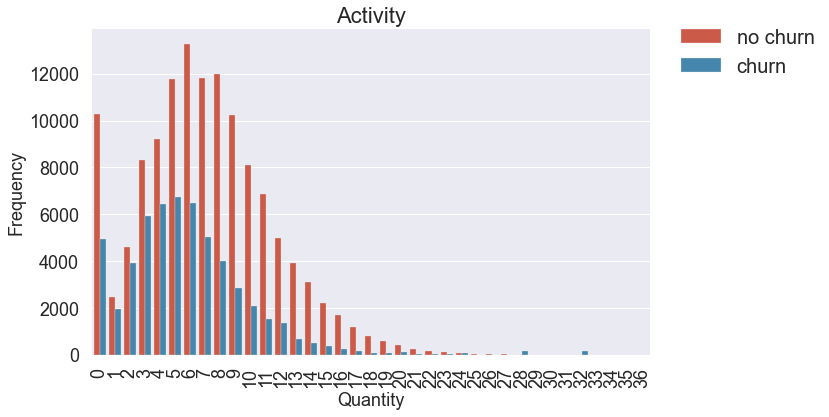

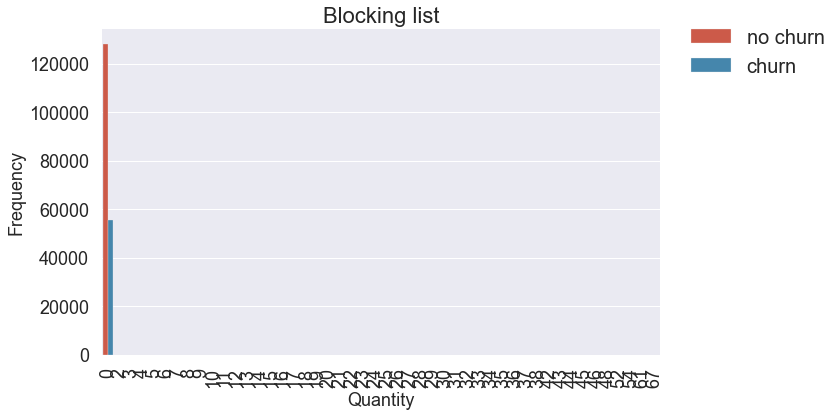

In [148]:
title = ['Activity', 'Blocking list']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['nl_aktivitaet', 'nl_sperrliste_sum']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

__Relative NL Aktivität and Sperrliste__

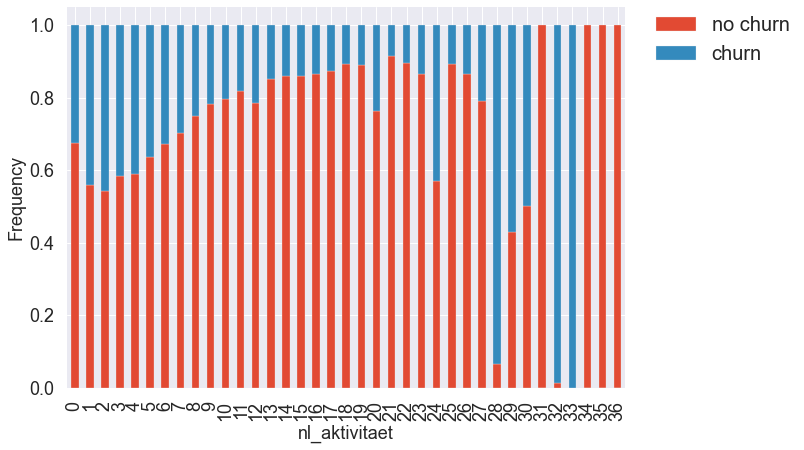

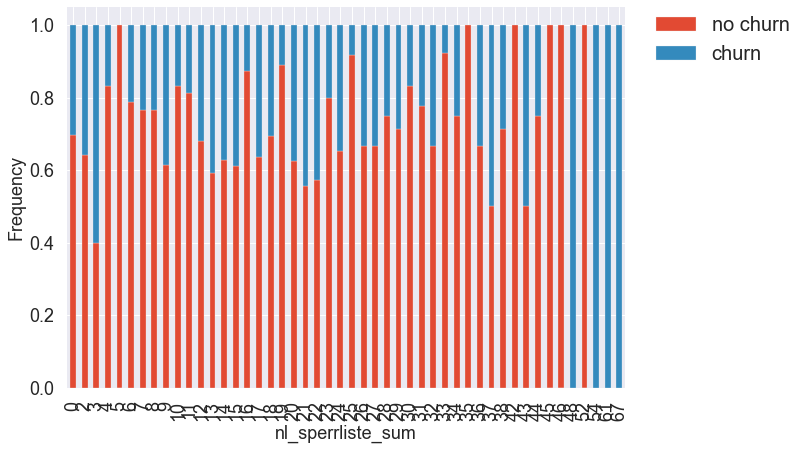

In [149]:
for i in ['nl_aktivitaet', 'nl_sperrliste_sum']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

__Absolute NL Optins__

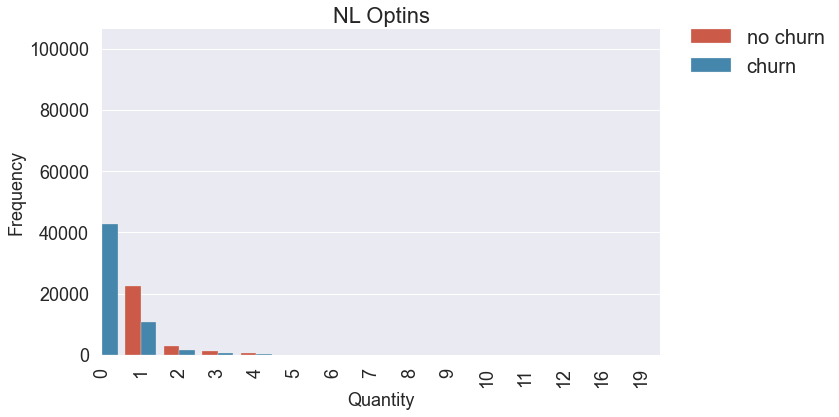

In [150]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df['nl_opt_in_sum'], hue='churn', data=df)
ax.set(xlabel='Quantity', ylabel='Frequency', xlim=[0,None])
plt.title('NL Optins', fontsize=22)
L=plt.legend(fontsize=20,loc=(1.04,0.83))
L.get_texts()[0].set_text(labellist[0])
L.get_texts()[1].set_text(labellist[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90); 

__Relative NL Optins__

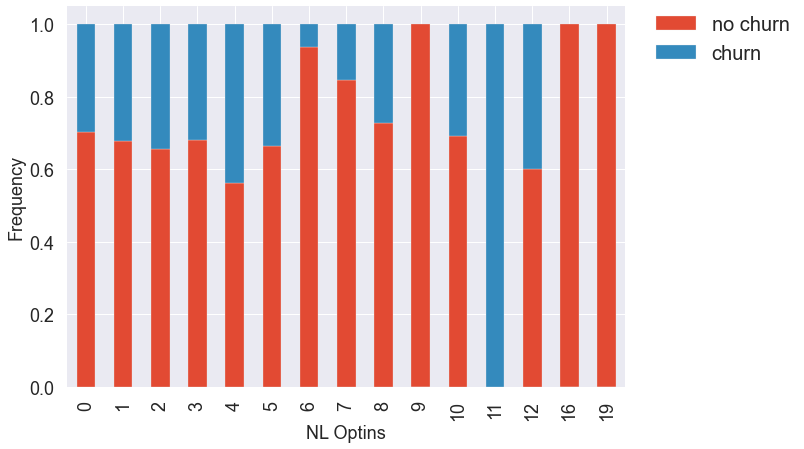

In [151]:
x = crosstab_evaluation(df['nl_opt_in_sum'],df.churn)
crosstab_barplot(x,['no churn','churn'],xlabelname='NL Optins')

#### Bestandskunden
* with received, opened, clicked, unsubscribed mails
* time period = 6m 

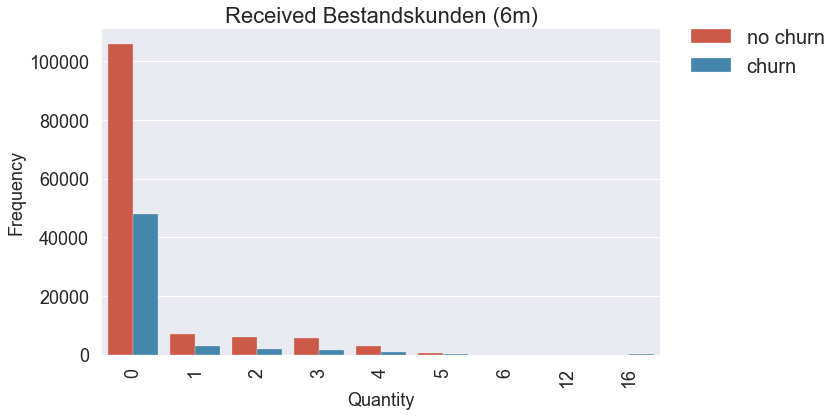

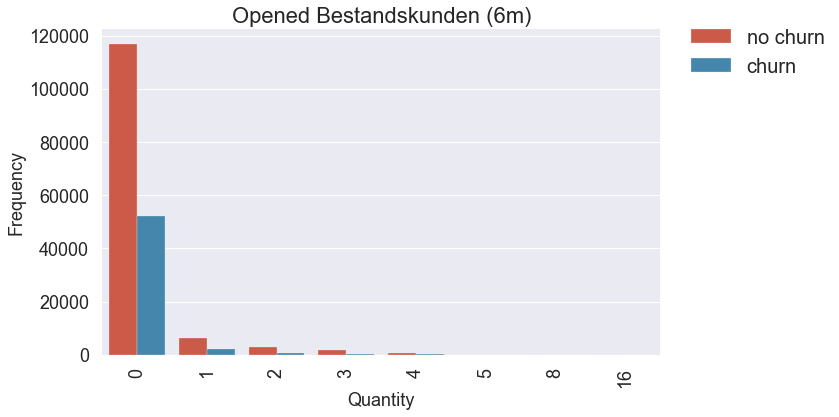

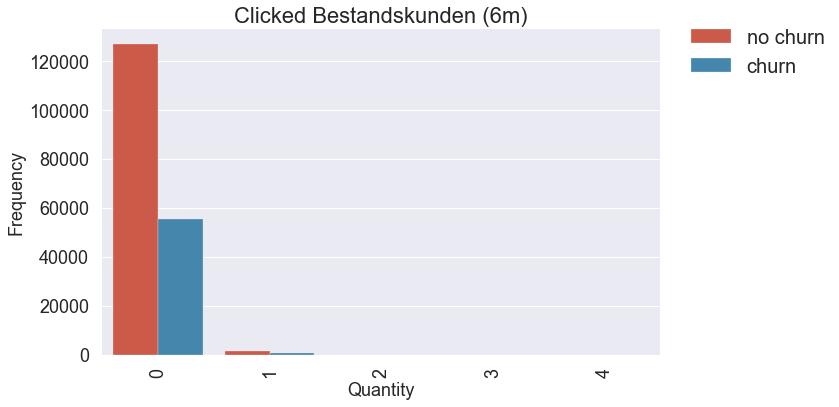

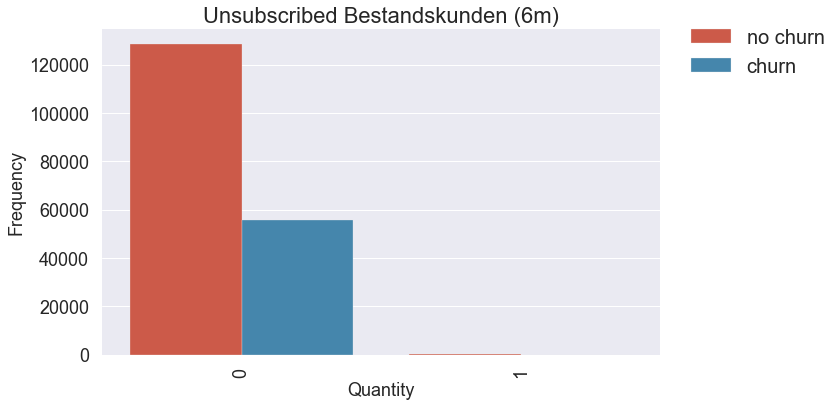

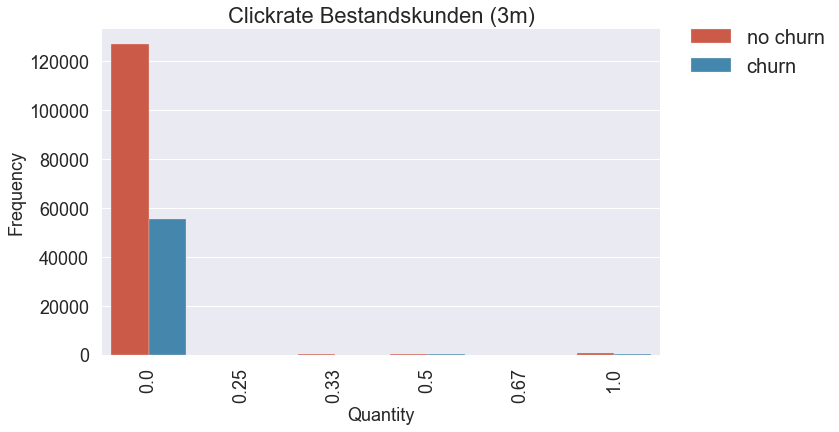

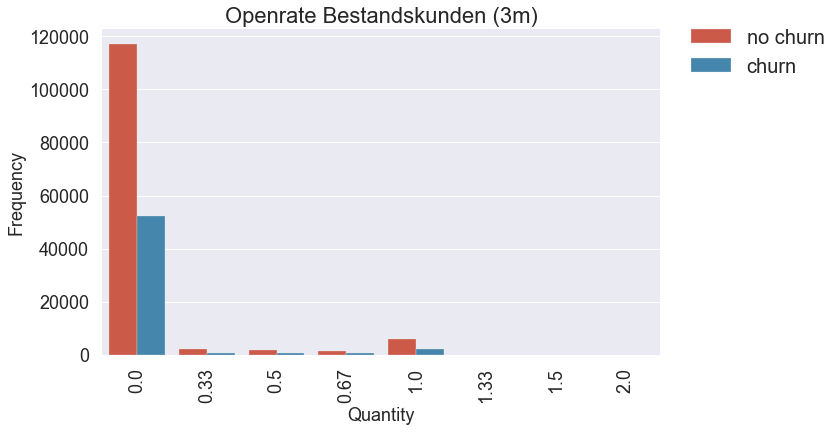

In [152]:
title = ['Received Bestandskunden (6m)', 'Opened Bestandskunden (6m)', 'Clicked Bestandskunden (6m)', 'Unsubscribed Bestandskunden (6m)', 'Clickrate Bestandskunden (3m)', 'Openrate Bestandskunden (3m)']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['received_anzahl_bestandskunden_6m', 'openedanzahl_bestandskunden_6m', 'clicked_anzahl_bestandskunden_6m', 'unsubscribed_anzahl_bestandskunden_6m', 'clickrate_bestandskunden_3m', 'openrate_bestandskunden_3m']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

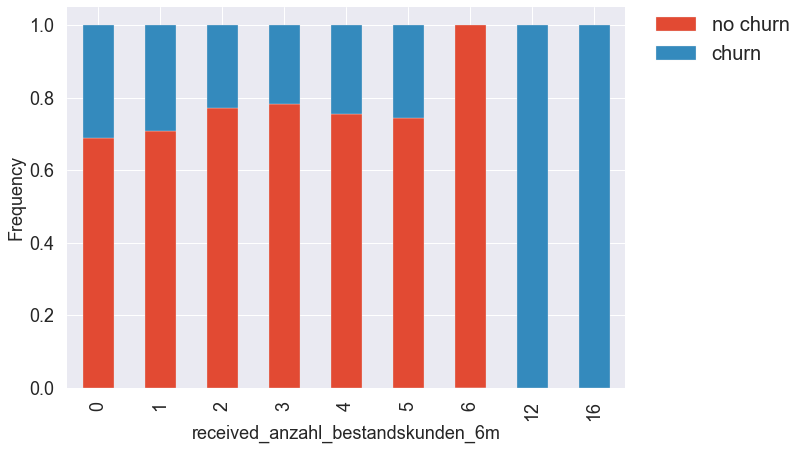

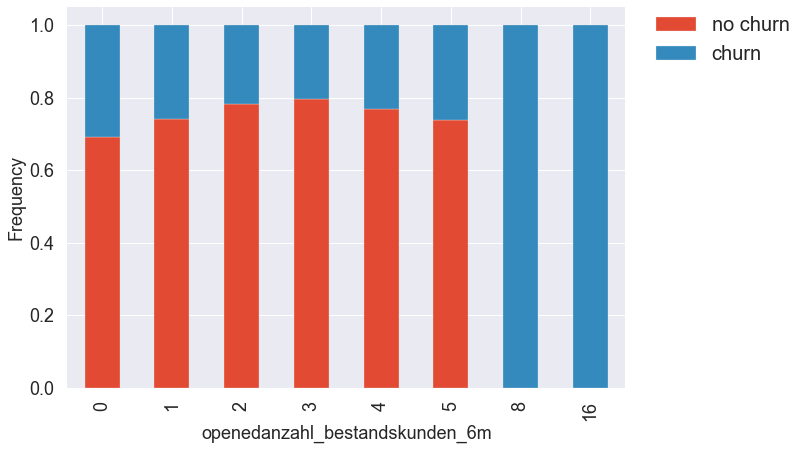

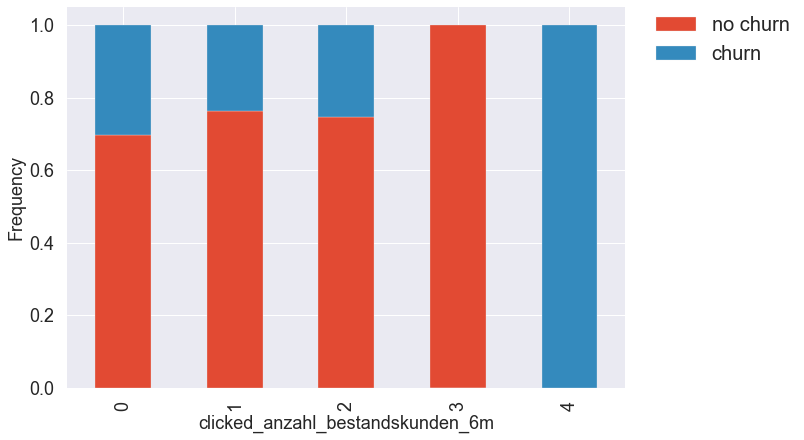

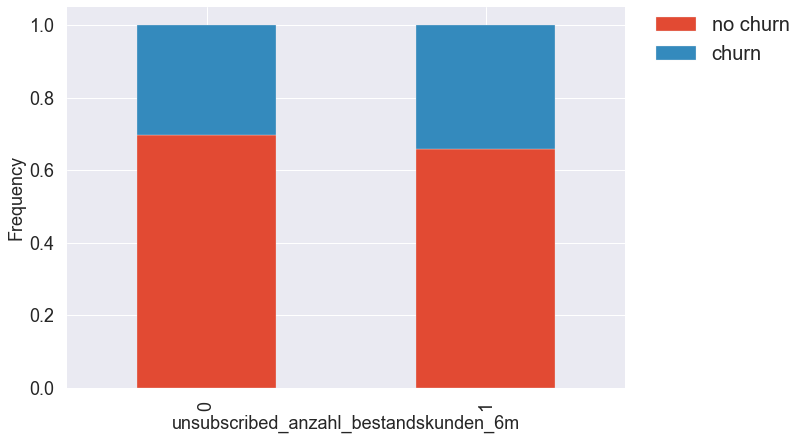

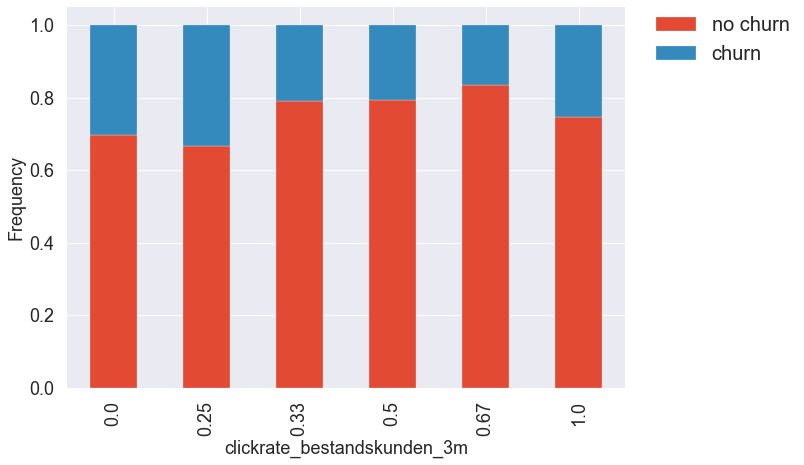

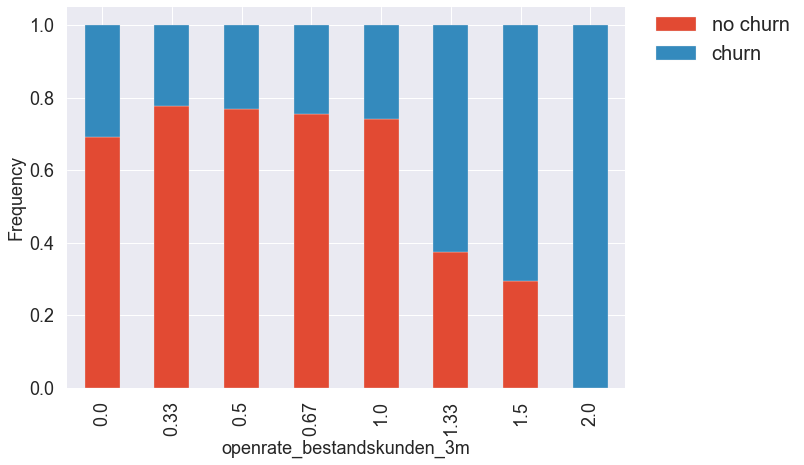

In [153]:
for i in ['received_anzahl_bestandskunden_6m', 'openedanzahl_bestandskunden_6m', 'clicked_anzahl_bestandskunden_6m', 'unsubscribed_anzahl_bestandskunden_6m', 'clickrate_bestandskunden_3m', 'openrate_bestandskunden_3m']:
    
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)
   

#### Produktnews
* with received, opened, clicked, unsubscribed mails
* time period = 6m 

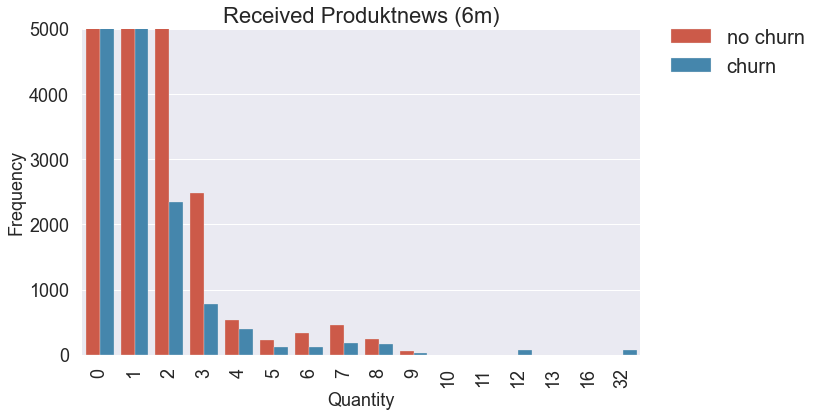

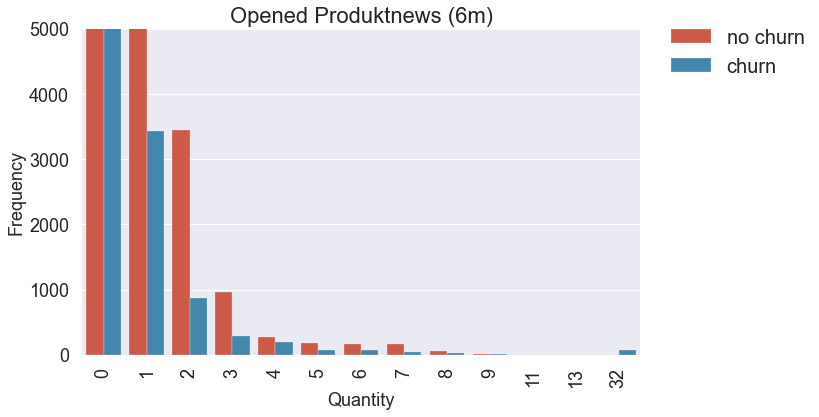

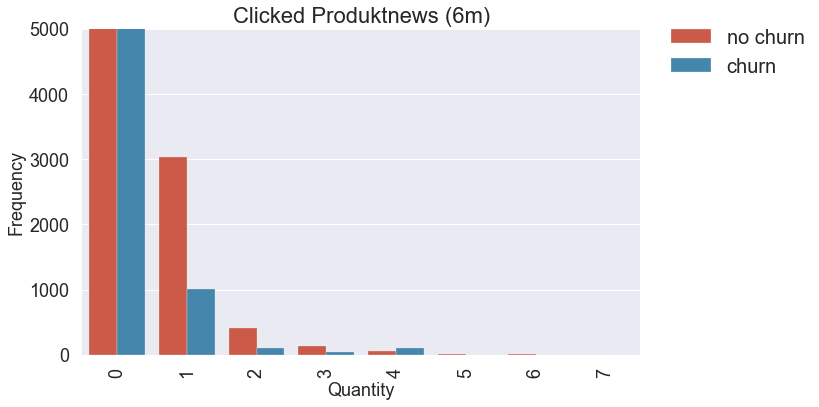

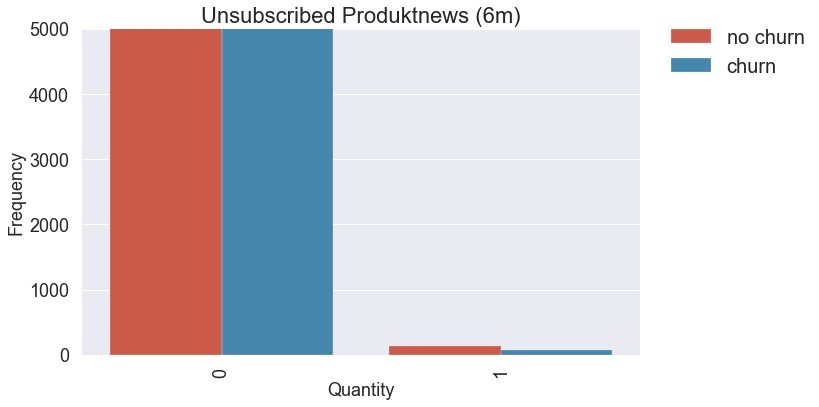

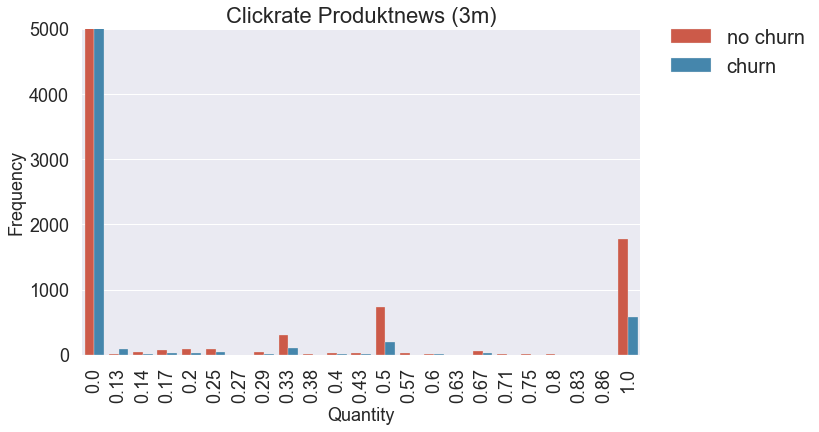

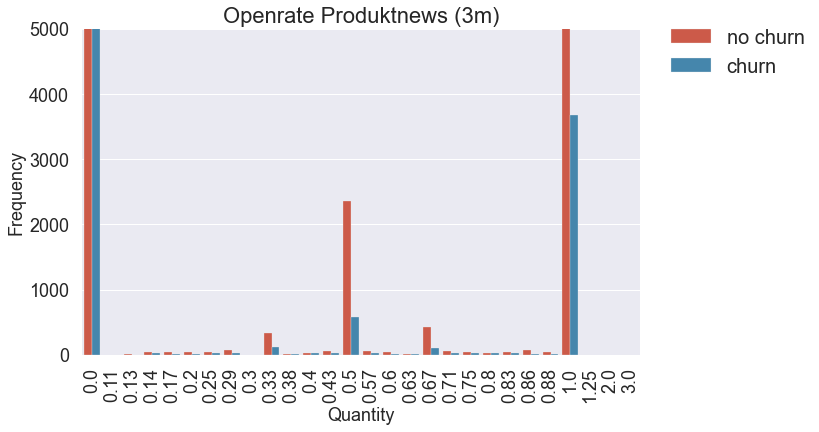

In [154]:
title = ['Received Produktnews (6m)', 'Opened Produktnews (6m)', 'Clicked Produktnews (6m)', 'Unsubscribed Produktnews (6m)', 'Clickrate Produktnews (3m)', 'Openrate Produktnews (3m)']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['received_anzahl_produktnews_6m', 'openedanzahl_produktnews_6m', 'clicked_anzahl_produktnews_6m', 'unsubscribed_anzahl_produktnews_6m', 'clickrate_produktnews_3m', 'openrate_produktnews_3m']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    ax.set(ylim=(0, 5000))
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

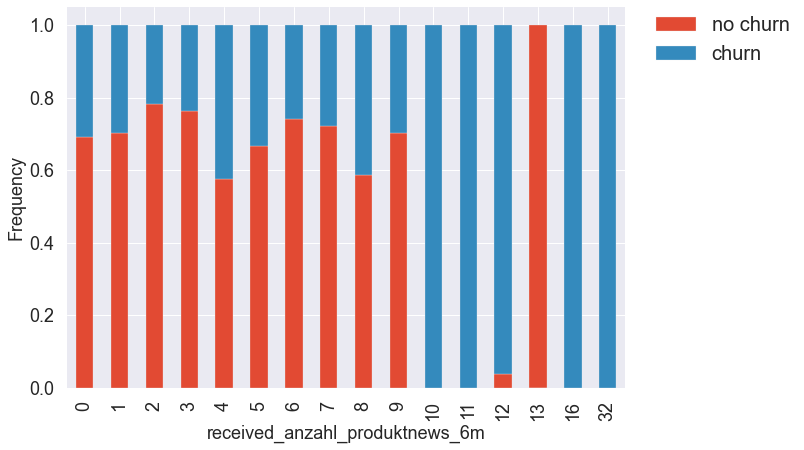

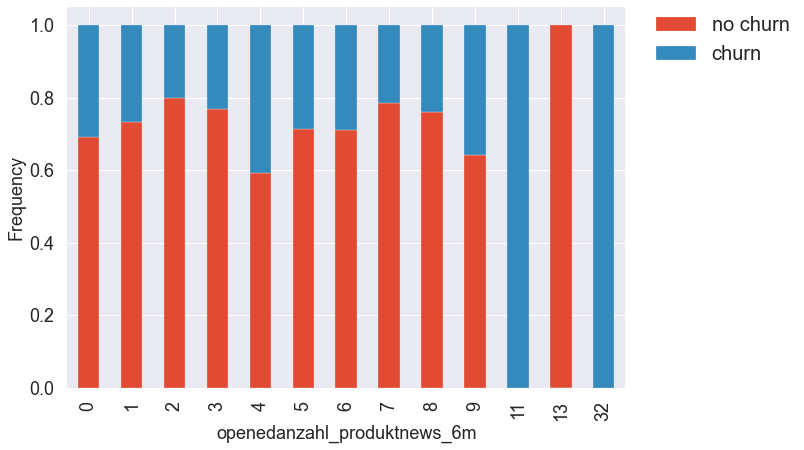

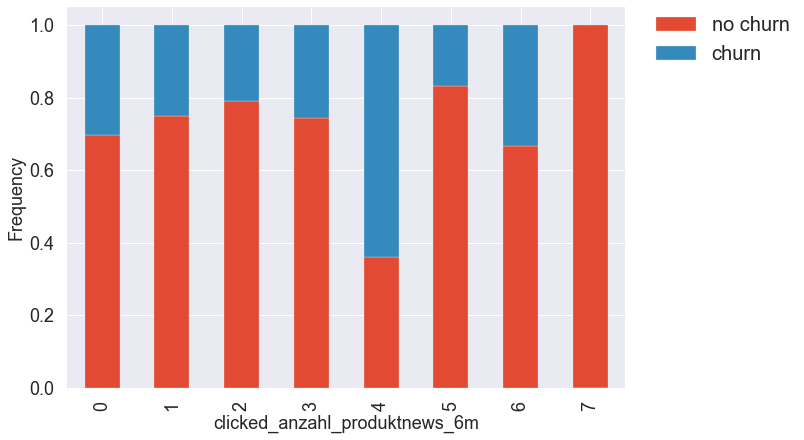

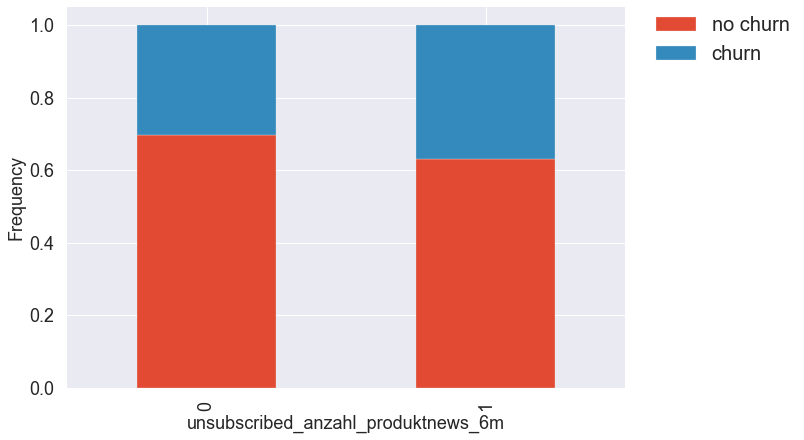

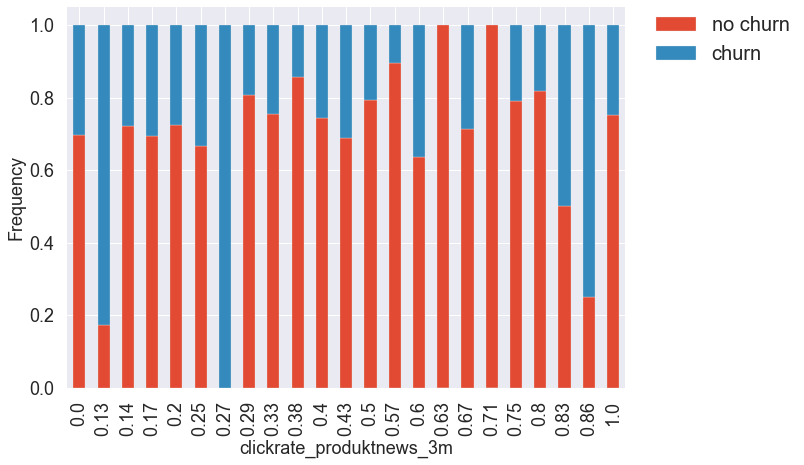

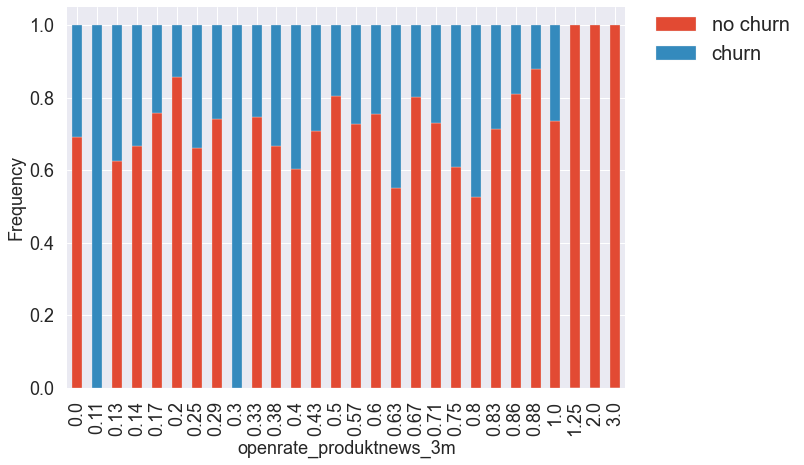

In [155]:
for i in ['received_anzahl_produktnews_6m', 'openedanzahl_produktnews_6m', 'clicked_anzahl_produktnews_6m', 'unsubscribed_anzahl_produktnews_6m', 'clickrate_produktnews_3m', 'openrate_produktnews_3m']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

#### Hamburg
Daily Newsletter (Mo-Fr)
* with received, opened, clicked, unsubscribed mails
* time period = 6m 

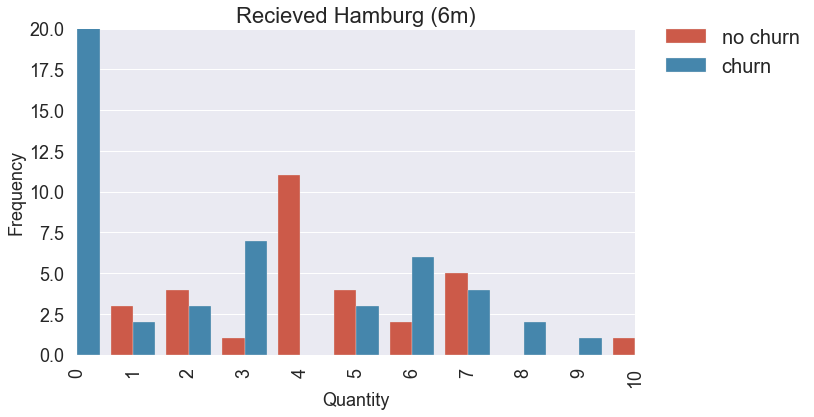

In [156]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='received_anzahl_hamburg_6m', hue='churn', data=df)
ax.set(xlabel='Quantity', ylabel='Frequency')
ax.set(ylim=(0, 20))
ax.set(xlim=(0, 10))
plt.title('Recieved Hamburg (6m)', fontsize=22)
L=plt.legend(fontsize=20,loc=(1.04,0.83))
L.get_texts()[0].set_text(labellist[0])
L.get_texts()[1].set_text(labellist[1])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

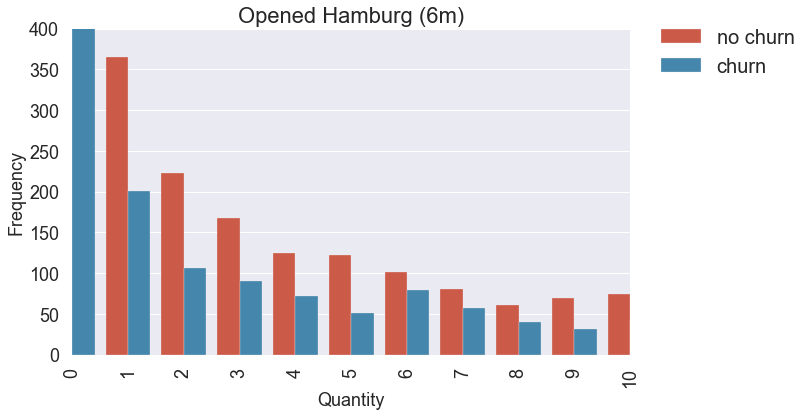

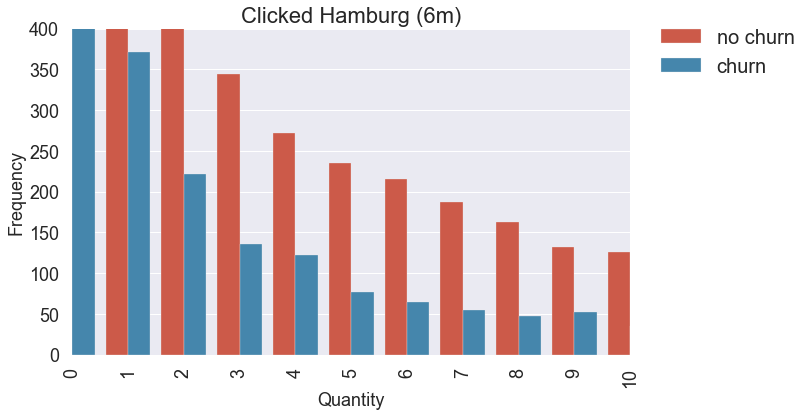

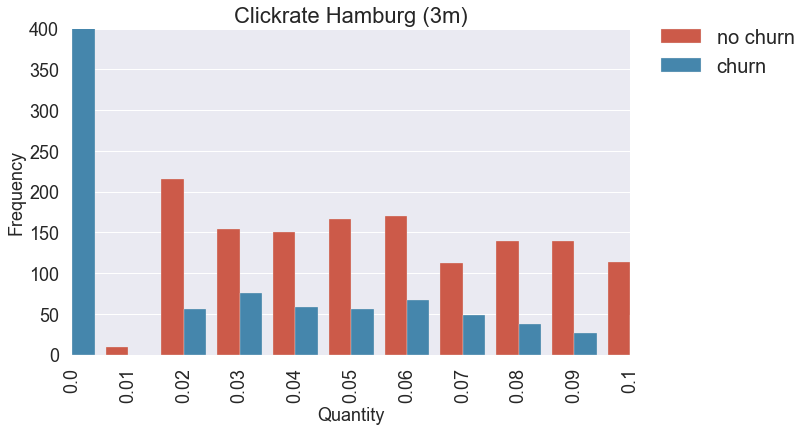

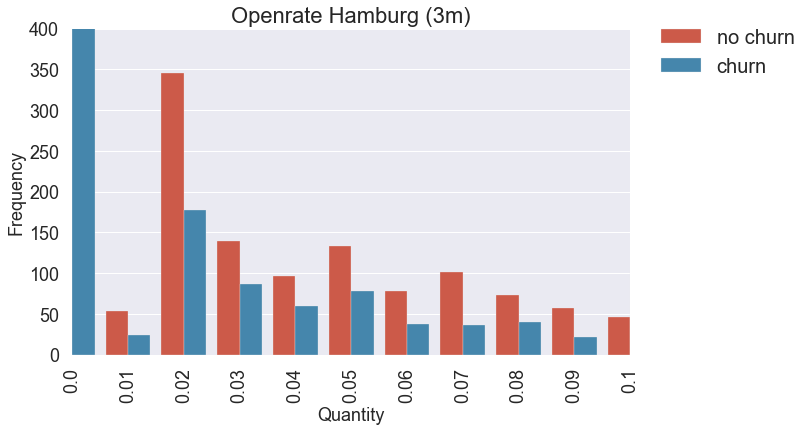

In [157]:
title = ['Opened Hamburg (6m)', 'Clicked Hamburg (6m)', 'Clickrate Hamburg (3m)', 'Openrate Hamburg (3m)']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['openedanzahl_hamburg_6m', 'clicked_anzahl_hamburg_6m', 'clickrate_hamburg_3m', 'openrate_hamburg_3m']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    ax.set(ylim=(0, 400))
    ax.set(xlim=(0, 10))
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

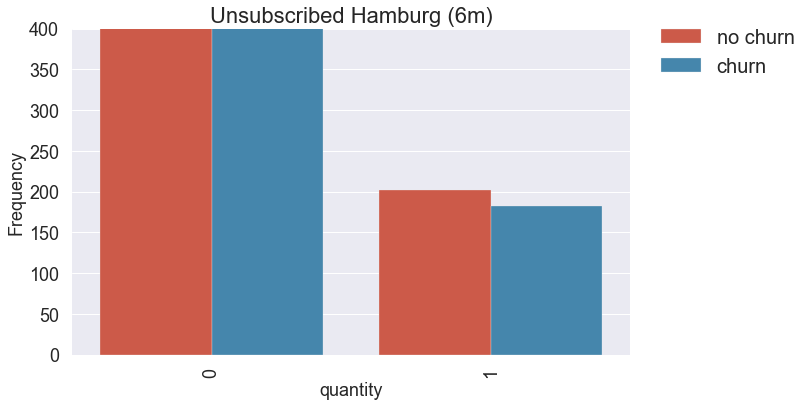

In [158]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='unsubscribed_anzahl_hamburg_6m', hue='churn', data=df)
ax.set(xlabel='quantity', ylabel='Frequency')
ax.set(ylim=(0, 400))
plt.title('Unsubscribed Hamburg (6m)', fontsize=22)
L=plt.legend(fontsize=20,loc=(1.04,0.83))
L.get_texts()[0].set_text(labellist[0])
L.get_texts()[1].set_text(labellist[1])


ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

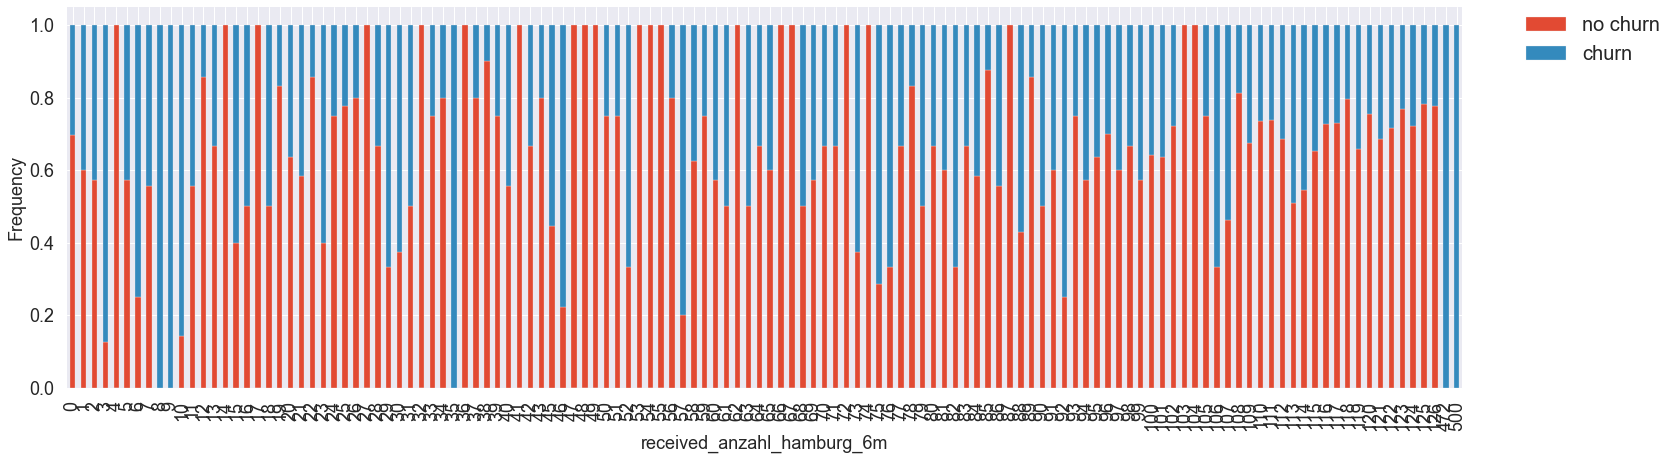

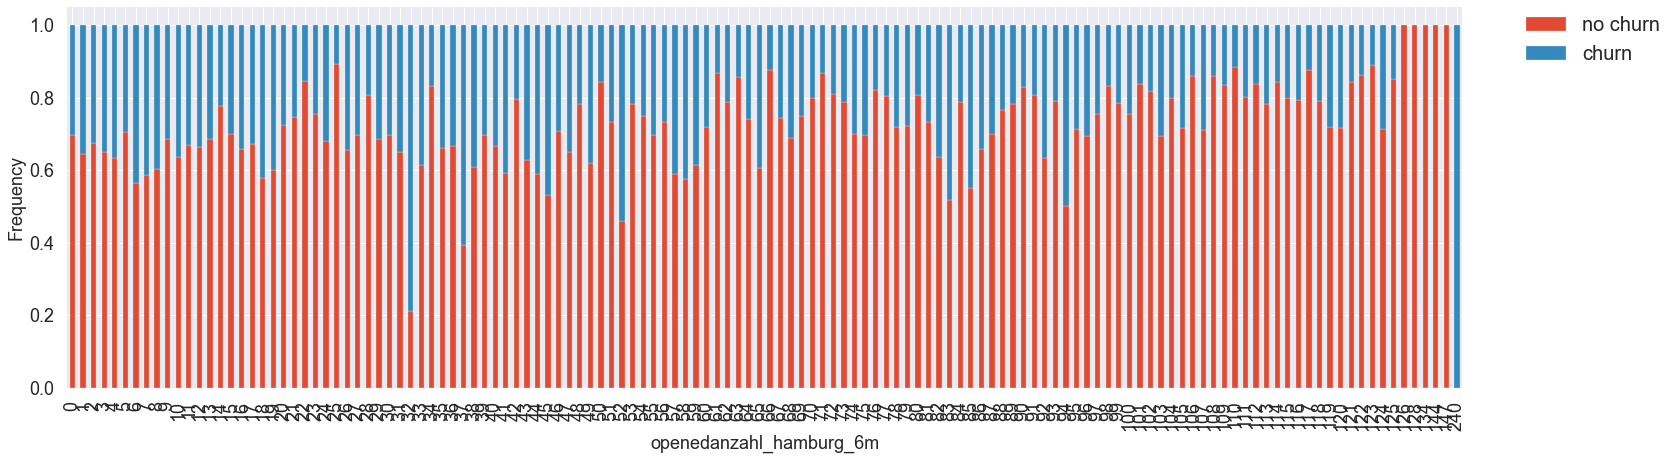

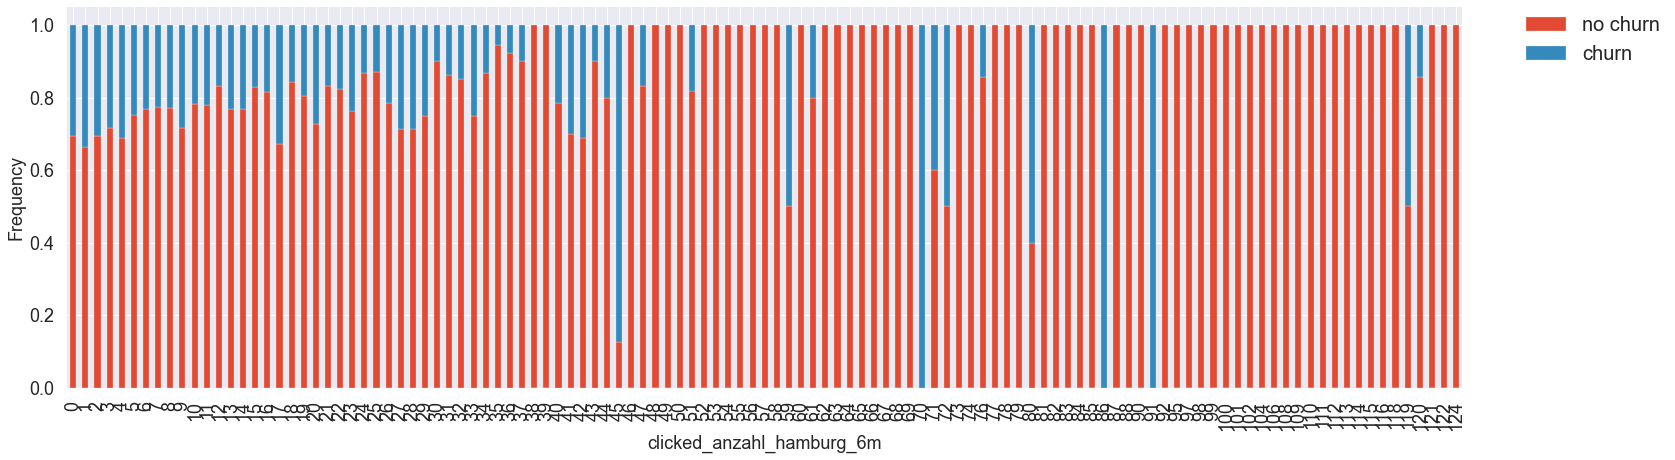

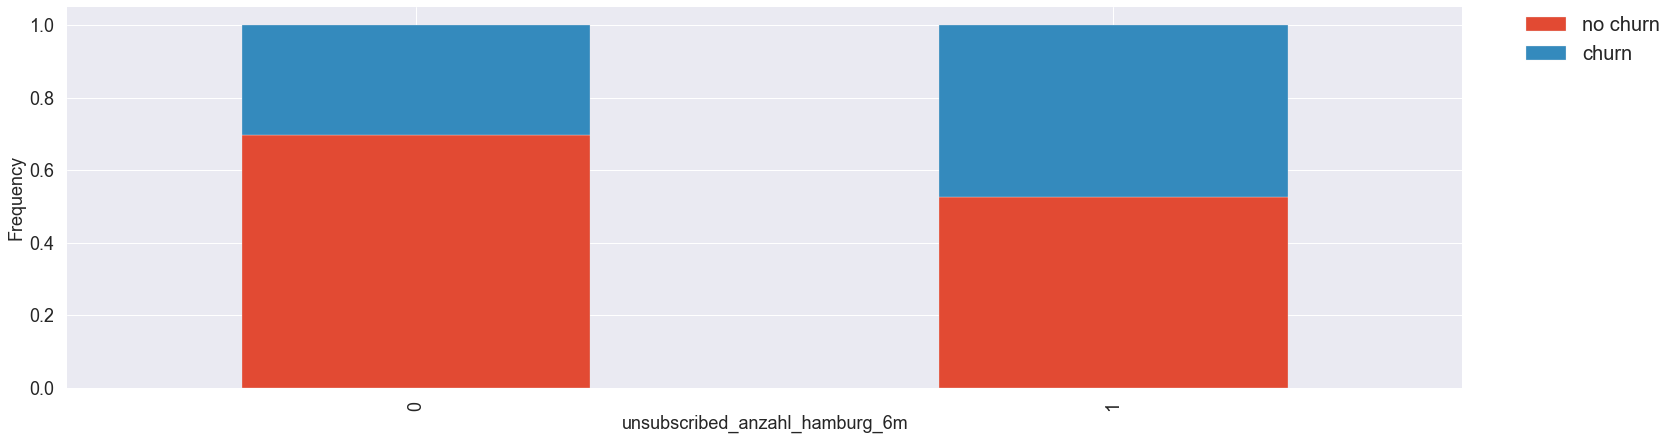

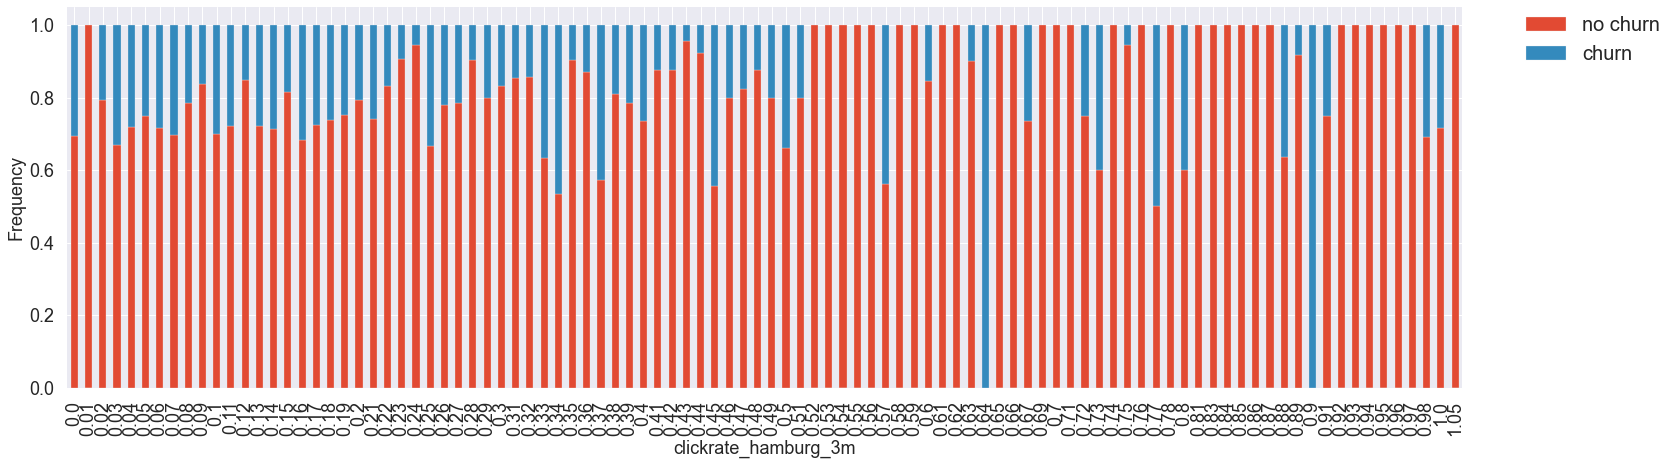

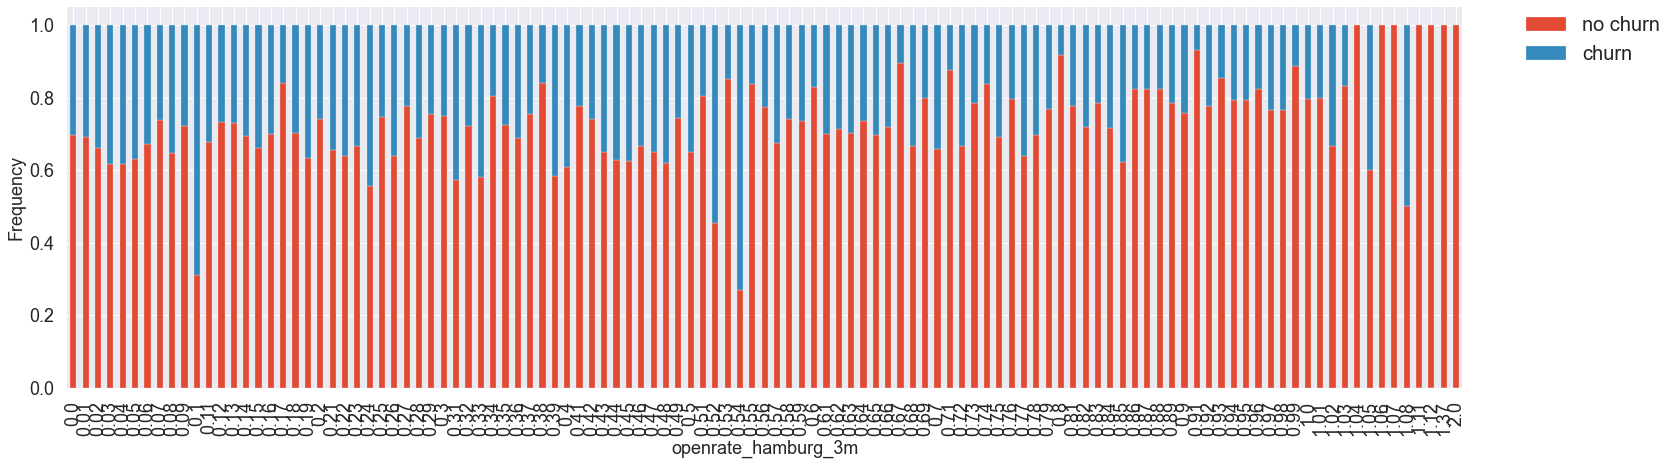

In [159]:
for i in ['received_anzahl_hamburg_6m', 'openedanzahl_hamburg_6m', 'clicked_anzahl_hamburg_6m', 'unsubscribed_anzahl_hamburg_6m', 'clickrate_hamburg_3m', 'openrate_hamburg_3m']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i, figsize_x=25)

#### Zeitbrief
* with received, opened, clicked, unsubscribed mails
* time period = 6m  

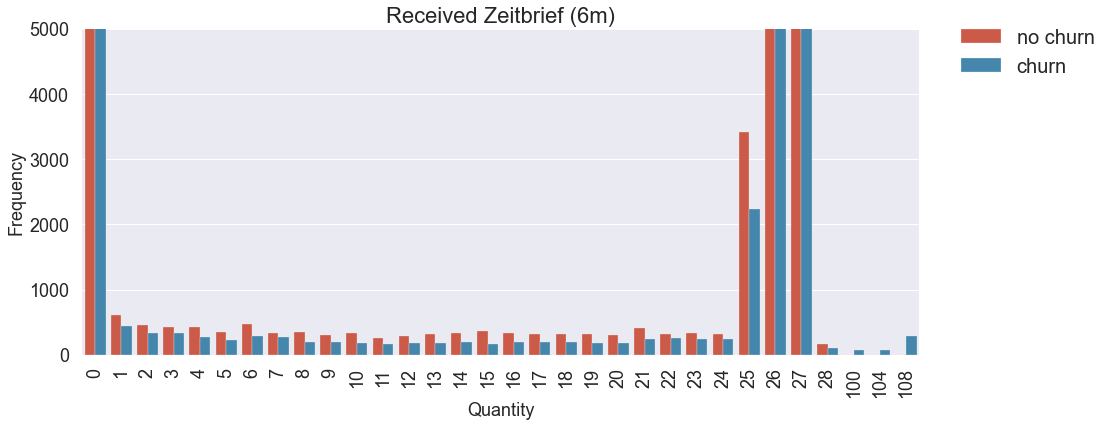

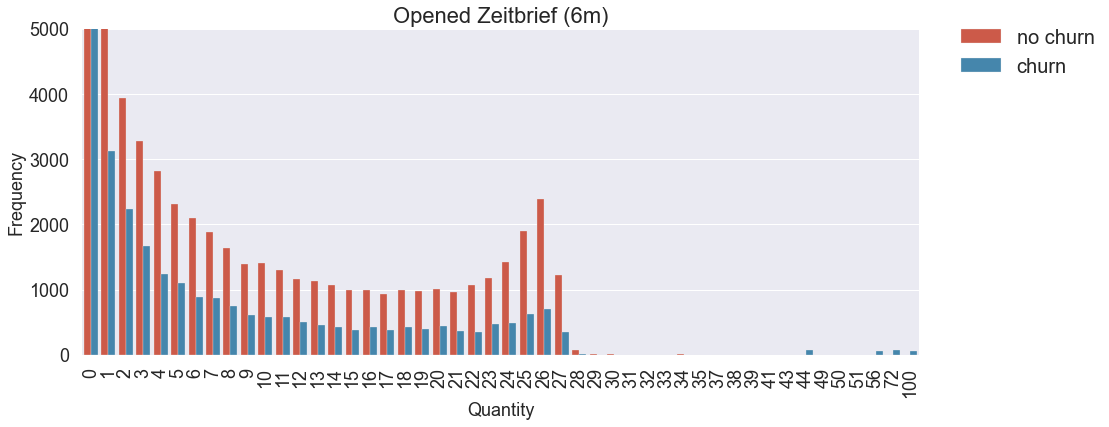

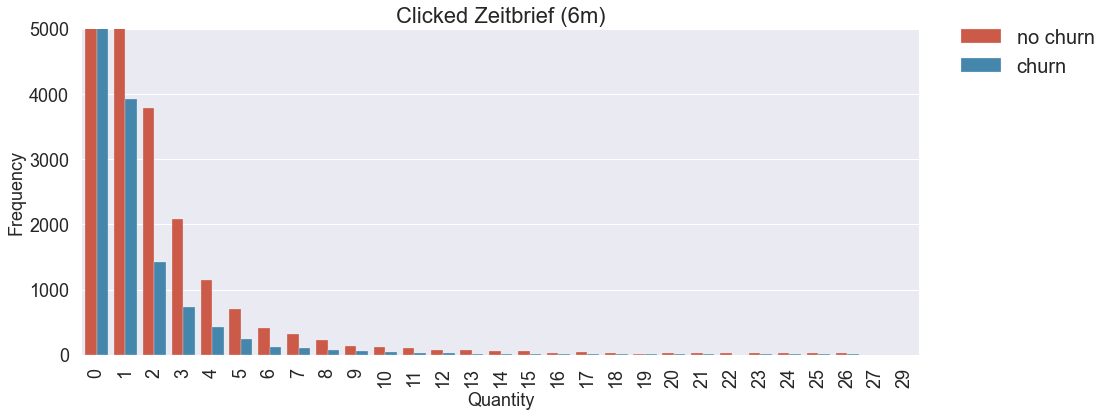

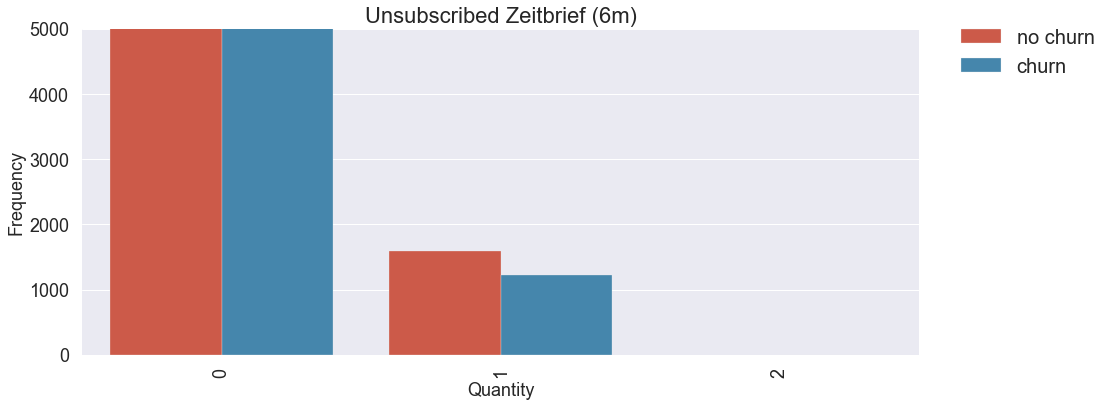

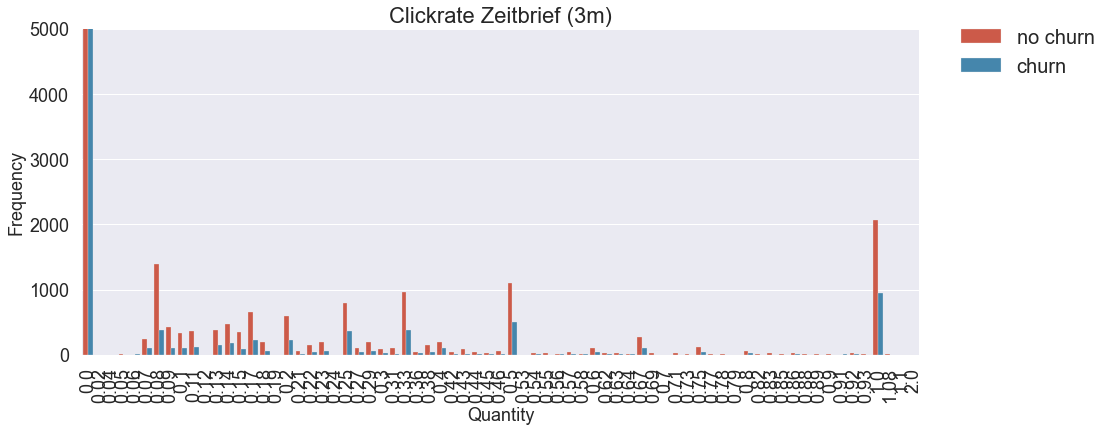

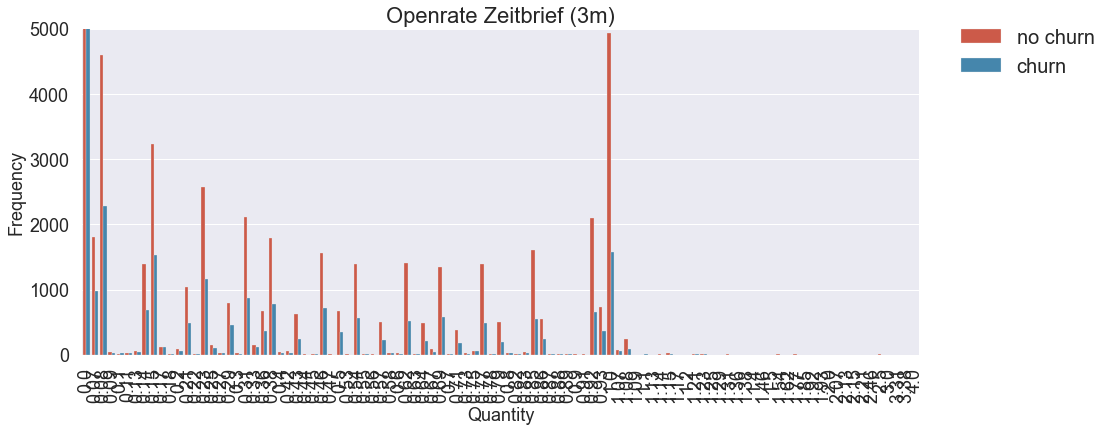

In [160]:
title = ['Received Zeitbrief (6m)', 'Opened Zeitbrief (6m)', 'Clicked Zeitbrief (6m)', 'Unsubscribed Zeitbrief (6m)', 'Clickrate Zeitbrief (3m)', 'Openrate Zeitbrief (3m)']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['received_anzahl_zeitbrief_6m', 'openedanzahl_zeitbrief_6m', 'clicked_anzahl_zeitbrief_6m', 'unsubscribed_anzahl_zeitbrief_6m', 'clickrate_zeitbrief_3m', 'openrate_zeitbrief_3m']):
    
    
    plt.subplots(figsize=(15,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    ax.set(ylim=(0, 5000))
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

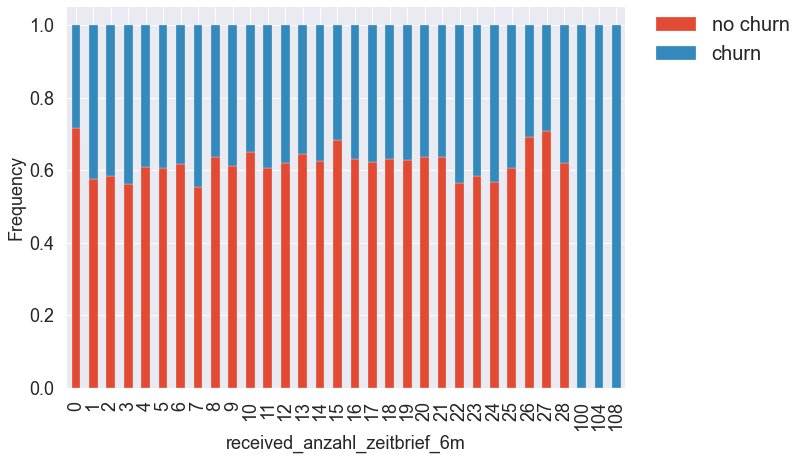

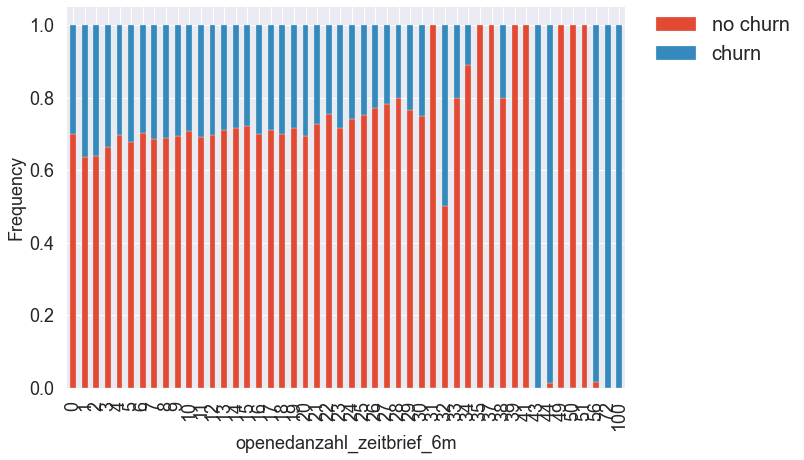

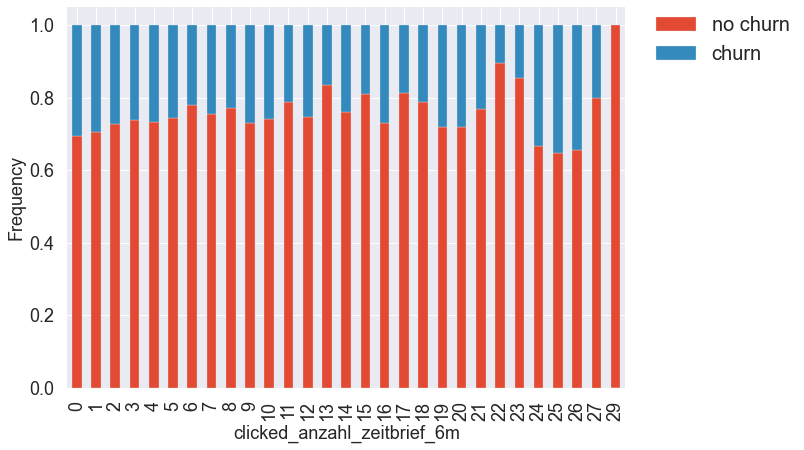

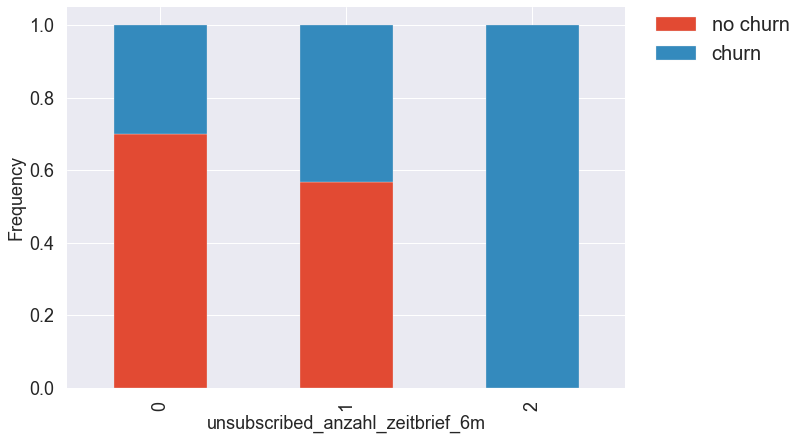

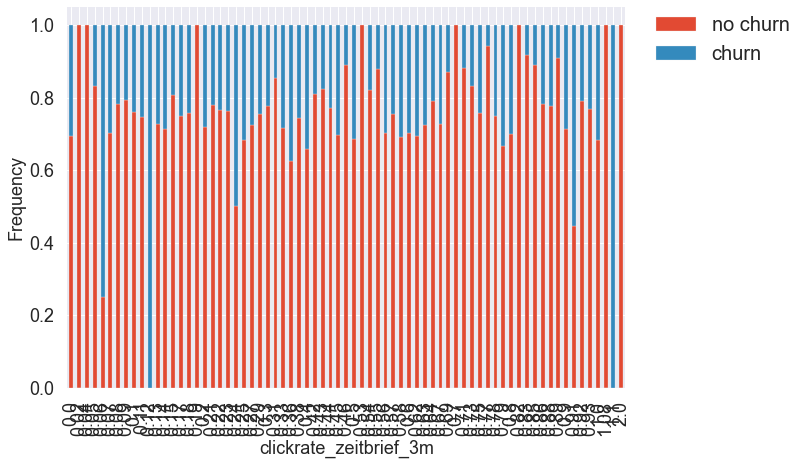

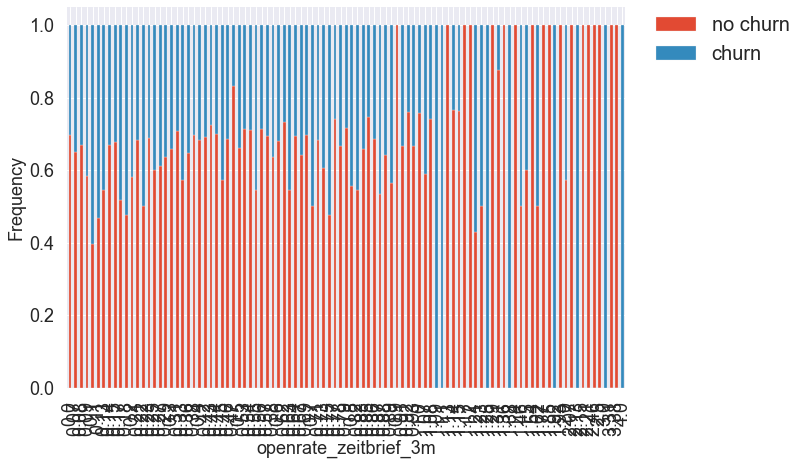

In [161]:
for i in ['received_anzahl_zeitbrief_6m', 'openedanzahl_zeitbrief_6m', 'clicked_anzahl_zeitbrief_6m', 'unsubscribed_anzahl_zeitbrief_6m', 'clickrate_zeitbrief_3m', 'openrate_zeitbrief_3m']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

## Target Variable Analysis

Our target variable is "churn", which is 1 - churn or 0 - no churn. 

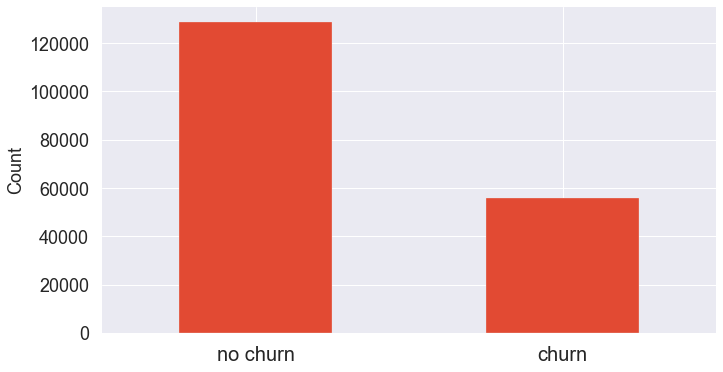

In [162]:
## Show the imbalance of churn target
df.churn.value_counts().plot(kind='bar',figsize=(11,6));
plt.ylabel('Count');
#plt.xlabel('Churn')
plt.xticks(np.arange(2), ('no churn', 'churn'),fontsize=20,rotation=0);

In [163]:
df.churn.value_counts()/df.shape[0]

0    0.696848
1    0.303152
Name: churn, dtype: float64

## Export the dataframe to .csv file

## Conclusion

# Feature Engineering

## zon features

In [164]:
len(df_zon.columns)

14

The 14 features in this list will be transformed. We will use the information only if the registration is completet (value = 2) and than we will aggregate them to get a continues feature "sum_zon" that keeps the information how many users registred for the zones and how many.

In [165]:
def flatten_greater_1(flat):
    if flat > 1:
        return 1
    else:
        return 0

In [166]:
print("Sum zon features")
for i in df_zon:
    df[i] = df[i].apply(flatten_greater_1)
sum_zon = df_zon.sum(axis=1)
print(sum_zon.sample(5))
print("there are a few customers registred or active in more than one")

Sum zon features
55963     0
154990    2
114371    2
32410     1
86931     0
dtype: int64
there are a few customers registred or active in more than one


In [167]:
sum_zon = sum_zon.to_frame(name="sum_zon")
sum_zon.head(1)

sum_zon
0  0

In [168]:
df = df.join(sum_zon)

0    122537
1    42569 
2    18697 
3    598   
4    252   
5    7     
Name: sum_zon, dtype: int64


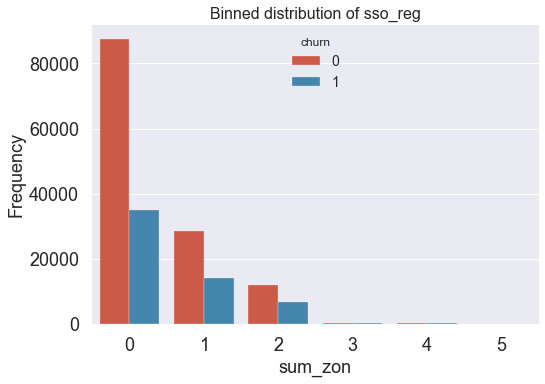

In [169]:
print(df.sum_zon.value_counts())
ax = sns.countplot(x=df.sum_zon, data=df, hue="churn")
ax.set(ylabel="Frequency", xlim=[-0.5, 5.5])
plt.title(f"Binned distribution of {elem}")
plt.show()

## reg features

In [170]:
len(df_reg.columns)

4

In [171]:
eda.meta(df_reg)

varname  boa_reg che_reg sit_reg sso_reg
nulls     0       0       0       0     
percent   0       0       0       0     
dtype     int64   int64   int64   int64 
dup       True    True    True    True  
nuniques  2       2       2       2

The 4 features in this list will be aggregated to a feature "sum_reg" where we will find the sum of how many registred areas the user is registred to.

In [172]:
print("Sum registrated for special areas features")
sum_reg = df_reg.sum(axis=1)
print(sum_reg.sample(10))
print("there are a few customers registred or active in more than one")

Sum registrated for special areas features
101121    3
39466     0
53823     0
88741     1
93886     1
64795     1
174305    1
56149     0
162239    3
12659     0
dtype: int64
there are a few customers registred or active in more than one


In [173]:
sum_reg = sum_reg.to_frame(name="sum_reg")
sum_reg.head(1)

sum_reg
0  1

In [174]:
df = df.join(sum_reg)

1    95768
0    54285
2    25134
3    7655 
4    1818 
Name: sum_reg, dtype: int64


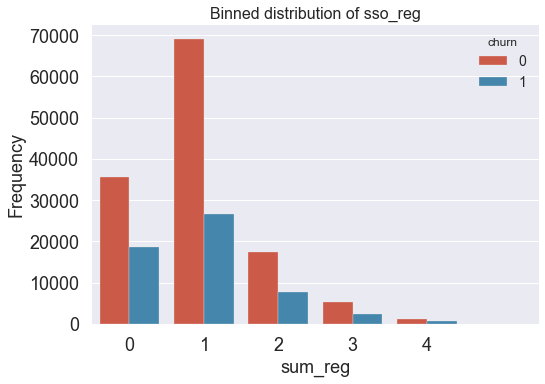

In [175]:
print(df.sum_reg.value_counts())
ax = sns.countplot(x=df.sum_reg, data=df, hue="churn")
ax.set(ylabel="Frequency", xlim=[-0.5, 5.5])
plt.title(f"Binned distribution of {elem}")
plt.show()

## Newsletter Flattening

### Newsletter Email - Carlotta
Subscribers which are subscribed to an Newsletter online will be send emials. The number depends on the frequency of delivery of the newsletter. The Newsletter _Hamburg_ and the Newsletter _Zeitbiref_ are for example daily (Mo-Fr) Newsletter. For the purpose of our analysis it is only important if the subscriber becomes Email-Newsletter or not. <br>
Therefore, the following section is going to flatten thos columns into 1 and 0. 
* df_nl_bestandskunden
* df_nl_produktnews
* df_nl_hamburg
* df_nl_zeitbrief

    - received
    - opened quantity
    - clicked quantity
    - unsubscribed

In [176]:
def flatten_greater_0(flat):
    if flat > 0:
        return 1
    else:
        return 0

In [177]:
df.rename(columns={'openedanzahl_bestandskunden_6m': 'opened_anzahl_bestandskunden_6m',
                   'openedanzahl_produktnews_6m': 'opened_anzahl_produktnews_6m',
                   'openedanzahl_hamburg_6m': 'opened_anzahl_hamburg_6m',
                   'openedanzahl_zeitbrief_6m': 'opened_anzahl_zeitbrief_6m'}, inplace=True)

In [178]:
df_nl_bestandskunden_1 = df.iloc[::, 77:93]  # newsletter existing customers without rates
df_nl_produktnews_1 = df.iloc[::, 99:115]    # productnews (kind of newsletter but more commercial)without rates
df_nl_hamburg_1 = df.iloc[::, 121:137]       # newsletter region hamburg without rates
df_zb_1 = df.iloc[::, 143:159]               # newsletter zeitbrief without rates

In [179]:
for i in df_nl_bestandskunden_1:
    df[i] = df[i].apply(flatten_greater_0)
    
for i in df_nl_produktnews_1:
    df[i] = df[i].apply(flatten_greater_0)

for i in df_nl_hamburg_1:
    df[i] = df[i].apply(flatten_greater_0)
    
for i in df_zb_1:
    df[i] = df[i].apply(flatten_greater_0)

__Typos in the colum names corrected__

Furthermore we can obsereve the same pattern over all the different Newsletter: Only the ones which are not subscribed to an newsletter churn. Therefore the aggregation of the Newsletter is beeing considert. 

In [180]:
name = ['received_anzahl', 'opened_anzahl', 'clicked_anzahl', 'unsubscribed_anzahl']
art = ['bestandskunden','produktnews','hamburg','zeitbrief']
zeitraum = ['1w', '1m', '3m', '6m']
titel = ['nl_received_1w', 'nl_received_1m', 'nl_received_3m', 'nl_received_6m', 'nl_opened_1w', 'nl_opened_1m', 'nl_opened_3m', 
        'nl_opened_6m','nl_clicked_1w', 'nl_clicked_1m', 'nl_clicked_3m', 'nl_clicked_6m', 'nl_unsubscribed_1w', 'nl_unsubscribed_1m', 
        'nl_unsubscribed_3m', 'nl_unsubscribed_6m'] 

In [181]:
links = []
for n in name:
    for z in zeitraum:
        for a in art:
            links.append(n + '_' + a + '_' + z)

In [182]:
for t in titel:
    df[t] = df[links[0]] + df[links[1]] + df[links[2]] + df[links[3]]
    links = links[3:]

__Aggregated Columns:__

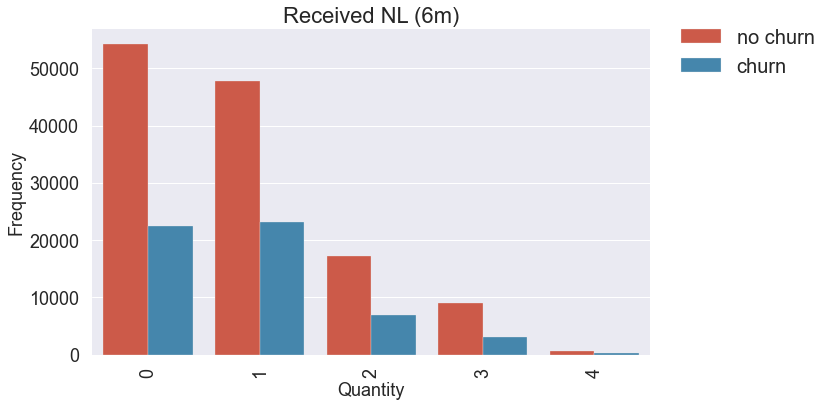

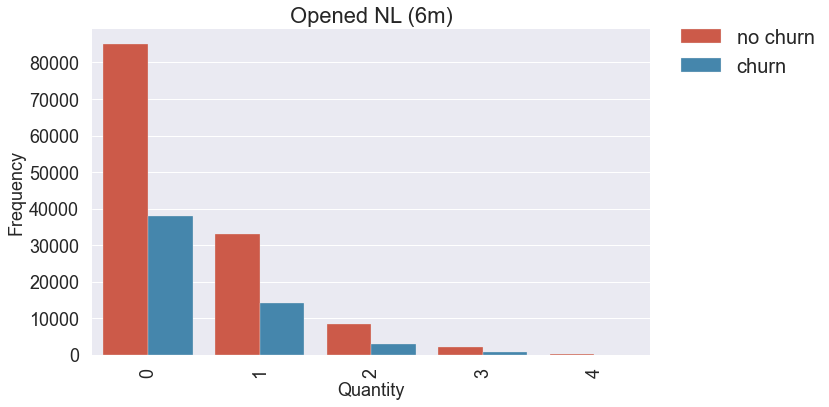

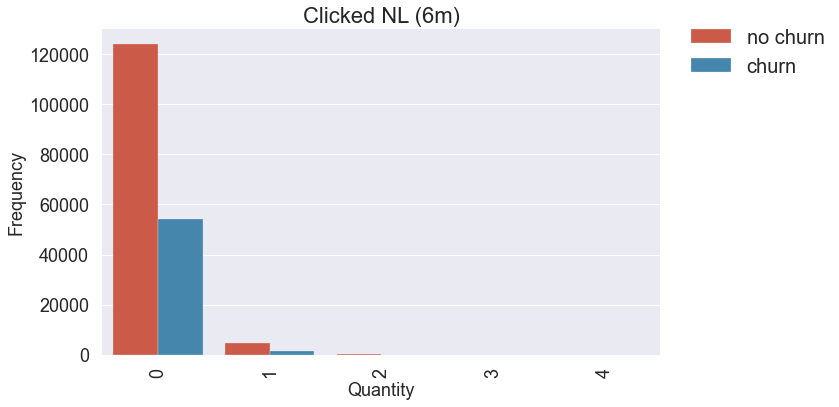

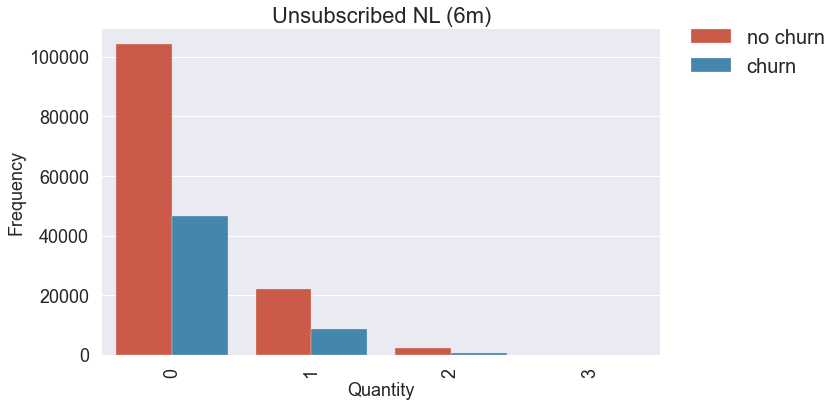

In [183]:
title = ['Received NL (6m)', 'Opened NL (6m)', 'Clicked NL (6m)', 'Unsubscribed NL (6m)']
labellist = ['no churn','churn']
    
for i, nl in enumerate(['nl_received_6m', 'nl_opened_6m', 'nl_clicked_6m', 'nl_unsubscribed_6m']):
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=nl, hue='churn', data=df)
    ax.set(xlabel='Quantity', ylabel='Frequency')
    ax.set(ylim=(0, None))
    plt.title(title[i], fontsize=22)
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Clickrate and Openrate Features

In [184]:
def flatten_rate(flat):
    if 0.75 < flat < 1:
        return 1
    elif 0 < flat < 0.25:
        return 0.25
    elif 0.25 < flat < 0.5:
        return 0.5
    elif 0.5 < flat < 0.75:
        return 0.75
    elif flat > 1:
        return 1.5
    else:
        return 0

In [185]:
for i in ['openrate_1w', 'clickrate_1w', 'openrate_1m', 'clickrate_1m', 'openrate_3m', 'clickrate_3m']:
    df[i] = df[i].apply(flatten_rate)

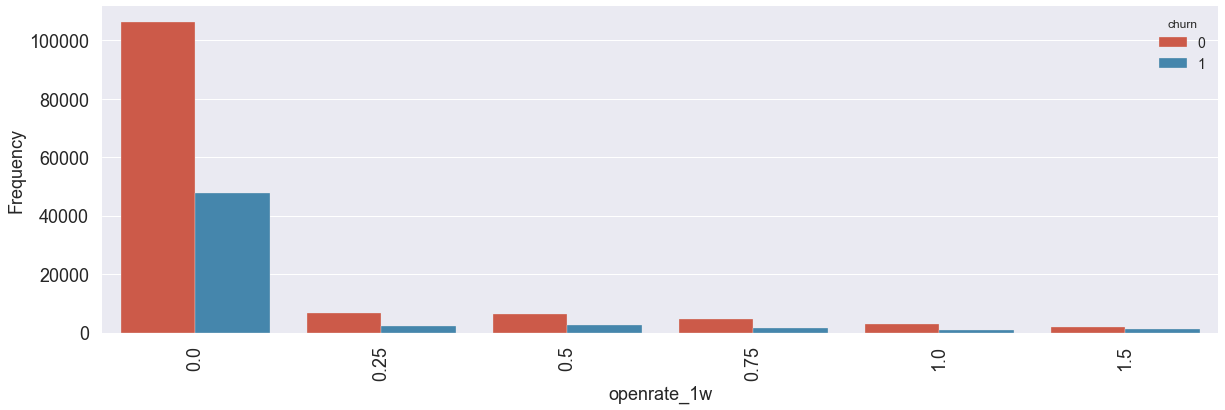

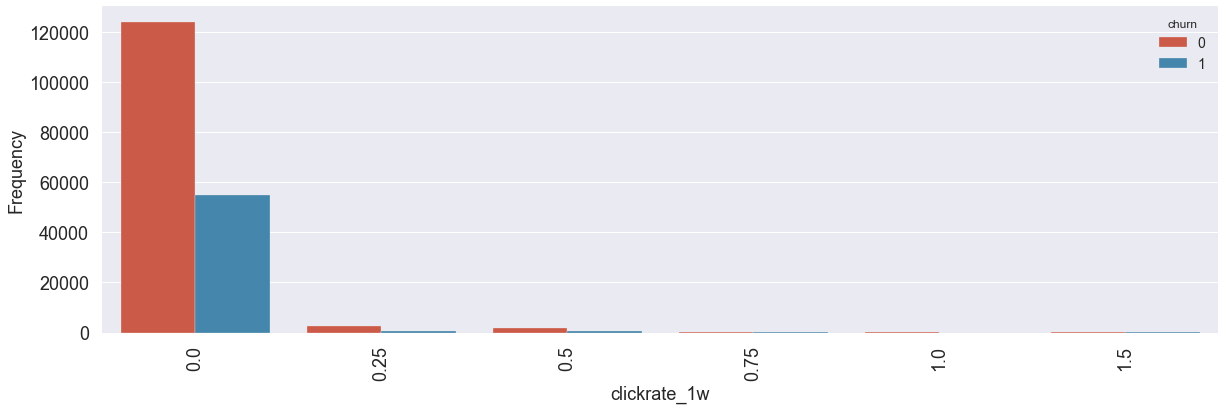

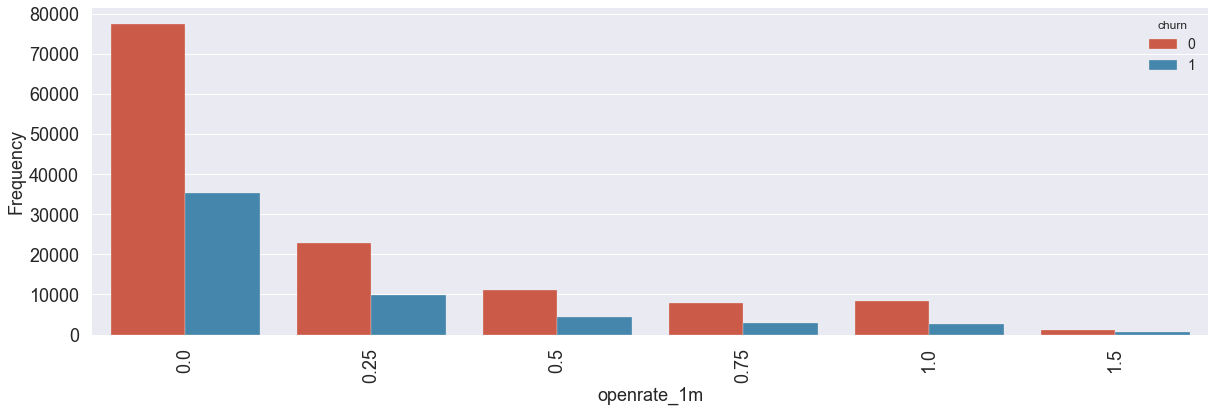

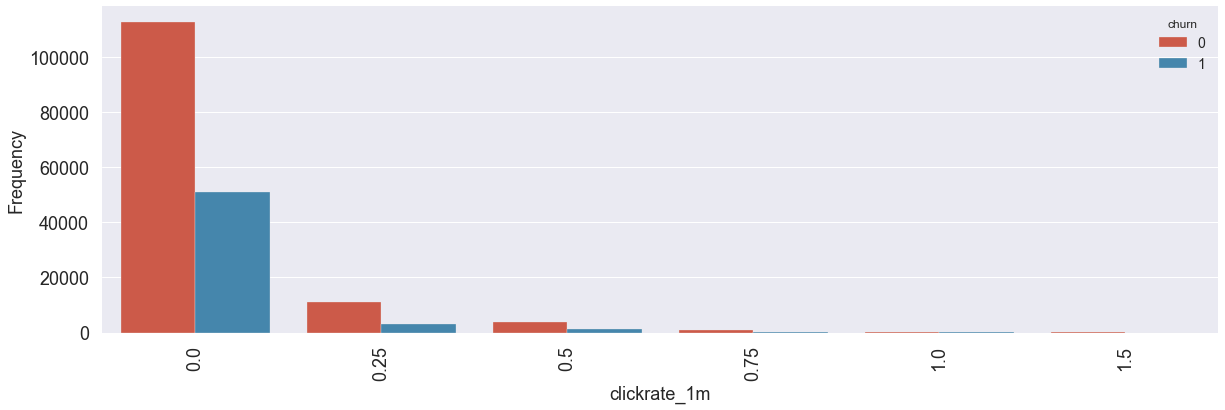

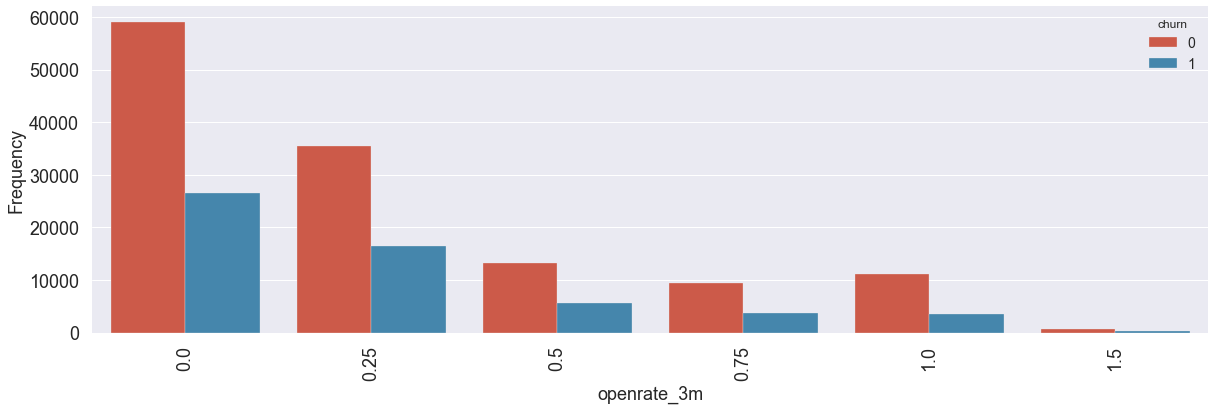

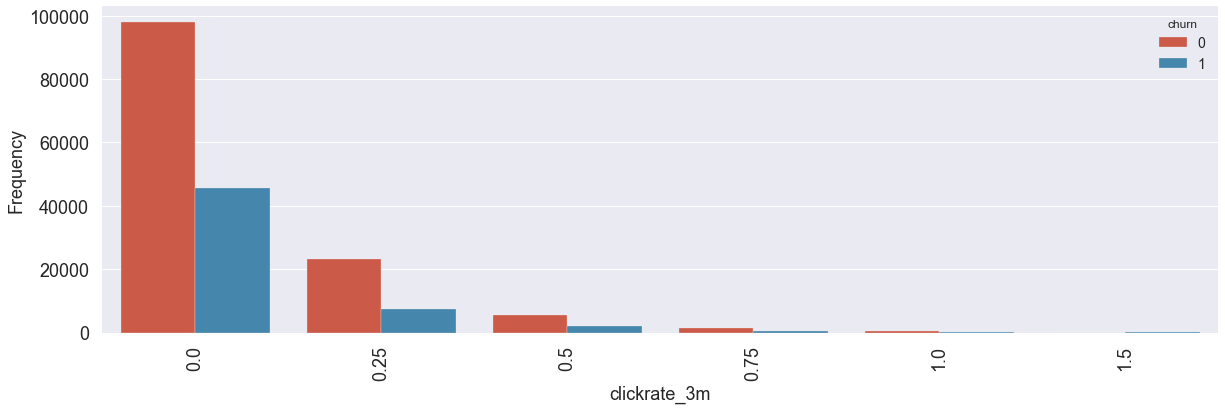

In [186]:
for i in ['openrate_1w', 'clickrate_1w', 'openrate_1m', 'clickrate_1m', 'openrate_3m', 'clickrate_3m']:
    

    plt.subplots(figsize=(20,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

__Observations:__ To have an better overview of the clickrates we binned them into manageables rates (0,0.25,0.5,0.75,1 and 1.5 as a representative of all rates bigger than 1)

### Time Features to Integer Values

In [187]:
df['liefer_beginn_evt'] = df['liefer_beginn_evt'].map(lambda x: x.year + x.month/12.0)
#df['abo_registrierung_min'] = df['abo_registrierung_min'].map(lambda x: 100*x.year + x.month)
#df['nl_registrierung_min'] = df['nl_registrierung_min'].map(lambda x: 100*x.year + x.month)

In [188]:
df['MONTH_DELTA_abo_min'] = (df.abo_registrierung_min - df.abo_registrierung_min.min()).dt.days

In [190]:
df['MONTH_DELTA_abo_min'] = df['MONTH_DELTA_abo_min'].map(lambda x: x/30)

In [191]:
df['MONTH_DELTA_nl_min'] = (df.nl_registrierung_min - df.nl_registrierung_min.min()).dt.days

In [192]:
df['MONTH_DELTA_nl_min'] = df['MONTH_DELTA_nl_min'].map(lambda x: x/30)

## Dropping 

In [193]:
df_drop = df.copy()

In [194]:
#df_drop.head(1)

In [195]:
droppinglist_obvious = ['training_set','avg_churn']

### Dropping NL mails
In the follwoing section we drop the columns of the different newsletter mail activities, because we created some aggregated new columns consisting of those. Therefore these columns are redundant.

In [196]:
droppinglist_tech = ["nl_blacklist_sum", 
                     "nl_bounced_sum", 
                     "nl_sperrliste_sum", 
                     "nl_opt_in_sum", 
                     "nl_fdz_organisch"]

In [197]:
droppinglist_nl_mail = df_nl_bestandskunden_1.columns.values.tolist() + df_nl_produktnews_1.columns.values.tolist() + df_nl_hamburg_1.columns.values.tolist() + df_zb_1.columns.values.tolist()

### Dropping cnt, zon, reg

In [198]:
droppinglist_cnt = list(df_cnt.columns[1:])
droppinglist_zon = list(df_zon.columns)
droppinglist_reg = list(df_reg.columns)

### Dropping Time and Customer/personal features

In [199]:
# time feature dropping 
droppinglist_time = ['date_x','kuendigungs_eingangs_datum','abo_registrierung_min','nl_registrierung_min']

In [200]:
# we want to include only the best geographical information, so we drop plz_1, plz_2 and keep plz_3. ort is therefore also deleted. 
droppinglist_geo = ['plz_1','plz_2','ort'] # maybe keep ort instead of plz due to the higher information for abroad cities. 

### Drop

In [201]:
# function to drop feature lists
def drop_list(df_drop,list_to_drop):
    df_drop = df_drop.drop(list_to_drop, axis=1)
    print(f"Number of features after dropping {df_drop.shape[1]}")
    return df_drop

In [202]:
# drop obvious features
df_drop = drop_list(df_drop, droppinglist_obvious)
# drop nl_mail features
df_drop = drop_list(df_drop, droppinglist_nl_mail)
# drop tech features
df_drop = drop_list(df_drop, droppinglist_tech)
# drop cnt feature
df_drop = drop_list(df_drop, droppinglist_cnt)
# drop zon features
df_drop = drop_list(df_drop, droppinglist_zon)
# drop reg features
df_drop = drop_list(df_drop, droppinglist_reg)
# drop time features
df_drop = drop_list(df_drop, droppinglist_time)
# drop geographical features
df_drop = drop_list(df_drop, droppinglist_geo)

Number of features after dropping 187
Number of features after dropping 123
Number of features after dropping 118
Number of features after dropping 114
Number of features after dropping 100
Number of features after dropping 96
Number of features after dropping 92
Number of features after dropping 89


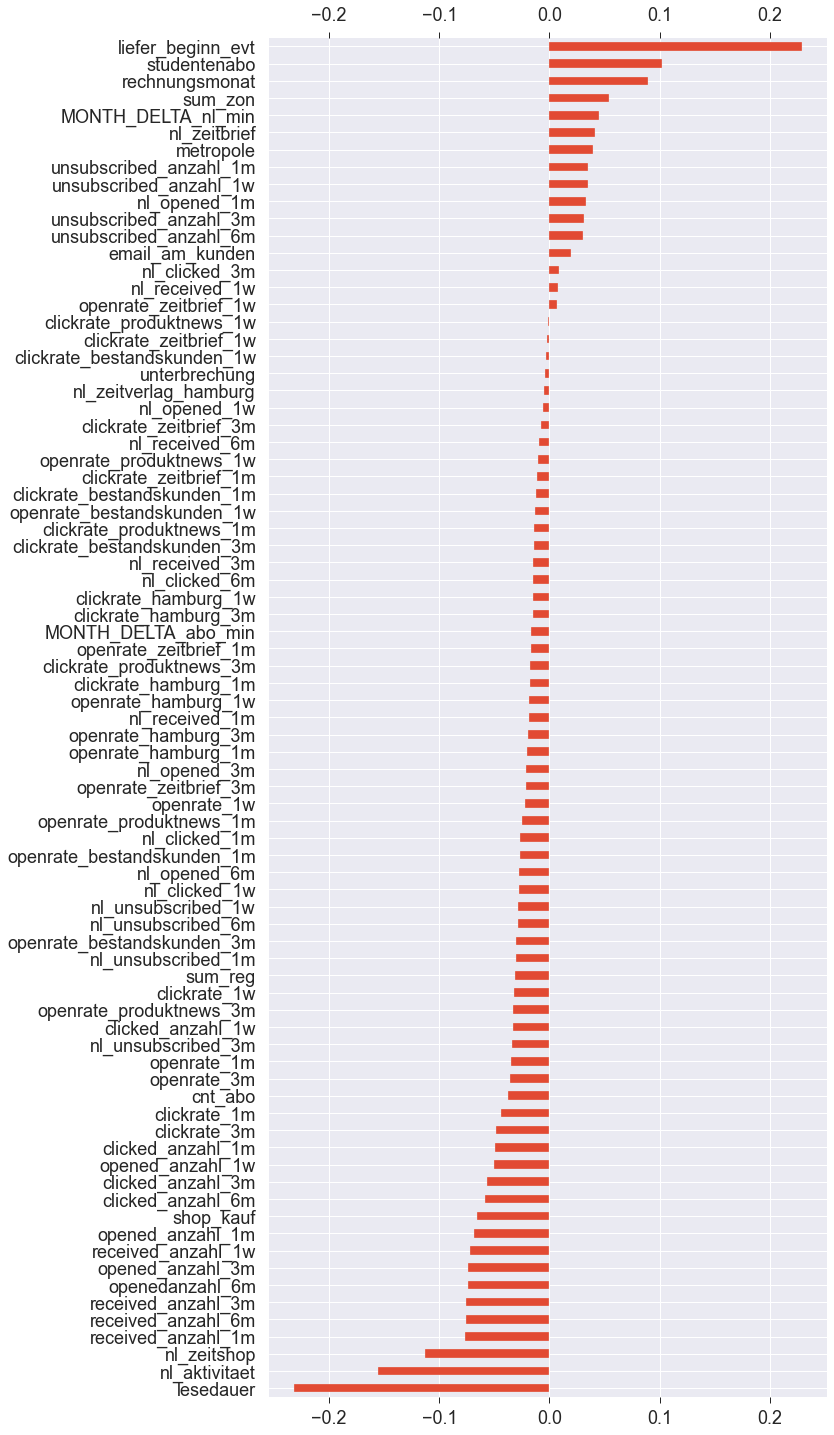

In [203]:
fig = plt.figure()
ax = plt.gca()
df_drop.drop('churn', axis=1).corrwith(df_drop.churn).sort_values().plot(kind='barh',figsize=(10, 25));
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

## Conclusion and Comparison before after dropping and feature engineering

## Export final Dataframe

In [204]:
df_drop.to_csv('data/df_clean_engineered.csv',index=False)

# Predictive Modelling

# Data Visualization

# Future Work